<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from urllib.request import urlretrieve
from io import StringIO

In [2]:
df_str = ',pollutant,mean,std_err,y,seen\n0,CO,0.3519107142857143,0.03356285085678568,95% Interval,0.4\n1,NO2,19.021428571428572,2.2005180115033,95% Interval,16.0\n2,O3,0.04398214285714285,0.0018218630684240416,95% Interval,0.05\n3,SO2,0.20714285714285713,0.03751821714948355,95% Interval,0.15\n'
average_ests = pd.read_csv(StringIO(df_str), index_col=0)
average_ests

,pollutant,mean,std_err,y,seen
0,CO,0.351911,0.033563,95% Interval,0.40
1,NO2,19.021429,2.200518,95% Interval,16.00
2,O3,0.043982,0.001822,95% Interval,0.05
3,SO2,0.207143,0.037518,95% Interval,0.15


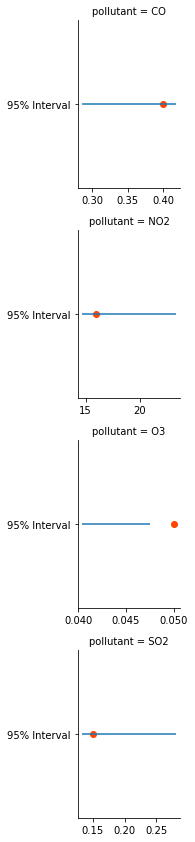

In [3]:
# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row = 'pollutant', sharex= False)

# Plot CI for average estimate
g.map(plt.hlines, 'y', 'lower', 'upper')

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('') 

plt.show()

In [9]:
df_str = ',year,mean,std_err,lower,upper\n0,2013,0.8408196721311475,0.8701349677383201,-0.8646448646359598,2.5462842088982547\n1,2014,-1.3376245847176076,0.7615411467017833,-2.8302452322531026,0.1549960628178877\n2,2015,-0.64932735426009,0.6181746079766589,-1.8609495858943417,0.5622948773741615\n'
diffs_by_year = pd.read_csv(StringIO(df_str), index_col=0)
diffs_by_year

,year,mean,std_err,lower,upper
0,2013,0.840820,0.870135,-0.864645,2.546284
1,2014,-1.337625,0.761541,-2.830245,0.154996
2,2015,-0.649327,0.618175,-1.860950,0.562295


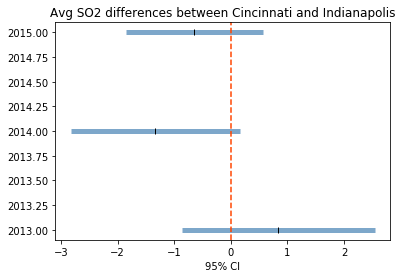

In [7]:
# Set start and ends according to intervals 
# Make intervals thicker
plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
           linewidth = 5, color = 'steelblue', alpha = 0.7,
           data = diffs_by_year)
# Point estimates
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()

In [10]:
file = 'pollution_wide.csv'
url = 'https://assets.datacamp.com/production/repositories/3841/datasets/a6b11493e11dd47f3e03e0b96e2a2dbc51f03cb2/'
urlretrieve(url+file, file)
pollution = pd.read_csv(file)
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 8 columns):
city     8888 non-null object
year     8888 non-null int64
month    8888 non-null int64
day      8888 non-null int64
CO       8888 non-null float64
NO2      8888 non-null float64
O3       8888 non-null float64
SO2      8888 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 555.6+ KB


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


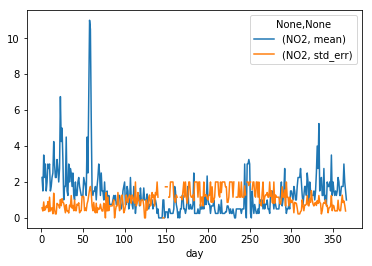

In [51]:
def std_err(df):
    return df.std()/df.mean()

van_no2 = pollution.query('city == "Vandenberg Air Force Base"')[['day', 'NO2']]
vandenberg_NO2 = van_no2.groupby('day').agg(['mean', std_err])
vandenberg_NO2.plot()

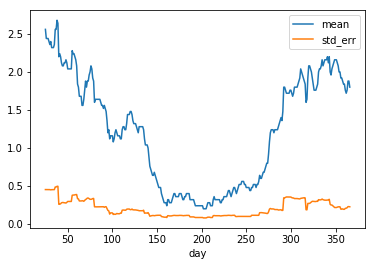

In [53]:
# looks nothing like the data in the pollution set. Just used to_csv()
df_str = ',day,mean,std_err\n0,25,2.56,0.45283109433871693\n1,26,2.44,0.45283109433871693\n2,27,2.44,0.45283109433871693\n3,28,2.44,0.45283109433871693\n4,29,2.4,0.4525483399593904\n5,30,2.36,0.4521238768302333\n6,31,2.4,0.448998886412873\n7,32,2.32,0.45155730533344274\n8,33,2.32,0.45155730533344274\n9,34,2.32,0.45155730533344274\n10,35,2.36,0.4521238768302333\n11,36,2.56,0.486883969750494\n12,37,2.56,0.48688396975049403\n13,38,2.68,0.4954836021504647\n14,39,2.64,0.496\n15,40,2.2,0.2592296279363144\n16,41,2.24,0.2609521028848015\n17,42,2.2,0.265329983228432\n18,43,2.12,0.2789695323866031\n19,44,2.08,0.2823898015155647\n20,45,2.08,0.28238980151556464\n21,46,2.12,0.2789695323866031\n22,47,2.12,0.27896953238660316\n23,48,2.16,0.2752744085453641\n24,49,2.12,0.2846471499945151\n25,50,2.04,0.2965400478856102\n26,51,2.04,0.2965400478856103\n27,52,2.04,0.2965400478856103\n28,53,2.04,0.2965400478856102\n29,54,2.04,0.2965400478856103\n30,55,2.28,0.37744403558673445\n31,56,2.24,0.38065207210785024\n32,57,2.24,0.38065207210785024\n33,58,2.2,0.3836665218650176\n34,59,2.16,0.38649191453379717\n35,60,2.08,0.3874841932259947\n36,61,1.84,0.3331306050185122\n37,62,1.8,0.3298484500494129\n38,63,1.68,0.3031567251439427\n39,64,1.68,0.30315672514394276\n40,65,1.68,0.30315672514394276\n41,66,1.56,0.3050508154390018\n42,67,1.56,0.30505081543900187\n43,68,1.64,0.29869047524151154\n44,69,1.76,0.3112812233334995\n45,70,1.88,0.3215960198758685\n46,71,1.8,0.3298484500494129\n47,72,1.88,0.34091641204260026\n48,73,1.88,0.34091641204260026\n49,74,1.96,0.3321686318724271\n50,75,2.0,0.32496153618543844\n51,76,2.08,0.3245674044016127\n52,77,2.04,0.3273163607276605\n53,78,1.92,0.33428131865241884\n54,79,1.88,0.3361904222312111\n55,80,1.6,0.22627416997969524\n56,81,1.64,0.22542404485768594\n57,82,1.64,0.22542404485768594\n58,83,1.64,0.22542404485768594\n59,84,1.64,0.22542404485768594\n60,85,1.64,0.22542404485768594\n61,86,1.64,0.22542404485768594\n62,87,1.6,0.2262741699796952\n63,88,1.56,0.22683915006012523\n64,89,1.56,0.22683915006012517\n65,90,1.52,0.22712111306525426\n66,91,1.56,0.2196724834839357\n67,92,1.52,0.22712111306525426\n68,93,1.48,0.22712111306525426\n69,94,1.36,0.20301724064719232\n70,95,1.2,0.1788854381999832\n71,96,1.24,0.17232527382830412\n72,97,1.12,0.13047605144240074\n73,98,1.16,0.14620533505997652\n74,99,1.16,0.14620533505997652\n75,100,1.16,0.14620533505997652\n76,101,1.08,0.12547509713086497\n77,102,1.12,0.13047605144240074\n78,103,1.2,0.12649110640673517\n79,104,1.24,0.12998461447417536\n80,105,1.2,0.1385640646055102\n81,106,1.16,0.13481839637082174\n82,107,1.16,0.13481839637082174\n83,108,1.16,0.13481839637082174\n84,109,1.12,0.14221111067704945\n85,110,1.12,0.14221111067704945\n86,111,1.24,0.18137254478007414\n87,112,1.28,0.18347751905887544\n88,113,1.28,0.1834775190588754\n89,114,1.24,0.18137254478007417\n90,115,1.24,0.18137254478007417\n91,116,1.32,0.19365949499056326\n92,117,1.44,0.19661129163911212\n93,118,1.44,0.19661129163911212\n94,119,1.44,0.19661129163911212\n95,120,1.48,0.18863721796082553\n96,121,1.48,0.18863721796082553\n97,122,1.44,0.19661129163911212\n98,123,1.36,0.1865904606350496\n99,124,1.32,0.1852133904446436\n100,125,1.32,0.1852133904446436\n101,126,1.32,0.1852133904446436\n102,127,1.28,0.1834775190588754\n103,128,1.24,0.18137254478007414\n104,129,1.2,0.17888543819998318\n105,130,1.28,0.17453939383417144\n106,131,1.28,0.1745393938341714\n107,132,1.28,0.17453939383417144\n108,133,1.28,0.1745393938341714\n109,134,1.28,0.1745393938341714\n110,135,1.24,0.18137254478007414\n111,136,1.12,0.14221111067704945\n112,137,1.04,0.144\n113,138,1.04,0.14400000000000002\n114,139,1.04,0.144\n115,140,1.0,0.14966629547095767\n116,141,0.88,0.13047605144240074\n117,142,0.76,0.10244998779892558\n118,143,0.72,0.1061319932913728\n119,144,0.68,0.10910545357588683\n120,145,0.64,0.11142710621747295\n121,146,0.64,0.11142710621747295\n122,147,0.68,0.10910545357588686\n123,148,0.64,0.11142710621747295\n124,149,0.6,0.1131370849898476\n125,150,0.56,0.1142628548566856\n126,151,0.52,0.1148216007552586\n127,152,0.48,0.11482160075525857\n128,153,0.48,0.1148216007552586\n129,154,0.48,0.1148216007552586\n130,155,0.4,0.09797958971132713\n131,156,0.36,0.096\n132,157,0.32,0.09329523031752482\n133,158,0.28,0.0897997772825746\n134,159,0.28,0.0897997772825746\n135,160,0.28,0.08979977728257459\n136,161,0.24,0.0854166260162505\n137,162,0.32,0.10910545357588683\n138,163,0.32,0.10910545357588683\n139,164,0.28,0.1061319932913728\n140,165,0.28,0.1061319932913728\n141,166,0.28,0.1061319932913728\n142,167,0.32,0.10910545357588683\n143,168,0.36,0.11142710621747295\n144,169,0.4,0.1131370849898476\n145,170,0.4,0.1131370849898476\n146,171,0.36,0.11142710621747295\n147,172,0.36,0.11142710621747295\n148,173,0.36,0.11142710621747295\n149,174,0.36,0.11142710621747295\n150,175,0.4,0.1131370849898476\n151,176,0.4,0.1131370849898476\n152,177,0.4,0.1131370849898476\n153,178,0.36,0.11142710621747295\n154,179,0.32,0.10910545357588683\n155,180,0.32,0.10910545357588683\n156,181,0.36,0.11142710621747295\n157,182,0.36,0.11142710621747295\n158,183,0.4,0.11313708498984762\n159,184,0.4,0.1131370849898476\n160,185,0.4,0.11313708498984762\n161,186,0.4,0.1131370849898476\n162,187,0.32,0.09329523031752482\n163,188,0.32,0.0932952303175248\n164,189,0.32,0.09329523031752482\n165,190,0.32,0.09329523031752482\n166,191,0.32,0.09329523031752482\n167,192,0.28,0.0897997772825746\n168,193,0.24,0.08541662601625048\n169,194,0.24,0.0854166260162505\n170,195,0.24,0.08541662601625048\n171,196,0.24,0.08541662601625048\n172,197,0.24,0.08541662601625048\n173,198,0.24,0.0854166260162505\n174,201,0.24,0.08541662601625048\n175,202,0.2,0.08\n176,203,0.2,0.08\n177,204,0.2,0.08\n178,205,0.2,0.08\n179,206,0.24,0.0854166260162505\n180,207,0.28,0.08979977728257459\n181,208,0.28,0.08979977728257459\n182,209,0.28,0.0897997772825746\n183,210,0.24,0.08541662601625048\n184,211,0.24,0.08541662601625048\n185,212,0.24,0.08541662601625048\n186,213,0.32,0.10910545357588683\n187,214,0.36,0.11142710621747295\n188,215,0.32,0.10910545357588683\n189,216,0.32,0.10910545357588683\n190,217,0.32,0.10910545357588683\n191,218,0.32,0.10910545357588686\n192,219,0.32,0.10910545357588683\n193,220,0.32,0.10910545357588683\n194,221,0.28,0.1061319932913728\n195,222,0.28,0.1061319932913728\n196,223,0.32,0.10910545357588683\n197,224,0.32,0.10910545357588683\n198,225,0.36,0.11142710621747295\n199,226,0.36,0.11142710621747295\n200,227,0.36,0.11142710621747295\n201,228,0.36,0.11142710621747295\n202,229,0.4,0.1131370849898476\n203,230,0.44,0.11426285485668561\n204,231,0.44,0.11426285485668561\n205,232,0.4,0.1131370849898476\n206,233,0.36,0.11142710621747295\n207,234,0.4,0.1131370849898476\n208,235,0.44,0.11426285485668561\n209,236,0.48,0.1148216007552586\n210,237,0.48,0.11482160075525857\n211,238,0.44,0.09927738916792686\n212,239,0.4,0.09797958971132711\n213,240,0.44,0.09927738916792686\n214,241,0.48,0.09991996797437439\n215,242,0.52,0.09991996797437439\n216,243,0.52,0.09991996797437439\n217,244,0.52,0.09991996797437439\n218,245,0.56,0.09927738916792685\n219,246,0.56,0.09927738916792685\n220,247,0.56,0.09927738916792685\n221,248,0.52,0.09991996797437439\n222,249,0.52,0.09991996797437439\n223,250,0.48,0.09991996797437439\n224,251,0.48,0.09991996797437439\n225,252,0.48,0.09991996797437439\n226,253,0.48,0.09991996797437439\n227,254,0.44,0.09927738916792686\n228,255,0.44,0.09927738916792686\n229,256,0.48,0.1148216007552586\n230,257,0.48,0.11482160075525857\n231,258,0.52,0.1148216007552586\n232,259,0.52,0.11482160075525857\n233,260,0.52,0.11482160075525857\n234,261,0.48,0.11482160075525857\n235,262,0.52,0.1148216007552586\n236,263,0.52,0.11482160075525857\n237,264,0.56,0.11426285485668561\n238,265,0.64,0.14837789592793127\n239,266,0.6,0.14966629547095767\n240,267,0.6,0.14966629547095767\n241,268,0.64,0.14837789592793124\n242,269,0.68,0.14664242223858687\n243,270,0.68,0.14664242223858687\n244,271,0.72,0.14444376068214232\n245,272,0.76,0.14176036117335483\n246,273,0.8,0.13856406460551018\n247,274,0.8,0.13856406460551018\n248,275,0.92,0.1591979899370592\n249,276,1.08,0.19530488985173924\n250,277,1.2,0.20396078054371142\n251,278,1.24,0.1982321870938219\n252,279,1.24,0.19823218709382187\n253,280,1.24,0.1982321870938219\n254,281,1.2,0.19595917942265423\n255,282,1.24,0.1899894733926067\n256,283,1.24,0.1899894733926067\n257,284,1.24,0.1899894733926067\n258,285,1.24,0.1899894733926067\n259,286,1.28,0.1834775190588754\n260,287,1.32,0.1852133904446436\n261,288,1.36,0.1865904606350496\n262,289,1.4,0.1876166303929372\n263,290,1.36,0.17780888616714297\n264,291,1.48,0.1799555500672319\n265,292,1.8,0.34409301068170506\n266,293,1.8,0.3440930106817051\n267,294,1.76,0.34999428566763774\n268,295,1.72,0.35561777233428593\n269,296,1.72,0.3556177723342859\n270,297,1.72,0.35561777233428593\n271,298,1.72,0.3556177723342859\n272,299,1.76,0.3545363168985654\n273,300,1.76,0.3545363168985654\n274,301,1.72,0.3465025252433235\n275,302,1.68,0.34278856457005685\n276,303,1.72,0.34185376990754396\n277,304,1.8,0.33466401061363027\n278,305,1.8,0.3346640106136302\n279,306,1.8,0.3346640106136302\n280,307,1.8,0.3346640106136302\n281,308,1.84,0.3331306050185122\n282,309,1.88,0.3313970428353276\n283,310,1.92,0.329460164511584\n284,311,2.04,0.33695103501844303\n285,312,2.0,0.33941125496954283\n286,313,1.96,0.34166650406500193\n287,314,1.92,0.34372081694305334\n288,315,1.88,0.3455777770632828\n289,316,1.84,0.3426018096858217\n290,317,1.6,0.1876166303929372\n291,318,1.64,0.18659046063504964\n292,319,1.92,0.27082097407697214\n293,320,2.08,0.27082097407697214\n294,321,2.08,0.27082097407697214\n295,322,2.04,0.27988569095257443\n296,323,2.0,0.2884441020371192\n297,324,1.92,0.29890466707631047\n298,325,1.84,0.29761720380381235\n299,326,1.76,0.2954589650019102\n300,327,1.76,0.2954589650019102\n301,328,1.76,0.2954589650019102\n302,329,1.8,0.29933259094191533\n303,330,1.84,0.2976172038038124\n304,331,2.0,0.32\n305,332,2.04,0.317389350798038\n306,333,2.04,0.317389350798038\n307,334,2.08,0.3195997496870109\n308,335,2.16,0.328292552458931\n309,336,2.08,0.3195997496870109\n310,337,2.12,0.3165817429985501\n311,338,2.16,0.31333049644105826\n312,339,2.16,0.31333049644105826\n313,340,2.16,0.31333049644105826\n314,341,2.2,0.31496031496047244\n315,342,2.12,0.3165817429985501\n316,343,2.2,0.32496153618543844\n317,344,2.0,0.2592296279363144\n318,345,1.96,0.24967178454923578\n319,346,2.04,0.24967178454923578\n320,347,2.08,0.23946607275353227\n321,348,2.12,0.22852570971337122\n322,349,2.16,0.21673947494630505\n323,350,2.16,0.21673947494630505\n324,351,2.16,0.21673947494630505\n325,352,2.12,0.22141364004956882\n326,353,2.08,0.2257077756746541\n327,354,2.0,0.2262741699796952\n328,355,2.0,0.2262741699796952\n329,356,1.92,0.19530488985173924\n330,357,1.92,0.19530488985173924\n331,358,1.88,0.19855477833585372\n332,359,1.84,0.19332873557751315\n333,360,1.84,0.19332873557751315\n334,361,1.76,0.20614557962760202\n335,362,1.72,0.20800000000000002\n336,363,1.76,0.2137662274541982\n337,364,1.88,0.22852570971337122\n338,365,1.88,0.22852570971337122\n339,366,1.8,0.2262741699796952\n'
vandenberg_NO2 = pd.read_csv(StringIO(df_str), index_col=0)
vandenberg_NO2.set_index('day').plot()
plt.show()

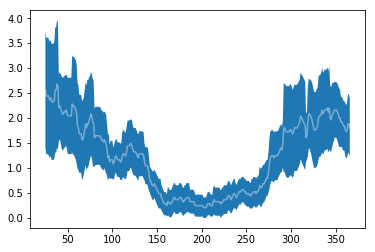

In [54]:
# Draw 99% inverval bands for average NO2
vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58*vandenberg_NO2['std_err']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58*vandenberg_NO2['std_err']

# Plot mean estimate as a white semi-transparent line
plt.plot('day', 'mean', data = vandenberg_NO2,
         color = 'white', alpha = 0.4)

# Fill between the upper and lower confidence band values
plt.fill_between(x = 'day', 
                 y1 = 'lower', y2 = 'upper', 
                 data = vandenberg_NO2)

plt.show()

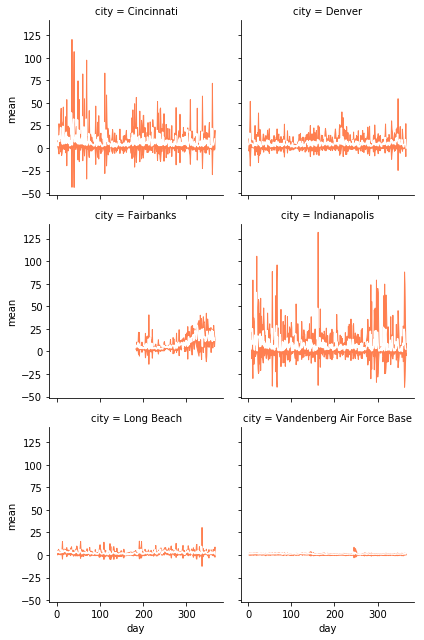

In [95]:
def std_err(df):
    return df.std()/np.sqrt(df.shape[0])

all_so2 = pollution[['city', 'day', 'SO2']].query('city != "Des Moines" & city != "Houston"')
all_SO2 = all_so2.groupby(['city', 'day']).agg(['mean', std_err])
all_SO2 = all_SO2.reset_index()
all_SO2.columns = ['city', 'day', 'mean', 'std_err']
all_SO2['lower'] = all_SO2['mean'] - 2.58*all_SO2['std_err']
all_SO2['upper'] = all_SO2['mean'] + 2.58*all_SO2['std_err']

# Setup a grid of plots with columns divided by location
g = sns.FacetGrid(all_SO2, col = 'city', col_wrap = 2)

# Map interval plots to each cities data with corol colored ribbons
g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'mean', color = 'white')

plt.show()

In [96]:
# sames as above - doesn't match their data
df_str = ',city,day,mean,std_err,lower,upper\n0,Cincinnati,24,8.515,1.2973583737734147,5.972177587404108,11.057822412595893\n1,Cincinnati,25,8.8825,1.2777532772409548,6.378103576607729,11.386896423392272\n2,Cincinnati,26,8.945,1.2813220711437074,6.433608740558334,11.456391259441666\n3,Cincinnati,27,8.477500000000001,1.317058631003191,5.896065083233746,11.058934916766255\n4,Cincinnati,28,9.2325,1.4163565714536717,6.456441119950803,12.008558880049197\n5,Cincinnati,29,8.447500000000002,1.2065574737657547,6.082647351419123,10.81235264858088\n6,Cincinnati,30,8.5,1.1922248110151037,6.1632393704103965,10.836760629589604\n7,Cincinnati,31,8.45,1.1952091867116816,6.1073899940451035,10.792610005954895\n8,Cincinnati,32,8.355,1.211795671720278,5.979880483428255,10.730119516571746\n9,Cincinnati,33,8.549999999999999,1.1857487086225311,6.225932531099838,10.87406746890016\n10,Cincinnati,34,8.2975,1.1761137009235119,5.992317146189916,10.602682853810084\n11,Cincinnati,35,7.8875,1.1178935269067443,5.696428687262781,10.07857131273722\n12,Cincinnati,36,7.915000000000001,1.112497752806719,5.734504404498832,10.09549559550117\n13,Cincinnati,37,8.002500000000001,1.1205940110048775,5.8061357384304415,10.198864261569561\n14,Cincinnati,38,10.7775,2.79915271778801,5.291160673135501,16.2638393268645\n15,Cincinnati,39,14.694999999999999,4.78472948556133,5.316930208299791,24.073069791700206\n16,Cincinnati,40,14.4625,4.798082787687181,5.058257736133125,23.866742263866875\n17,Cincinnati,41,14.814999999999998,4.771325942544692,5.463201152612401,24.166798847387597\n18,Cincinnati,42,15.12,4.747237881126244,5.81541375299256,24.42458624700744\n19,Cincinnati,43,15.41,4.719314833744407,6.1601429258609635,24.659857074139037\n20,Cincinnati,44,15.584999999999999,4.730060913984089,6.314080608591185,24.85591939140881\n21,Cincinnati,45,16.31,4.747673904134529,7.004559147896323,25.615440852103674\n22,Cincinnati,46,16.33,4.746595358780859,7.026673096789514,25.63332690321048\n23,Cincinnati,47,16.762499999999996,4.700027759226535,7.550445591915986,25.974554408084003\n24,Cincinnati,48,19.79,5.637187463620489,8.741112571303841,30.838887428696157\n25,Cincinnati,49,19.639999999999997,5.654742036556574,8.55670560834911,30.72329439165088\n26,Cincinnati,50,19.97,5.613581076282768,8.967381090485775,30.972618909514225\n27,Cincinnati,51,20.162499999999998,5.593671507829183,9.198903844654799,31.126096155345195\n28,Cincinnati,52,20.194999999999997,5.58884592290752,9.240861991101257,31.14913800889874\n29,Cincinnati,53,20.112499999999997,5.599006468785333,9.138447321180744,31.086552678819253\n30,Cincinnati,54,19.822499999999998,5.640463716530761,8.767191115599706,30.877808884400288\n31,Cincinnati,55,19.589999999999996,5.670846056806692,8.47514172865888,30.704858271341113\n32,Cincinnati,56,19.594999999999995,5.67015200413534,8.48150207189473,30.70849792810526\n33,Cincinnati,57,19.994999999999997,5.652859785099928,8.91539482120414,31.074605178795856\n34,Cincinnati,58,17.379999999999995,5.269492859849039,7.051793994695879,27.708206005304113\n35,Cincinnati,59,15.197499999999996,4.045614098934797,7.268096366087795,23.1269036339122\n36,Cincinnati,60,15.277499999999998,4.038006121528299,7.363008001804532,23.191991998195462\n37,Cincinnati,61,15.052499999999998,4.056116484705538,7.102511689977144,23.002488310022855\n38,Cincinnati,62,14.757499999999999,4.08277521270765,6.755260583093003,22.759739416906996\n39,Cincinnati,63,16.455,4.293906874863498,8.038942525267542,24.871057474732453\n40,Cincinnati,64,15.617499999999998,4.307161587112795,7.175463289258921,24.059536710741074\n41,Cincinnati,65,14.627499999999998,4.301670424091089,6.196225968781464,23.058774031218533\n42,Cincinnati,66,14.4625,4.310856752143361,6.013220765799012,22.91177923420099\n43,Cincinnati,67,14.8625,4.311030727969821,6.412879773179151,23.312120226820852\n44,Cincinnati,68,10.997499999999999,2.7181024516195116,5.670019194825756,16.324980805174242\n45,Cincinnati,69,11.1025,2.708427761174368,5.793981588098238,16.41101841190176\n46,Cincinnati,70,10.899999999999999,2.723251732763609,5.562426603783325,16.23757339621667\n47,Cincinnati,71,10.559999999999999,2.7464376927212455,5.176982122266358,15.94301787773364\n48,Cincinnati,72,10.737499999999997,2.730317918759645,5.3860768792310925,16.088923120768904\n49,Cincinnati,73,10.564999999999996,2.751797367176588,5.171477160333883,15.95852283966611\n50,Cincinnati,74,10.807499999999996,2.7196145751742105,5.477055432658544,16.13794456734145\n51,Cincinnati,75,10.724999999999996,2.7332181124088866,5.367892499678579,16.082107500321413\n52,Cincinnati,76,10.669999999999996,2.740600755308952,5.2984225195944505,16.041577480405543\n53,Cincinnati,77,10.417499999999995,2.7136052471757934,5.09883371553544,15.73616628446455\n54,Cincinnati,78,10.087499999999995,2.743854212143933,4.709545744197887,15.465454255802104\n55,Cincinnati,79,7.994999999999993,2.0067881676948365,4.061695191318114,11.928304808681872\n56,Cincinnati,80,7.729999999999994,2.0210158336836455,3.768808965980049,11.691191034019939\n57,Cincinnati,81,7.522499999999994,2.037892523539943,3.528230653861705,11.516769346138283\n58,Cincinnati,82,7.479999999999994,2.0413580038787904,3.478938312397565,11.481061687602423\n59,Cincinnati,83,5.6124999999999945,0.9203048068439064,3.808702578585938,7.4162974214140505\n60,Cincinnati,84,5.372499999999994,0.9408405483927655,3.5284525251501737,7.216547474849815\n61,Cincinnati,85,5.334999999999995,0.9408978424887582,3.4908402287220284,7.179159771277961\n62,Cincinnati,86,4.989999999999995,0.9502473362235748,3.1275152210017882,6.8524847789982015\n63,Cincinnati,87,4.237499999999995,0.6397155129430581,2.9836575946316017,5.491342405368389\n64,Cincinnati,88,4.239999999999995,0.639527169086662,2.9865267485901374,5.493473251409853\n65,Cincinnati,89,3.987499999999995,0.630355802305333,2.7520026274815423,5.2229973725184475\n66,Cincinnati,90,4.072499999999995,0.6425094843657949,2.813181410643037,5.331818589356954\n67,Cincinnati,91,4.299999999999995,0.6717421380261923,2.9833854094686583,5.6166145905313325\n68,Cincinnati,92,4.032499999999995,0.6595099980288395,2.73986040386347,5.325139596136521\n69,Cincinnati,93,4.649999999999996,0.8233240552783574,3.0362848516544156,6.263715148345576\n70,Cincinnati,94,4.4599999999999955,0.8302755566677849,2.832659908931137,6.087340091068854\n71,Cincinnati,95,4.467499999999996,0.8287209648005773,2.8432069089908643,6.091793091009127\n72,Cincinnati,96,4.477499999999996,0.8277716699066233,2.8550675269830137,6.0999324730169775\n73,Cincinnati,97,4.207499999999996,0.7080984659635975,2.819627006711345,5.595372993288647\n74,Cincinnati,98,4.347499999999996,0.6988693994588687,2.9777159770606128,5.717284022939379\n75,Cincinnati,99,4.182499999999996,0.711330399673738,2.788292416639469,5.576707583360522\n76,Cincinnati,100,4.494999999999996,0.7505822739713481,3.023858743016153,5.966141256983838\n77,Cincinnati,101,4.882499999999996,0.7867836027142405,3.3404041386800847,6.424595861319907\n78,Cincinnati,102,4.884999999999996,0.78660743067937,3.3432494358684313,6.426750564131561\n79,Cincinnati,103,4.634999999999996,0.8117889196090323,3.0438937175662932,6.226106282433699\n80,Cincinnati,104,4.6474999999999955,0.809463363902283,3.060951806751521,6.23404819324847\n81,Cincinnati,105,4.5049999999999955,0.8186643084928034,2.9004179553541007,6.10958204464589\n82,Cincinnati,106,4.614999999999996,0.8033375691451259,3.040458364475549,6.189541635524442\n83,Cincinnati,107,4.572499999999995,0.806950083648301,2.990877836049325,6.154122163950666\n84,Cincinnati,108,4.627499999999996,0.8043901028108189,3.050895398490791,6.204104601509201\n85,Cincinnati,109,4.782499999999996,0.7936724371552788,3.22690202317565,6.338097976824343\n86,Cincinnati,110,6.919999999999996,2.319534974946487,2.3737114491048814,11.466288550895111\n87,Cincinnati,111,6.747499999999995,2.3210543805563884,2.198233414109474,11.296766585890516\n88,Cincinnati,112,6.819999999999996,2.31486338689781,2.282867761680288,11.357132238319704\n89,Cincinnati,113,6.234999999999996,2.2885259994153446,1.74948904114592,10.72051095885407\n90,Cincinnati,114,7.892499999999996,2.6746267847122147,2.650231501964055,13.134768498035935\n91,Cincinnati,115,8.809999999999995,2.707421744021422,3.5034533817180087,14.116546618281982\n92,Cincinnati,116,9.009999999999994,2.6929412358980285,3.7318351776398586,14.28816482236013\n93,Cincinnati,117,8.874999999999996,2.697555606470421,3.5877910113179716,14.162208988682021\n94,Cincinnati,118,9.199999999999996,2.691298478430068,3.9250549822770617,14.47494501772293\n95,Cincinnati,119,9.404999999999996,2.6694917587436002,4.1727961528625395,14.637203847137453\n96,Cincinnati,120,9.167499999999995,2.679974988222838,3.9147490230832327,14.420250976916758\n97,Cincinnati,121,9.122499999999995,2.67963494481991,3.8704155081529716,14.374584491847019\n98,Cincinnati,122,9.244999999999994,2.6701121231139338,4.011580238696684,14.478419761303304\n99,Cincinnati,123,9.407499999999995,2.648568658256758,4.2163054298167495,14.598694570183241\n100,Cincinnati,124,9.522499999999996,2.6342775930983433,4.359315917527243,14.685684082472747\n101,Cincinnati,125,9.532499999999995,2.632886427003641,4.372042603072859,14.692957396927131\n102,Cincinnati,126,9.652499999999996,2.6214844911805217,4.514390397286173,14.790609602713818\n103,Cincinnati,127,9.899999999999995,2.6001490341901556,4.8037078929872905,14.9962921070127\n104,Cincinnati,128,9.812499999999996,2.6107802353894134,4.695370738636746,14.929629261363246\n105,Cincinnati,129,9.652499999999995,2.629656524624461,4.498373211736051,14.806626788263937\n106,Cincinnati,130,7.217499999999996,1.690315336704959,3.904481940058276,10.530518059941716\n107,Cincinnati,131,7.019999999999996,1.7157920911345872,3.6570475013762054,10.382952498623787\n108,Cincinnati,132,6.912499999999996,1.72980445065331,3.522083276719509,10.302916723280482\n109,Cincinnati,133,6.8524999999999965,1.737992645985592,3.446034413868236,10.258965586131756\n110,Cincinnati,134,5.224999999999996,0.9609272865310879,3.341582518399064,7.108417481600928\n111,Cincinnati,135,4.277499999999996,0.6545463600846009,2.994589134234179,5.560410865765814\n112,Cincinnati,136,4.117499999999996,0.6396803400918306,2.8637265334200084,5.371273466579984\n113,Cincinnati,137,3.917499999999996,0.6438485361480601,2.655556869149798,5.179443130850194\n114,Cincinnati,138,3.382499999999996,0.5423706643062474,2.319453497959751,4.445546502040241\n115,Cincinnati,139,3.3249999999999957,0.533168594348917,2.2799895550761184,4.370010444923873\n116,Cincinnati,140,3.272499999999996,0.529580907416421,2.2345214214638105,4.310478578536181\n117,Cincinnati,141,3.0574999999999957,0.446182067658484,2.182983147389367,3.9320168526106243\n118,Cincinnati,142,3.0424999999999955,0.44102543860870425,2.178090140326935,3.906909859673056\n119,Cincinnati,143,3.2674999999999956,0.5117528089810548,2.264464494397128,4.270535505602863\n120,Cincinnati,144,3.209999999999996,0.5104238434869593,2.2095692667655555,4.210430733234436\n121,Cincinnati,145,3.232499999999996,0.5088869594517038,2.2350815594746565,4.229918440525335\n122,Cincinnati,146,3.1174999999999957,0.4919384488937615,2.153300640168223,4.081699359831768\n123,Cincinnati,147,2.8549999999999955,0.4311162836173089,2.01001208411007,3.699987915889921\n124,Cincinnati,148,3.1424999999999956,0.5084200404193366,2.145996720778096,4.139003279221895\n125,Cincinnati,149,3.197499999999996,0.5047830598385805,2.208125202716378,4.186874797283614\n126,Cincinnati,150,3.334999999999996,0.48899258685587454,2.3765745297624816,4.29342547023751\n127,Cincinnati,151,3.5649999999999955,0.4794932220584562,2.6251932847654214,4.50480671523457\n128,Cincinnati,152,3.6399999999999957,0.46799572647621474,2.722728376106615,4.557271623893376\n129,Cincinnati,153,3.569999999999996,0.4881649311452022,2.6131967349553995,4.526803265044592\n130,Cincinnati,154,3.4899999999999958,0.5017419655560016,2.5065857475102327,4.473414252489759\n131,Cincinnati,155,3.509999999999996,0.4961300232801881,2.537585154370827,4.482414845629164\n132,Cincinnati,156,3.469999999999996,0.49649269883856284,2.496874310276413,4.44312568972358\n133,Cincinnati,157,3.422499999999996,0.5067725697983267,2.4292257631952756,4.415774236804716\n134,Cincinnati,158,3.989999999999996,0.6322637898852027,2.750762971824999,5.229237028174993\n135,Cincinnati,159,4.012499999999997,0.6335502643831821,2.77074148180896,5.254258518191033\n136,Cincinnati,160,4.137499999999997,0.6401745367475966,2.882757907974707,5.3922420920252865\n137,Cincinnati,161,3.9124999999999965,0.6655906681286929,2.6079422904677587,5.217057709532234\n138,Cincinnati,162,3.6874999999999964,0.667278755468807,2.379633639281135,4.995366360718858\n139,Cincinnati,163,3.3399999999999963,0.6294600861055449,2.106258231233128,4.5737417687668644\n140,Cincinnati,164,3.242499999999996,0.6399538557583663,1.9881904427135983,4.496809557286394\n141,Cincinnati,165,3.4099999999999957,0.6541750530248,2.127816896071388,4.6921831039286035\n142,Cincinnati,166,3.469999999999996,0.6571947960840834,2.1818981996751927,4.7581018003248\n143,Cincinnati,167,3.7774999999999963,0.7013600626639642,2.402834277178626,5.152165722821366\n144,Cincinnati,168,3.509999999999996,0.6604789928529142,2.2154611740082837,4.804538825991708\n145,Cincinnati,169,3.617499999999996,0.6650307793628804,2.3140396724487506,4.920960327551242\n146,Cincinnati,170,3.9649999999999963,0.7435732983371579,2.5075963352591666,5.422403664740826\n147,Cincinnati,171,3.804999999999997,0.7450243284618293,2.3447523162148114,5.265247683785183\n148,Cincinnati,172,3.7249999999999965,0.7539106379405984,2.247335149636424,5.202664850363569\n149,Cincinnati,173,3.8749999999999964,0.732209840141472,2.4398687133227117,5.310131286677281\n150,Cincinnati,174,4.272499999999996,0.7575905473935112,2.7876225271087147,5.757377472891278\n151,Cincinnati,175,4.257499999999996,0.761062374250626,2.7658177464687688,5.749182253531223\n152,Cincinnati,176,4.1424999999999965,0.7786147555113503,2.61641507919775,5.6685849208022425\n153,Cincinnati,177,4.512499999999997,0.7827026494780761,2.9784028070229676,6.046597192977026\n154,Cincinnati,178,4.2724999999999955,0.7000310260981294,2.900439188847662,5.6445608111523295\n155,Cincinnati,179,4.0674999999999955,0.718385994782749,2.6594634502258074,5.4755365497741835\n156,Cincinnati,180,3.9099999999999953,0.7135877661507376,2.5113679783445493,5.308632021655441\n157,Cincinnati,181,3.9449999999999954,0.7055042522905159,2.562211665510584,5.327788334489407\n158,Cincinnati,182,4.079999999999996,0.6938065292284297,2.7201392027122733,5.439860797287718\n159,Cincinnati,183,4.339999999999995,0.6908020700605926,2.986027942681234,5.693972057318756\n160,Cincinnati,184,4.564999999999996,0.6700942097944138,3.251615348802945,5.878384651197047\n161,Cincinnati,185,4.5849999999999955,0.6726635488860683,3.266579444183302,5.903420555816689\n162,Cincinnati,186,5.164999999999996,0.8824546730569224,3.435388840808428,6.894611159191563\n163,Cincinnati,187,4.974999999999995,0.8641795241730736,3.2812081326207707,6.66879186737922\n164,Cincinnati,188,5.0049999999999955,0.8613281894841246,3.316796748611111,6.69320325138888\n165,Cincinnati,189,5.252499999999996,0.8971655017330972,3.4940556166031254,7.0109443833968665\n166,Cincinnati,190,5.332499999999995,0.9233449720987275,3.5227438546864893,7.142256145313501\n167,Cincinnati,191,5.364999999999995,0.9182735158981774,3.5651839088395674,7.164816091160422\n168,Cincinnati,192,5.987499999999995,0.9789335715460982,4.0687901997696425,7.906209800230348\n169,Cincinnati,193,6.144999999999994,0.9680838031906124,4.247555745746394,8.042444254253594\n170,Cincinnati,194,6.249999999999995,0.9887555309579815,4.312039159322351,8.187960840677638\n171,Cincinnati,195,6.284999999999995,0.9792988563252791,4.365574241602448,8.204425758397543\n172,Cincinnati,196,6.404999999999996,0.9516754961645275,4.539716027517522,8.27028397248247\n173,Cincinnati,197,6.054999999999994,0.9794060700240734,4.135364102752811,7.974635897247178\n174,Cincinnati,198,5.7724999999999955,1.0027616553797818,3.807087155455623,7.737912844544368\n175,Cincinnati,199,5.792499999999995,0.9980310303292177,3.8363591805547284,7.748640819445262\n176,Cincinnati,200,6.494999999999996,1.121689016617351,4.296489527429988,8.693510472570004\n177,Cincinnati,201,6.482499999999996,1.1248126232844295,4.277867258362514,8.687132741637479\n178,Cincinnati,202,6.429999999999995,1.131400680572537,4.212454666077823,8.647545333922167\n179,Cincinnati,203,7.009999999999995,1.2698060875582537,4.521180068385818,9.498819931614172\n180,Cincinnati,204,7.169999999999996,1.2695540555643938,4.681674051093784,9.658325948906208\n181,Cincinnati,205,7.194999999999996,1.2691281456180852,4.707508834588548,9.682491165411443\n182,Cincinnati,206,6.804999999999995,1.1832524033358225,4.485825289461783,9.124174710538208\n183,Cincinnati,207,6.827499999999996,1.181595716605303,4.511572395453602,9.14342760454639\n184,Cincinnati,208,6.824999999999996,1.1819343255866628,4.508408721850136,9.141591278149855\n185,Cincinnati,209,6.447499999999995,1.1860990420281097,4.122745877624901,8.77225412237509\n186,Cincinnati,210,6.0849999999999955,1.1526388202728552,3.8258279122651992,8.344172087734792\n187,Cincinnati,211,6.557499999999996,1.1770528609624973,4.250476392513502,8.86452360748649\n188,Cincinnati,212,6.467499999999996,1.152569276659759,4.208464217746869,8.726535782253123\n189,Cincinnati,213,6.427499999999995,1.1535189367756387,4.166602883919744,8.688397116080246\n190,Cincinnati,214,6.197499999999995,1.1284473569910116,3.9857431802976127,8.409256819702378\n191,Cincinnati,215,7.224999999999994,1.331594439009115,4.61507489954213,9.834925100457859\n192,Cincinnati,216,7.687499999999995,1.3362535079467517,5.068443124424361,10.306556875575628\n193,Cincinnati,217,8.302499999999995,1.3213273392691152,5.712698415032529,10.892301584967461\n194,Cincinnati,218,8.789999999999996,1.2796952762278995,6.281797258593313,11.298202741406678\n195,Cincinnati,219,8.812499999999995,1.2732383663320863,6.316952801989105,11.308047198010884\n196,Cincinnati,220,8.039999999999994,1.250317959560687,5.589376799261047,10.490623200738941\n197,Cincinnati,221,8.334999999999994,1.196208071365513,5.990432180123588,10.6795678198764\n198,Cincinnati,222,9.257499999999995,1.3253078651769936,6.6598965842530875,11.855103415746903\n199,Cincinnati,223,8.527499999999995,1.2673765965568404,6.0434418707485875,11.011558129251402\n200,Cincinnati,224,8.362499999999994,1.27674818875924,5.860073550031883,10.864926449968104\n201,Cincinnati,225,8.047499999999994,1.3293864891370004,5.441902481291473,10.653097518708515\n202,Cincinnati,226,7.812499999999995,1.345027299908816,5.1762464921787155,10.448753507821273\n203,Cincinnati,227,8.369999999999994,1.4015321972755388,5.622996893339938,11.11700310666005\n204,Cincinnati,228,8.579999999999995,1.380585926337075,5.874051584379328,11.285948415620663\n205,Cincinnati,229,8.937499999999995,1.346717653222085,6.297933399684708,11.57706660031528\n206,Cincinnati,230,9.119999999999994,1.3303307859325813,6.512551659572135,11.727448340427852\n207,Cincinnati,231,9.099999999999993,1.3281189705745493,6.496886817673876,11.70311318232611\n208,Cincinnati,232,8.939999999999994,1.320083330703028,6.35263667182206,11.527363328177929\n209,Cincinnati,233,8.787499999999993,1.3480257555032098,6.145369519213702,11.429630480786283\n210,Cincinnati,234,9.257499999999993,1.3854659640352052,6.541986710490991,11.973013289508994\n211,Cincinnati,235,8.247499999999993,1.271522094774605,5.755316694241767,10.73968330575822\n212,Cincinnati,236,7.687499999999995,1.2980556372898657,5.143310950911857,10.231689049088132\n213,Cincinnati,237,7.137499999999994,1.2855488856904664,4.61782418404668,9.657175815953309\n214,Cincinnati,238,6.7549999999999955,1.2791545059139648,4.247857168408625,9.262142831591365\n215,Cincinnati,239,6.897499999999996,1.2583693565483864,4.431096061165158,9.363903938834834\n216,Cincinnati,240,6.939999999999998,1.2498229874666251,4.490346944565413,9.389653055434582\n217,Cincinnati,241,6.857499999999997,1.2533618541746034,4.400910765817775,9.31408923418222\n218,Cincinnati,242,6.079999999999997,1.0014264825737333,4.11720409415548,8.042795905844514\n219,Cincinnati,243,5.9499999999999975,1.0249390225764652,3.9411195157501258,7.958880484249869\n220,Cincinnati,244,5.867499999999998,1.0304930555321563,3.8477336111569715,7.887266388843024\n221,Cincinnati,245,6.859999999999998,1.2185421617654433,4.4716573629397285,9.248342637060267\n222,Cincinnati,246,6.869999999999997,1.217324936079106,4.48404312528495,9.255956874715045\n223,Cincinnati,247,6.147499999999997,1.1338566653241493,3.9251409359646647,8.36985906403533\n224,Cincinnati,248,5.922499999999998,1.1386586132375232,3.690729118054452,8.154270881945543\n225,Cincinnati,249,5.842499999999997,1.1278312983332215,3.6319506552668828,8.053049344733111\n226,Cincinnati,250,5.5574999999999966,1.1290940782326335,3.344475606664035,7.770524393335958\n227,Cincinnati,251,5.109999999999998,1.0878913089091207,2.977733034538121,7.242266965461875\n228,Cincinnati,252,5.444999999999998,1.1883018345521479,3.115928404277788,7.774071595722207\n229,Cincinnati,253,5.344999999999997,1.2047868068666754,2.9836178585413133,7.706382141458681\n230,Cincinnati,254,4.969999999999997,1.0905468811564225,2.8325281129334092,7.107471887066585\n231,Cincinnati,255,5.402499999999997,1.1060768226032043,3.234589427697717,7.570410572302277\n232,Cincinnati,256,5.467499999999997,1.0953439813592805,3.3206257965358073,7.614374203464186\n233,Cincinnati,257,5.6199999999999966,1.0847200099564864,3.493948780485283,7.74605121951471\n234,Cincinnati,258,5.857499999999996,1.086757073821008,3.727456135310821,7.987543864689172\n235,Cincinnati,259,5.717499999999997,1.1036149407741815,3.5544147160826007,7.880585283917393\n236,Cincinnati,260,6.277499999999997,1.1508718162766869,4.021791240097691,8.533208759902303\n237,Cincinnati,261,6.232499999999997,1.1542003454773353,3.9702673228644203,8.494732677135573\n238,Cincinnati,262,6.184999999999998,1.1556064425227128,3.920011372655481,8.449988627344515\n239,Cincinnati,263,6.282499999999998,1.1377130295026072,4.052582462174888,8.512417537825108\n240,Cincinnati,264,6.292499999999998,1.136619301921272,4.064726168234305,8.52027383176569\n241,Cincinnati,265,5.337499999999998,0.8926006595897181,3.5880027072041503,7.086997292795845\n242,Cincinnati,267,5.4274999999999975,0.8901648372633012,3.6827769189639272,7.172223081036067\n243,Cincinnati,268,5.444999999999998,0.8869533527756687,3.706571428559687,7.183428571440308\n244,Cincinnati,269,5.377499999999998,0.8974928620886072,3.6184139903063275,7.1365860096936675\n245,Cincinnati,270,5.172499999999998,0.8880207978983377,3.431979236119256,6.9130207638807395\n246,Cincinnati,271,5.087499999999998,0.9033470747724818,3.3169397334459334,6.858060266554062\n247,Cincinnati,272,5.684999999999997,1.0121703166957623,3.7011461792763027,7.668853820723691\n248,Cincinnati,273,5.082499999999998,0.883743988664138,3.3503617822182874,6.814638217781708\n249,Cincinnati,274,5.239999999999997,0.8553405754434896,3.563532472130757,6.916467527869236\n250,Cincinnati,275,4.887499999999997,0.8592211225871952,3.2034265997290943,6.571573400270899\n251,Cincinnati,276,4.709999999999996,0.8198292505150081,3.1031346689905805,6.316865331009412\n252,Cincinnati,277,4.834999999999996,0.8116118222401643,3.2442408284092745,6.425759171590718\n253,Cincinnati,278,4.789999999999997,0.8108144053974374,3.20080376542102,6.379196234578975\n254,Cincinnati,279,4.487499999999997,0.7988575827392514,2.9217391378310644,6.05326086216893\n255,Cincinnati,280,4.467499999999997,0.8025138238684739,2.894572905217788,6.040427094782205\n256,Cincinnati,281,4.342499999999997,0.738895078817013,2.8942656455186513,5.7907343544813425\n257,Cincinnati,282,4.354999999999997,0.7387903965266467,2.9069708228077693,5.803029177192224\n258,Cincinnati,283,4.192499999999997,0.748066465964088,2.7262897267103847,5.65871027328961\n259,Cincinnati,284,4.0749999999999975,0.7659838444771533,2.573671664824777,5.5763283351752175\n260,Cincinnati,285,4.424999999999997,0.8348540291571935,2.788686102851898,6.061313897148096\n261,Cincinnati,286,4.504999999999997,0.8241730704166449,2.889620781983373,6.120379218016621\n262,Cincinnati,287,4.302499999999997,0.831861429265716,2.672051598639193,5.9329484013608\n263,Cincinnati,288,4.234999999999998,0.8423189716491014,2.584054815567759,5.885945184432236\n264,Cincinnati,289,4.242499999999997,0.8413328339604964,2.593487645437424,5.89151235456257\n265,Cincinnati,290,4.179999999999997,0.8442481862580457,2.525273554934228,5.834726445065766\n266,Cincinnati,291,4.1599999999999975,0.8481715628338408,2.4975837368456695,5.8224162631543255\n267,Cincinnati,292,4.229999999999998,0.8938008726780254,2.478150289551068,5.981849710448928\n268,Cincinnati,293,4.357499999999997,0.8965159995783678,2.6003286408263966,6.114671359173598\n269,Cincinnati,294,4.224999999999998,0.9112937232308802,2.438864302467473,6.011135697532523\n270,Cincinnati,295,4.389999999999999,0.8993789523888137,2.627217253317924,6.152782746682074\n271,Cincinnati,296,4.407499999999998,0.9018333756853314,2.6399065836567486,6.175093416343247\n272,Cincinnati,297,4.7574999999999985,0.9739948344318875,2.848470124513499,6.666529875486498\n273,Cincinnati,298,5.164999999999997,1.0497803341652006,3.1074305450362045,7.22256945496379\n274,Cincinnati,299,5.719999999999997,1.110351295761841,3.5437114603067887,7.896288539693206\n275,Cincinnati,300,5.742499999999998,1.1061321971175055,3.574480893649687,7.910519106350309\n276,Cincinnati,301,5.819999999999998,1.1269338933584347,3.6112095690174657,8.028790430982529\n277,Cincinnati,302,6.657499999999997,1.3465524265694224,4.018257243923929,9.296742756076064\n278,Cincinnati,303,6.6424999999999965,1.3493344424196692,3.997804492857445,9.287195507142549\n279,Cincinnati,304,6.717499999999997,1.3345798730312097,4.1017234488588254,9.333276551141168\n280,Cincinnati,305,6.492499999999997,1.317228506182583,3.9107321278821345,9.07426787211786\n281,Cincinnati,306,6.862499999999995,1.318246349321704,4.2787371553294555,9.446262844670535\n282,Cincinnati,307,6.839999999999996,1.3227839959721315,4.247343367894619,9.432656632105374\n283,Cincinnati,308,7.012499999999996,1.2951007441508169,4.474102541464395,9.550897458535596\n284,Cincinnati,309,7.357499999999996,1.2731372422091816,4.86215100527,9.852848994729992\n285,Cincinnati,310,7.392499999999996,1.2673164314803151,4.9085597942985775,9.876440205701414\n286,Cincinnati,311,7.5899999999999945,1.2288134520748055,5.181525633933376,9.998474366066613\n287,Cincinnati,312,6.929999999999995,1.1628596217944795,4.650795141282815,9.209204858717175\n288,Cincinnati,313,7.374999999999996,1.2234198992986833,4.977096997374576,9.772903002625416\n289,Cincinnati,314,7.407499999999996,1.2152688745705618,5.025573005841695,9.789426994158298\n290,Cincinnati,315,7.219999999999996,1.2497919826915198,4.770407713924618,9.669592286075375\n291,Cincinnati,316,6.912499999999996,1.2866617416788297,4.39064298630949,9.434357013690502\n292,Cincinnati,317,6.309999999999996,1.3026300318970079,3.7568451374818608,8.863154862518131\n293,Cincinnati,318,6.087499999999997,1.2647029048357563,3.6086823065219145,8.56631769347808\n294,Cincinnati,319,5.549999999999996,1.2180209357806622,3.1626789658698984,7.937321034130094\n295,Cincinnati,320,5.502499999999996,1.2261855232794097,3.099176374372353,7.905823625627638\n296,Cincinnati,321,5.447499999999996,1.2114633455041055,3.0730318428119494,7.821968157188043\n297,Cincinnati,322,4.652499999999996,0.9075755822519687,2.873651858786138,6.431348141213855\n298,Cincinnati,323,4.757499999999996,0.895022869819537,3.0032551751537033,6.511744824846288\n299,Cincinnati,324,4.922499999999996,0.8853846268712823,3.1871461313322826,6.65785386866771\n300,Cincinnati,325,4.6699999999999955,0.8984250107827586,2.9090869788657887,6.430913021134202\n301,Cincinnati,330,4.409999999999995,0.8491804872934845,2.7456062449047653,6.074393755095224\n302,Cincinnati,331,4.912499999999995,0.8970568195493526,3.154268633683264,6.670731366316726\n303,Cincinnati,332,4.937499999999995,0.8967432394504014,3.179883250677208,6.695116749322781\n304,Cincinnati,333,4.554999999999994,0.8875521111461568,2.815397862153527,6.294602137846462\n305,Cincinnati,334,4.454999999999995,0.898776251355141,2.6933985473439184,6.216601452656072\n306,Cincinnati,335,4.354999999999995,0.9032434610889799,2.5846428162655943,6.125357183734396\n307,Cincinnati,336,4.292499999999995,0.9097889521751734,2.509313653736655,6.0756863462633355\n308,Cincinnati,337,4.369999999999995,0.9566830718686308,2.4949011791374787,6.245098820862511\n309,Cincinnati,338,4.549999999999995,0.9466585973834494,2.6945491491284344,6.405450850871556\n310,Cincinnati,339,4.602499999999995,0.9378797564186999,2.764255677419343,6.440744322580646\n311,Cincinnati,340,4.832499999999994,0.9197097028410649,3.0298689824315073,6.635131017568481\n312,Cincinnati,341,4.887499999999994,0.9064275688106578,3.110901965131105,6.664098034868883\n313,Cincinnati,342,4.639999999999995,0.8911270953124475,2.8933908931875982,6.386609106812392\n314,Cincinnati,343,4.599999999999995,0.8965419677851114,2.842777743141177,6.3572222568588135\n315,Cincinnati,344,4.632499999999995,0.8902827851306572,2.887545741143907,6.377454258856083\n316,Cincinnati,345,4.1074999999999955,0.8345827924777743,2.4717177267435577,5.743282273256433\n317,Cincinnati,346,4.469999999999995,0.9278833439608666,2.6513486458366966,6.288651354163294\n318,Cincinnati,347,4.4824999999999955,0.927377181895263,2.66484072348528,6.3001592765147105\n319,Cincinnati,348,4.749999999999995,0.9766716439008558,2.835723577954317,6.664276422045672\n320,Cincinnati,349,4.994999999999996,0.9631257706031957,3.1072734896177323,6.882726510382259\n321,Cincinnati,350,4.837499999999995,0.9732219364050524,2.9299850046460927,6.745014995353897\n322,Cincinnati,351,4.974999999999995,1.0269706665723222,2.962137493518244,6.987862506481747\n323,Cincinnati,352,4.982499999999995,1.0269875546957712,2.969604392796283,6.995395607203706\n324,Cincinnati,353,4.984999999999995,1.0265482209813621,2.972965486876525,6.997034513123465\n325,Cincinnati,354,4.924999999999995,1.0383309925067246,2.8898712546868155,6.960128745313176\n326,Cincinnati,355,4.824999999999995,1.0539835150513501,2.7591923104993485,6.890807689500641\n327,Cincinnati,356,4.904999999999996,1.045352213371168,2.8561096617925066,6.953890338207485\n328,Cincinnati,357,4.124999999999996,0.8798472878858011,2.4004993157438257,5.849500684256165\n329,Cincinnati,358,3.869999999999995,0.8991621099668291,2.10764226446501,5.63235773553498\n330,Cincinnati,359,3.7949999999999955,0.9100748595582673,2.0112532752657915,5.5787467247341995\n331,Cincinnati,360,3.6024999999999956,0.9108545095129077,1.8172251613546966,5.387774838645295\n332,Cincinnati,361,3.612499999999996,0.909477013178453,1.829925054170228,5.395074945829764\n333,Cincinnati,362,3.519999999999995,0.915009562791559,1.7265812569285395,5.313418743071451\n334,Cincinnati,363,3.4799999999999955,0.9195882230650846,1.6776070827924299,5.282392917207561\n335,Cincinnati,364,3.6024999999999956,0.914135349661088,1.8107947146642631,5.394205285335728\n336,Cincinnati,365,4.214999999999995,1.0146803683919383,2.2262264779517964,6.203773522048195\n337,Des Moines,90,3.612499999999996,0.9371624392281203,1.7756616191128802,5.449338380887111\n338,Des Moines,91,3.419999999999996,0.9533650927110766,1.5514044182862858,5.288595581713706\n339,Des Moines,92,2.8799999999999963,0.8873584394144228,1.1407774587477277,4.619222541252265\n340,Des Moines,93,2.5674999999999963,0.8802646974064107,0.8421811930834315,4.292818806916561\n341,Des Moines,94,2.462499999999996,0.8889591877583581,0.720139991993614,4.204860008006378\n342,Des Moines,95,1.764999999999996,0.6638627493691749,0.4638290112364132,3.0661709887635786\n343,Des Moines,96,1.522499999999996,0.6447526172882123,0.2587848701150999,2.786215129884892\n344,Des Moines,97,1.479999999999996,0.6464847252642556,0.21288993848205506,2.7471100615179367\n345,Des Moines,98,1.469999999999996,0.6474700765286378,0.20095865000386604,2.7390413499961257\n346,Des Moines,99,1.452499999999996,0.6488689678972173,0.1807168229214502,2.724283177078542\n347,Des Moines,100,1.289999999999996,0.6437934451359381,0.028164847533557413,2.5518351524664347\n348,Des Moines,101,1.264999999999996,0.645204424969327,0.00039932706011502894,2.5296006729398766\n349,Des Moines,102,1.2924999999999958,0.6432755533206589,0.031679915491504396,2.553320084508487\n350,Des Moines,103,1.274999999999996,0.6446462208064202,0.011493407219412388,2.538506592780579\n351,Des Moines,104,1.189999999999996,0.6471630397357376,-0.07843955788204982,2.4584395578820417\n352,Des Moines,105,1.129999999999996,0.6497537995271747,-0.14351744707326652,2.4035174470732583\n353,Des Moines,106,1.062499999999996,0.6509020183560655,-0.2132679559778925,2.3382679559778845\n354,Des Moines,107,1.014999999999996,0.6527738888773049,-0.2644368221995217,2.2944368221995135\n355,Des Moines,108,0.824999999999996,0.6361161450552878,-0.4217876443083681,2.07178764430836\n356,Des Moines,109,0.18749999999999592,0.0427017271313468,0.1038046148225562,0.27119538517743563\n357,Des Moines,110,0.18999999999999592,0.043387786299833274,0.1049599388523227,0.27504006114766916\n358,Des Moines,111,0.19499999999999593,0.04255878287733332,0.11158478556042262,0.27841521443956924\n359,Des Moines,112,0.20249999999999596,0.04145404081630644,0.12125008000003534,0.2837499199999566\n360,Des Moines,113,0.21499999999999594,0.04017150731550908,0.13626384566159816,0.29373615433839373\n361,Des Moines,114,0.21499999999999594,0.040171507315509086,0.13626384566159813,0.29373615433839373\n362,Des Moines,115,0.22249999999999592,0.04022980860009154,0.14364957514381652,0.30135042485617536\n363,Des Moines,116,0.24999999999999592,0.04911720676097125,0.15373027474849227,0.34626972525149957\n364,Des Moines,117,0.23249999999999593,0.046673734583810626,0.1410194802157271,0.3239805197842648\n365,Des Moines,118,0.22749999999999596,0.047628116695918175,0.13414889127599633,0.3208511087239956\n366,Des Moines,119,0.21499999999999594,0.04887484015319129,0.11920531329974102,0.3107946867002509\n367,Des Moines,120,0.20749999999999594,0.049909292721896995,0.10967778626507783,0.305322213734914\n368,Des Moines,121,0.19249999999999595,0.0506550836540618,0.09321603603803483,0.29178396396195705\n369,Des Moines,122,0.17499999999999594,0.045345892868042637,0.08612204997863238,0.2638779500213595\n370,Des Moines,123,0.17249999999999593,0.045617293869759525,0.08309010401526727,0.2619098959847246\n371,Des Moines,124,0.1799999999999959,0.04477722635447623,0.0922366363452225,0.2677633636547693\n372,Des Moines,125,0.21499999999999592,0.050386009963084,0.11624342047235128,0.3137565795276406\n373,Des Moines,126,0.24249999999999589,0.0567092364610916,0.13134989653625634,0.35365010346373543\n374,Des Moines,127,0.2599999999999959,0.05630275304103698,0.14964660403956342,0.3703533959604284\n375,Des Moines,128,0.2599999999999959,0.05630275304103698,0.14964660403956342,0.3703533959604284\n376,Des Moines,129,0.2374999999999959,0.05677532474587881,0.12622036349807345,0.34877963650191834\n377,Des Moines,130,0.2299999999999959,0.05583457710057451,0.12056422888286987,0.3394357711171219\n378,Des Moines,131,0.2299999999999959,0.05583457710057451,0.12056422888286987,0.3394357711171219\n379,Des Moines,132,0.22249999999999587,0.05684133619119101,0.1110909810652615,0.33390901893473024\n380,Des Moines,133,0.20999999999999588,0.05783597496368501,0.09664148907117326,0.3233585109288185\n381,Des Moines,134,0.2174999999999959,0.05692923238548014,0.10591870452445483,0.32908129547553694\n382,Des Moines,135,0.2024999999999959,0.05771427466407248,0.08938002165841384,0.31561997834157796\n383,Des Moines,136,0.1674999999999959,0.04902486613954188,0.07141126236649382,0.263588737633498\n384,Des Moines,137,0.16499999999999587,0.04900255095400646,0.0689550001301432,0.2610449998698485\n385,Des Moines,138,0.17749999999999588,0.048409064233880826,0.08261823410158947,0.2723817658984023\n386,Des Moines,139,0.1849999999999959,0.04757888187000615,0.09174539153478384,0.27825460846520794\n387,Des Moines,140,0.19249999999999587,0.04667373458381062,0.10101948021572706,0.2839805197842647\n388,Des Moines,141,0.19749999999999587,0.0458904946584802,0.10755463046937469,0.28744536953061706\n389,Des Moines,142,0.1899999999999959,0.04563441683641854,0.10055654300061555,0.2794434569993762\n390,Des Moines,143,0.19749999999999593,0.0450659239337218,0.1091707890899012,0.28582921091009067\n391,Des Moines,144,0.22249999999999587,0.050059339787895715,0.12438369401572026,0.3206163059842715\n392,Des Moines,145,0.19249999999999584,0.04391397841234611,0.10642860231179747,0.2785713976881942\n393,Des Moines,146,0.15499999999999586,0.034260035026251794,0.08785033134854235,0.22214966865144936\n394,Des Moines,147,0.13499999999999585,0.032615180514600856,0.07107424619137817,0.19892575380861352\n395,Des Moines,148,0.12749999999999587,0.03325563861963862,0.06231894830550416,0.19268105169448757\n396,Des Moines,149,0.13249999999999587,0.032648698289518364,0.06850855135253987,0.19649144864745188\n397,Des Moines,150,0.12249999999999588,0.03151884357015656,0.06072306660248902,0.18427693339750273\n398,Des Moines,151,0.11999999999999586,0.03170173496829471,0.057864599462138226,0.1821354005378535\n399,Des Moines,152,0.11999999999999586,0.03170173496829471,0.057864599462138226,0.1821354005378535\n400,Des Moines,153,0.11999999999999586,0.03170173496829472,0.05786459946213821,0.18213540053785351\n401,Des Moines,154,0.11249999999999587,0.03218598297395933,0.04941547337103558,0.17558452662895616\n402,Des Moines,155,0.11249999999999587,0.03218598297395933,0.04941547337103558,0.17558452662895616\n403,Des Moines,156,0.10749999999999586,0.032648698289518364,0.043508551352539865,0.17149144864745186\n404,Des Moines,157,0.09999999999999587,0.03297726489568229,0.035364560804458586,0.16463543919553314\n405,Des Moines,158,0.08999999999999586,0.032132538026119255,0.027020225468802117,0.1529797745311896\n406,Des Moines,159,0.08249999999999587,0.03226356303944125,0.019263416442691014,0.14573658355730074\n407,Des Moines,160,0.07749999999999586,0.0321082154595985,0.014567897699182805,0.14043210230080894\n408,Des Moines,161,0.07999999999999585,0.032287768581925884,0.016715973579421117,0.1432840264205706\n409,Des Moines,162,0.07999999999999585,0.032287768581925884,0.016715973579421117,0.1432840264205706\n410,Des Moines,163,0.06999999999999586,0.03189827581547316,0.007479379401668471,0.13252062059832326\n411,Des Moines,164,0.037499999999995856,0.01165922381636102,0.014647921319928255,0.06035207868006345\n412,Des Moines,165,0.03999999999999586,0.012549900398011132,0.015402195219894041,0.06459780478009768\n413,Des Moines,166,0.03999999999999586,0.012549900398011135,0.015402195219894034,0.06459780478009769\n414,Des Moines,167,0.03999999999999586,0.012549900398011135,0.015402195219894034,0.06459780478009769\n415,Des Moines,168,0.03999999999999586,0.012549900398011135,0.015402195219894034,0.06459780478009769\n416,Des Moines,169,0.03499999999999586,0.012298373876248842,0.010895187202548132,0.05910481279744359\n417,Des Moines,170,0.029999999999995863,0.011937336386313323,0.006602820682821749,0.053397179317169974\n418,Des Moines,171,0.02749999999999586,0.011976539567003485,0.00402598244866903,0.05097401755132269\n419,Des Moines,172,0.02749999999999586,0.011976539567003485,0.00402598244866903,0.05097401755132269\n420,Des Moines,173,0.02749999999999586,0.011976539567003485,0.00402598244866903,0.05097401755132269\n421,Des Moines,174,0.02749999999999586,0.011976539567003485,0.00402598244866903,0.05097401755132269\n422,Des Moines,175,0.02749999999999586,0.011976539567003485,0.00402598244866903,0.05097401755132269\n423,Des Moines,176,0.03499999999999586,0.013275918047351754,0.008979200627186424,0.0610207993728053\n424,Des Moines,177,0.03999999999999586,0.013509256086106296,0.013521858071227518,0.0664781419287642\n425,Des Moines,178,0.037499999999995856,0.013635890143294643,0.010773655319138355,0.06422634468085336\n426,Des Moines,179,0.037499999999995856,0.013635890143294643,0.010773655319138355,0.06422634468085336\n427,Des Moines,180,0.034999999999995854,0.01373863166403409,0.00807228193848904,0.06192771806150267\n428,Des Moines,181,0.027499999999995854,0.012487493743742178,0.003024512262261185,0.05197548773773052\n429,Des Moines,182,0.019999999999995854,0.0108397416943394,-0.0012458937209093683,0.04124589372090108\n430,Des Moines,183,0.022499999999995853,0.010882899429839459,0.0011695171175105136,0.04383048288248119\n431,Des Moines,184,0.027499999999995854,0.011442792491345808,0.0050721267169580725,0.049927873283033636\n432,Des Moines,185,0.03249999999999585,0.014694812009685596,0.0036981684610120844,0.06130183153897962\n433,Des Moines,186,0.042499999999995854,0.01668644659596524,0.009794564671903983,0.07520543532808772\n434,Des Moines,187,0.044999999999995856,0.016545392107774295,0.012571031468758237,0.07742896853123347\n435,Des Moines,188,0.04749999999999586,0.016384062377810944,0.015387237739486408,0.07961276226050532\n436,Des Moines,189,0.04749999999999586,0.016384062377810944,0.015387237739486408,0.07961276226050532\n437,Des Moines,190,0.04749999999999586,0.016384062377810944,0.015387237739486408,0.07961276226050532\n438,Des Moines,191,0.05249999999999586,0.016384062377810944,0.020387237739486412,0.08461276226050532\n439,Des Moines,192,0.054999999999995865,0.016163229875244614,0.023320069444516422,0.0866799305554753\n440,Des Moines,193,0.05999999999999587,0.016046806535881215,0.02854825918966869,0.09145174081032305\n441,Des Moines,194,0.06249999999999587,0.015761900266148113,0.03160667547834557,0.09339332452164617\n442,Des Moines,195,0.06249999999999587,0.015761900266148113,0.03160667547834557,0.09339332452164617\n443,Des Moines,196,0.05499999999999587,0.0153704261489394,0.02487396474807465,0.08512603525191709\n444,Des Moines,197,0.05249999999999587,0.015196627915429134,0.022714609285754767,0.08228539071423698\n445,Des Moines,198,0.06499999999999587,0.01771298958391835,0.030282540415515903,0.09971745958447584\n446,Des Moines,199,0.06999999999999587,0.017464249196572978,0.03577007157471283,0.10422992842527891\n447,Des Moines,200,0.09749999999999588,0.028825986539926088,0.04100106638174075,0.153998933618251\n448,Des Moines,201,0.10499999999999587,0.02848245073725223,0.0491743965549815,0.16082560344501023\n449,Des Moines,202,0.10499999999999587,0.02848245073725223,0.0491743965549815,0.16082560344501023\n450,Des Moines,203,0.10249999999999589,0.028825986539926088,0.04600106638174076,0.15899893361825101\n451,Des Moines,204,0.09749999999999588,0.029256409554147277,0.04015743727386722,0.15484256272612454\n452,Des Moines,205,0.09249999999999588,0.02834497309929928,0.03694385272536929,0.14805614727462246\n453,Des Moines,206,0.07749999999999588,0.029256409554147277,0.020157437273867214,0.13484256272612455\n454,Des Moines,207,0.06999999999999587,0.030495901363953814,0.010228033326646395,0.12977196667334534\n455,Des Moines,208,0.06249999999999586,0.031598061649411355,0.0005677991671496005,0.12443220083284212\n456,Des Moines,209,0.05749999999999585,0.032456701927336976,-0.006115135777584622,0.12111513577757632\n457,Des Moines,210,0.05749999999999585,0.032456701927336976,-0.006115135777584622,0.12111513577757632\n458,Des Moines,211,0.05249999999999585,0.032495191952041154,-0.011190576226004813,0.11619057622599652\n459,Des Moines,212,0.049999999999995846,0.03259601202601325,-0.013888183570990122,0.11388818357098182\n460,Des Moines,213,0.04499999999999585,0.03257683225852385,-0.018850591226710886,0.10885059122670258\n461,Des Moines,214,0.04249999999999585,0.03264869828951837,-0.021491448647460165,0.10649144864745186\n462,Des Moines,215,0.04249999999999585,0.03264869828951837,-0.021491448647460165,0.10649144864745186\n463,Des Moines,216,0.04249999999999585,0.03264869828951837,-0.021491448647460165,0.10649144864745186\n464,Des Moines,217,0.039999999999995844,0.03271085446759225,-0.024113274756484962,0.10411327475647665\n465,Des Moines,218,0.027499999999995844,0.030918238953730855,-0.03309974834931663,0.08809974834930832\n466,Des Moines,219,0.022499999999995846,0.030715427719633013,-0.03770223833048486,0.08270223833047655\n467,Des Moines,220,0.0024999999999958445,0.016384062377810944,-0.029612762260513605,0.034612762260505296\n468,Des Moines,221,0.022499999999995846,0.030715427719633013,-0.03770223833048486,0.08270223833047655\n469,Des Moines,222,0.054999999999995844,0.043286834026063856,-0.029842194691089313,0.139842194691081\n470,Des Moines,223,0.054999999999995844,0.043286834026063856,-0.029842194691089313,0.139842194691081\n471,Des Moines,224,0.057499999999995846,0.0431964987007049,-0.02716513745338575,0.14216513745337744\n472,Des Moines,225,0.05499999999999585,0.04299709292498738,-0.029274302132979414,0.13927430213297112\n473,Des Moines,226,0.06249999999999586,0.042260353760942414,-0.02033029337145128,0.145330293371443\n474,Des Moines,227,0.06749999999999587,0.041574481355754755,-0.013985983457283455,0.1489859834572752\n475,Des Moines,228,0.07499999999999588,0.040697051490249256,-0.004766220920892669,0.15476622092088443\n476,Des Moines,229,0.07999999999999588,0.039906139878469825,0.0017839658381950257,0.15821603416179675\n477,Des Moines,230,0.07999999999999588,0.039906139878469825,0.0017839658381950257,0.15821603416179675\n478,Des Moines,231,0.08249999999999588,0.03972955449032872,0.00463007319895159,0.16036992680104017\n479,Des Moines,232,0.08249999999999588,0.03972955449032873,0.004630073198951576,0.16036992680104017\n480,Des Moines,233,0.08249999999999588,0.03972955449032873,0.004630073198951576,0.16036992680104017\n481,Des Moines,234,0.08249999999999588,0.03972955449032873,0.004630073198951576,0.16036992680104017\n482,Des Moines,235,0.08499999999999588,0.03954427897939221,0.007493213200387164,0.16250678679960462\n483,Des Moines,236,0.08499999999999588,0.03954427897939221,0.007493213200387164,0.16250678679960462\n484,Des Moines,237,0.08499999999999588,0.03954427897939221,0.007493213200387164,0.16250678679960462\n485,Des Moines,238,0.08499999999999588,0.03954427897939221,0.007493213200387164,0.16250678679960462\n486,Des Moines,239,0.08499999999999588,0.03954427897939221,0.007493213200387164,0.16250678679960462\n487,Des Moines,240,0.07749999999999588,0.03960350363288581,-0.00012286712046030712,0.15512286712045206\n488,Des Moines,241,0.04999999999999588,0.03142451272494133,-0.011592044940889126,0.11159204494088089\n489,Des Moines,242,0.02249999999999589,0.007479137650825797,0.007840890204377329,0.03715910979561445\n490,Des Moines,243,0.02499999999999589,0.0075,0.01029999999999589,0.03969999999999589\n491,Des Moines,244,0.02249999999999589,0.007479137650825797,0.007840890204377329,0.03715910979561445\n492,Des Moines,245,0.01999999999999589,0.006519202405202649,0.007222363285798696,0.03277763671419308\n493,Des Moines,246,0.017499999999995887,0.006398241946034864,0.004959445785767553,0.03004055421422422\n494,Des Moines,247,0.017499999999995887,0.006398241946034865,0.0049594457857675515,0.030040554214224222\n495,Des Moines,248,0.014999999999995888,0.006224949798994366,0.002799098393966932,0.027200901606024844\n496,Des Moines,249,0.02249999999999589,0.008996527107723293,0.004866806868858237,0.040133193131133546\n497,Des Moines,250,0.02999999999999589,0.0108397416943394,0.008754106279090668,0.05124589372090112\n498,Des Moines,251,0.03499999999999589,0.012298373876248844,0.010895187202548156,0.05910481279744362\n499,Des Moines,252,0.03499999999999589,0.012298373876248842,0.01089518720254816,0.05910481279744362\n500,Des Moines,253,0.03499999999999589,0.012298373876248844,0.010895187202548156,0.05910481279744362\n501,Des Moines,254,0.03499999999999589,0.012298373876248842,0.01089518720254816,0.05910481279744362\n502,Des Moines,255,0.03499999999999589,0.012298373876248846,0.010895187202548152,0.059104812797443625\n503,Des Moines,256,0.03499999999999589,0.012298373876248846,0.010895187202548152,0.059104812797443625\n504,Des Moines,257,0.04249999999999589,0.013358050007392546,0.016318221985506497,0.06868177801448527\n505,Des Moines,258,0.04249999999999589,0.013358050007392545,0.0163182219855065,0.06868177801448527\n506,Des Moines,259,0.0549999999999959,0.0165453921077743,0.022571031468758274,0.08742896853123353\n507,Des Moines,260,0.07499999999999589,0.02331844763272204,0.029295842639860688,0.1207041573601311\n508,Des Moines,261,0.09249999999999589,0.02652239619642237,0.04051610345500804,0.14448389654498373\n509,Des Moines,262,0.08749999999999589,0.026896793489187516,0.03478228476118836,0.14021771523880341\n510,Des Moines,263,0.08999999999999589,0.026832815729997475,0.03740768116920084,0.14259231883079093\n511,Des Moines,264,0.08999999999999589,0.026832815729997475,0.03740768116920084,0.14259231883079093\n512,Des Moines,265,0.08749999999999589,0.027128168017763375,0.034328790685179675,0.14067120931481208\n513,Des Moines,266,0.0999999999999959,0.02783882181415011,0.04543590924426168,0.15456409075573013\n514,Des Moines,268,0.11499999999999591,0.028961180915149157,0.05823608540630356,0.17176391459368825\n515,Des Moines,269,0.1674999999999959,0.053417576695316306,0.06280154967717594,0.27219845032281587\n516,Des Moines,270,0.18249999999999592,0.05514469602781396,0.07441639578548055,0.2905836042145113\n517,Des Moines,271,0.2049999999999959,0.058726058951712394,0.08989692445463962,0.3201030755453522\n518,Des Moines,272,0.21249999999999586,0.05882973312875047,0.09719372306764494,0.32780627693234676\n519,Des Moines,273,0.21249999999999586,0.05882973312875046,0.09719372306764497,0.32780627693234676\n520,Des Moines,274,0.21249999999999586,0.05882973312875046,0.09719372306764497,0.32780627693234676\n521,Des Moines,275,0.21249999999999586,0.05882973312875046,0.09719372306764497,0.32780627693234676\n522,Des Moines,276,0.20999999999999588,0.05922415047934416,0.09392066506048134,0.3260793349395104\n523,Des Moines,277,0.20999999999999588,0.05922415047934416,0.09392066506048134,0.3260793349395104\n524,Des Moines,278,0.21499999999999586,0.05917136131609614,0.09902413182044743,0.3309758681795443\n525,Des Moines,279,0.21999999999999584,0.058459387612256074,0.10541960027997394,0.33458039972001774\n526,Des Moines,280,0.21499999999999586,0.05853417805009309,0.10027301102181341,0.3297269889781783\n527,Des Moines,281,0.20249999999999585,0.057822465357333215,0.08916796789962275,0.3158320321003689\n528,Des Moines,282,0.2049999999999959,0.058191494223812465,0.09094467132132347,0.31905532867866837\n529,Des Moines,283,0.21249999999999591,0.057323097438990514,0.10014672901957451,0.32485327098041733\n530,Des Moines,284,0.24749999999999592,0.06368624262743093,0.1226749644502313,0.37232503554976054\n531,Des Moines,285,0.24749999999999592,0.06368624262743093,0.1226749644502313,0.37232503554976054\n532,Des Moines,286,0.24999999999999592,0.06324555320336758,0.12603871572139547,0.3739612842785964\n533,Des Moines,287,0.2374999999999959,0.06440836513994125,0.11125960432571105,0.36374039567428074\n534,Des Moines,288,0.22249999999999592,0.06533328018705321,0.09444677083337163,0.35055322916662024\n535,Des Moines,289,0.20749999999999594,0.05692923238548014,0.09591870452445488,0.319081295475537\n536,Des Moines,290,0.18499999999999592,0.05635822921277778,0.07453787074295147,0.29546212925704035\n537,Des Moines,291,0.15999999999999592,0.0522733201547405,0.057544292496704536,0.2624557075032873\n538,Des Moines,292,0.14999999999999591,0.0518411033833193,0.04839143736869009,0.2516085626313017\n539,Des Moines,293,0.14999999999999591,0.0518411033833193,0.04839143736869009,0.2516085626313017\n540,Des Moines,294,0.16249999999999593,0.05146297212559725,0.06163257463382532,0.26336742536616653\n541,Des Moines,295,0.1899999999999959,0.05403702434442518,0.08408743228492255,0.29591256771506924\n542,Des Moines,296,0.1949999999999959,0.05337368265353254,0.09038758199907213,0.29961241800091964\n543,Des Moines,297,0.20749999999999594,0.05247320744913541,0.10465251339969053,0.3103474866003013\n544,Des Moines,298,0.21499999999999594,0.05327992117111286,0.11057135450461474,0.31942864549537714\n545,Des Moines,299,0.23999999999999594,0.05608029957123981,0.1300826128403659,0.34991738715962595\n546,Des Moines,300,0.23999999999999594,0.05608029957123981,0.1300826128403659,0.34991738715962595\n547,Des Moines,301,0.23499999999999593,0.05668994619859856,0.12388770545074276,0.3461122945492491\n548,Des Moines,302,0.22249999999999592,0.05617773135326844,0.11239164654758979,0.33260835345240203\n549,Des Moines,303,0.2399999999999959,0.05761944116355172,0.12706589531943455,0.3529341046805573\n550,Des Moines,304,0.2049999999999959,0.05023693860099359,0.10653560034204847,0.30346439965794336\n551,Houston,1,0.3562499999999959,0.1454505392736651,0.07116694302361232,0.6413330569763795\n552,Houston,2,0.3712499999999959,0.14460371494190596,0.08782671871386022,0.6546732812861316\n553,Houston,3,0.7299999999999959,0.3603583286119526,0.023697675920568817,1.4363023240794228\n554,Houston,4,0.7424999999999959,0.35929662188782124,0.03827862109986635,1.4467213789001256\n555,Houston,5,0.7387499999999959,0.35931129870211426,0.03449985454385196,1.4430001454561399\n556,Houston,6,0.833749999999996,0.3614695483370625,0.12526968525935345,1.5422303147406384\n557,Houston,7,1.034999999999996,0.3928994782383911,0.2649170226527494,1.8050829773472423\n558,Houston,8,1.0562499999999957,0.39091189464507214,0.29006268649565425,1.822437313504337\n559,Houston,9,1.0574999999999957,0.39074488160435317,0.2916400320554635,1.8233599679445278\n560,Houston,10,1.0462499999999957,0.3920589679818586,0.2778144227555529,1.8146855772444384\n561,Houston,11,1.0574999999999954,0.3914999201787913,0.2901601564495645,1.8248398435504263\n562,Houston,12,1.1937499999999954,0.3973186496692548,0.415005446648256,1.9724945533517348\n563,Houston,13,1.1887499999999953,0.3979418731108854,0.4087839287026599,1.9687160712973308\n564,Houston,14,1.5387499999999954,0.4971181794855223,0.5643983682083717,2.513101631791619\n565,Houston,15,1.5949999999999953,0.49482509536198754,0.6251428130904998,2.564857186909491\n566,Houston,16,2.1599999999999957,0.6829883783784318,0.8213427783782694,3.498657221621722\n567,Houston,17,2.1899999999999955,0.6789684271009956,0.8592218828820442,3.520778117117947\n568,Houston,18,2.2399999999999958,0.673181346295335,0.9205645612611393,3.559435438738852\n569,Houston,19,2.2149999999999954,0.6768433164329836,0.8883870997913477,3.5416129002086434\n570,Houston,20,2.2549999999999955,0.6716970113079259,0.9384738578364606,3.5715261421635303\n571,Houston,21,2.1249999999999956,0.6761818357513013,0.7996836019274449,3.4503163980725464\n572,Houston,22,2.1799999999999953,0.6710686440298042,0.8647054577015791,3.4952945422984114\n573,Houston,23,1.9087499999999955,0.6202753294908641,0.693010354197902,3.1244896458020888\n574,Houston,24,1.9324999999999957,0.6175255561513224,0.7221499099434037,3.1428500900565877\n575,Houston,25,1.9337499999999959,0.6173994730925837,0.7236470327385318,3.14385296726146\n576,Houston,26,1.974999999999996,0.6185946774746772,0.7625544321496287,3.1874455678503635\n577,Houston,27,1.8087499999999959,0.6108786576522378,0.6114278310016097,3.006072168998382\n578,Houston,28,1.843749999999996,0.6081474815988306,0.6517809360662881,3.035719063933704\n579,Houston,29,2.0587499999999963,0.612089849919928,0.8590538941569374,3.2584461058430554\n580,Houston,30,2.1837499999999963,0.6033869897296428,1.0011115001298965,3.366388499870096\n581,Houston,31,2.1412499999999963,0.6097368156631187,0.9461658413002838,3.336334158699709\n582,Houston,32,1.9974999999999963,0.6177223789859,0.7867641371876324,3.2082358628123604\n583,Houston,33,1.9874999999999965,0.61929269130194,0.7736863250481942,3.2013136749517987\n584,Houston,34,2.2124999999999964,0.7439075463389251,0.7544412091757031,3.6705587908242894\n585,Houston,35,2.3937499999999963,0.7587960756191349,0.9065096917864919,3.8809903082135007\n586,Houston,36,1.8962499999999962,0.6002949145003645,0.7196719675792818,3.072828032420711\n587,Houston,37,1.9087499999999964,0.5991198622771574,0.7344750699367679,3.0830249300632246\n588,Houston,38,1.8912499999999963,0.6004692826240157,0.7143302060569257,3.068169793943067\n589,Houston,39,2.128749999999996,0.6076447229878656,0.9377663429437795,3.319733657056213\n590,Houston,40,2.2187499999999964,0.6048705310849587,1.0332037590734775,3.4042962409265156\n591,Houston,41,2.1937499999999965,0.6090537614816939,1.0000046274958765,3.387495372504117\n592,Houston,42,2.1387499999999964,0.6147445480644785,0.9338506857936184,3.3436493142063743\n593,Houston,43,2.0937499999999964,0.6177248451980865,0.883009303411747,3.304490696588246\n594,Houston,44,2.1799999999999966,0.6138775325746986,0.9768000361535873,3.3831999638464056\n595,Houston,45,2.1862499999999967,0.6131539238845333,0.9844683091863116,3.3880316908136816\n596,Houston,46,2.2499999999999964,0.6190744099056268,1.036614156584968,3.4633858434150246\n597,Houston,47,2.2437499999999964,0.6198358527666821,1.0288717285772995,3.4586282714226932\n598,Houston,48,2.1862499999999967,0.6270528162563342,0.9572264801375816,3.415273519862412\n599,Houston,49,1.9562499999999965,0.6279004573776006,0.7255651035398993,3.1869348964600936\n600,Houston,50,1.8162499999999966,0.6363304836128787,0.5690422521187544,3.063457747881239\n601,Houston,51,1.811249999999997,0.6370917197507749,0.5625502292884781,3.0599497707115155\n602,Houston,52,2.024999999999997,0.6399267536210687,0.7707435629027022,3.2792564370972914\n603,Houston,53,2.056249999999997,0.6355703024646447,0.8105322071692931,3.3019677928307005\n604,Houston,54,1.486249999999997,0.3892439586878645,0.7233318409717826,2.249168159028211\n605,Houston,55,1.2324999999999968,0.3385820616925828,0.5688791590825345,1.896120840917459\n606,Houston,56,1.1537499999999967,0.34412604431370786,0.47926295314512934,1.828237046854864\n607,Houston,57,1.1162499999999969,0.3474337841589387,0.43527978304847703,1.7972202169515166\n608,Houston,58,1.3424999999999967,0.4027216004884764,0.553165663042583,2.1318343369574104\n609,Houston,59,1.1112499999999967,0.3663181463905385,0.39326643307454134,1.8292335669254522\n610,Houston,60,0.9699999999999968,0.3615271428260954,0.2614068000608498,1.6785931999391437\n611,Houston,61,0.9687499999999967,0.3617098068548874,0.25979877856441735,1.677701221435576\n612,Houston,62,1.0049999999999966,0.3603323119011116,0.2987486686738179,1.7112513313261752\n613,Houston,63,1.0349999999999964,0.36087307325429524,0.3276887764215777,1.742311223578415\n614,Houston,64,1.1337499999999965,0.39174798579571535,0.3659239478403944,1.9015760521595986\n615,Houston,65,1.1474999999999966,0.3914352596534962,0.38028689107914415,1.9147131089208491\n616,Houston,66,1.0037499999999966,0.3631084333570345,0.2920574706202089,1.7154425293797844\n617,Houston,67,1.0262499999999966,0.36275195984997793,0.3152561586940398,1.7372438413059532\n618,Houston,68,1.0374999999999965,0.3614402613157532,0.32907708782112033,1.7459229121788726\n619,Houston,69,1.2724999999999966,0.39020387299461806,0.5077004089305452,2.037299591069448\n620,Houston,70,1.4499999999999964,0.393347016004952,0.6790398486302905,2.2209601513697024\n621,Houston,71,1.4699999999999966,0.38968176118468767,0.7062237480780088,2.2337762519219844\n622,Houston,72,1.4762499999999963,0.39193221272944634,0.7080628630502814,2.244437136949711\n623,Houston,73,1.4874999999999965,0.39079046495532616,0.7215506886875572,2.2534493113124356\n624,Houston,74,1.4624999999999964,0.39468935569635005,0.6889088628351503,2.236091137164842\n625,Houston,75,1.4562499999999965,0.39567535224600475,0.6807263095978272,2.2317736904021657\n626,Houston,76,1.4799999999999964,0.3917373163230687,0.7121948600067818,2.2478051399932113\n627,Houston,77,1.4787499999999965,0.39195134822449584,0.7105253574799846,2.2469746425200086\n628,Houston,78,1.2787499999999965,0.33867515317040897,0.6149466997859949,1.942553300213998\n629,Houston,79,1.5474999999999963,0.390267936807522,0.7825748438572533,2.3124251561427394\n630,Houston,80,1.5612499999999963,0.387542235601489,0.8016672182210779,2.3208327817789147\n631,Houston,81,1.5687499999999965,0.3860006274282465,0.8121887702406334,2.3253112297593597\n632,Houston,82,1.6774999999999962,0.3935253327296731,0.906190347849837,2.4488096521501554\n633,Houston,83,1.763749999999996,0.3999588846056554,0.9798305861729114,2.5476694138270806\n634,Houston,84,1.6474999999999962,0.37665426786377976,0.9092576349869879,2.3857423650130043\n635,Houston,85,1.6549999999999963,0.3761798107288587,0.9176875709714332,2.3923124290285593\n636,Houston,86,1.601249999999996,0.3835421872167389,0.8495073130551879,2.352992686944804\n637,Houston,87,1.552499999999996,0.3894663817327498,0.7891458918038065,2.3158541081961856\n638,Houston,88,1.801249999999996,0.42345112985443784,0.9712857854852979,2.631214214514694\n639,Houston,89,1.6474999999999962,0.401780801557267,0.8600096289477529,2.4349903710522396\n640,Houston,90,1.4787499999999962,0.4012685938059444,0.6922635561403453,2.265236443859647\n641,Houston,91,1.4587499999999962,0.40485057042691686,0.6652428819632392,2.252257118036753\n642,Houston,92,1.2399999999999962,0.38225237082325597,0.4907853531864145,1.9892146468135778\n643,Houston,93,1.1974999999999962,0.3869144769842556,0.43914762511085537,1.9558523748891372\n644,Houston,94,1.3012499999999962,0.38406328824166464,0.5484859550463336,2.054014044953659\n645,Houston,95,1.3662499999999962,0.3795197417460652,0.6223913061777084,2.110108693822284\n646,Houston,96,1.3749999999999962,0.3785003302508467,0.6331393527083368,2.116860647291656\n647,Houston,97,1.3774999999999964,0.3780951434493704,0.6364335188392304,2.1185664811607623\n648,Houston,98,1.3124999999999962,0.38381107005921544,0.5602303026839339,2.0647696973160583\n649,Houston,99,1.2587499999999963,0.35713825666679844,0.5587590169330713,1.9587409830669213\n650,Houston,100,1.2487499999999963,0.35881957078035753,0.5454636412704955,1.9520363587294969\n651,Houston,101,1.2387499999999965,0.3606178508823433,0.5319390122706036,1.9455609877293893\n652,Houston,102,1.0749999999999964,0.3501205149659185,0.3887637906667961,1.7612362093331968\n653,Houston,103,0.9212499999999965,0.3357886007222401,0.26310434258440585,1.5793956574155872\n654,Houston,104,0.8212499999999965,0.3323649866863234,0.16981462609480258,1.4726853739051904\n655,Houston,105,0.7924999999999965,0.3316912155906454,0.14238521744233157,1.4426147825576616\n656,Houston,106,0.8874999999999964,0.3339746434985746,0.23290969874279022,1.5420903012572027\n657,Houston,107,1.0387499999999965,0.34945258530307083,0.35382293280597765,1.7236770671940154\n658,Houston,108,0.8649999999999967,0.2778342581468311,0.3204448540322077,1.4095551459677855\n659,Houston,109,0.9037499999999966,0.2837212265146899,0.34765639603120446,1.4598436039687888\n660,Houston,110,0.9887499999999967,0.2807661115145487,0.4384484214314812,1.5390515785685122\n661,Houston,111,0.9949999999999968,0.2795342107864438,0.44711294685856695,1.5428870531414267\n662,Houston,112,1.0087499999999967,0.277338212972897,0.46516710257311855,1.5523328974268749\n663,Houston,113,1.0237499999999966,0.27484924845267455,0.48504547303275447,1.5624545269672387\n664,Houston,114,0.9224999999999968,0.2731980737486997,0.3870317754525454,1.4579682245474481\n665,Houston,115,0.9524999999999968,0.2776232834255801,0.4083583644858597,1.4966416355141339\n666,Houston,116,0.928749999999997,0.2801912014589323,0.3795752451404897,1.4779247548595043\n667,Houston,117,0.934999999999997,0.2794156849570188,0.3873452574842401,1.482654742515754\n668,Houston,118,0.9724999999999969,0.27567474040978074,0.4321775087968267,1.5128224912031671\n669,Houston,119,0.8024999999999969,0.2115633770292013,0.38783578102276234,1.2171642189772314\n670,Houston,120,0.8799999999999969,0.2094233153209069,0.46953030197101936,1.2904696980289745\n671,Houston,121,1.187499999999997,0.3193964033923989,0.5614830493508951,1.8135169506490987\n672,Houston,122,1.5074999999999967,0.400617102106238,0.7222904798717702,2.2927095201282235\n673,Houston,123,1.9449999999999967,0.5298602410070037,0.9064739276262694,2.9835260723737242\n674,Houston,124,2.2412499999999964,0.5562999275345989,1.1509021420321826,3.33159785796781\n675,Houston,125,2.2374999999999967,0.5568395751919938,1.1460944326236888,3.328905567376305\n676,Houston,126,2.1437499999999967,0.5666703048290073,1.0330762025351425,3.2544237974648507\n677,Houston,127,1.989999999999997,0.5724656103208298,0.8679674037711709,3.1120325962288233\n678,Houston,128,1.9062499999999971,0.5796304722622855,0.7701742743659177,3.0423257256340763\n679,Houston,129,1.8049999999999973,0.5860849981018112,0.6562734037204472,2.953726596279547\n680,Houston,130,1.731249999999997,0.5917555317654412,0.5714091577397324,2.8910908422602617\n681,Houston,131,1.747499999999997,0.5895175463885703,0.592045609078399,2.902954390921595\n682,Houston,132,1.749999999999997,0.5892049728235499,0.595158253265839,2.9048417467341547\n683,Houston,133,1.7687499999999967,0.5870979342281831,0.6180380489127577,2.9194619510872357\n684,Houston,134,1.782499999999997,0.5852352625226885,0.6354388854555275,2.929561114544467\n685,Houston,135,1.9587499999999973,0.6137799763555342,0.7557412463431503,3.1617587536568443\n686,Houston,136,2.2362499999999974,0.6311113090216338,0.9992718343175953,3.4732281656823996\n687,Houston,137,2.2324999999999973,0.6316968715293753,0.9943741318024217,3.4706258681975726\n688,Houston,138,2.1949999999999976,0.6370576896953681,0.9463669281970761,3.4436330718029193\n689,Houston,139,2.1437499999999976,0.643687800393172,0.8821219112293806,3.4053780887706147\n690,Houston,140,2.0687499999999974,0.6515411417362683,0.7917293621969115,3.345770637803083\n691,Houston,141,1.7699999999999974,0.6259782344458952,0.5430826604860428,2.996917339513952\n692,Houston,142,1.4524999999999975,0.5842995272118575,0.3072729266647567,2.5977270733352382\n693,Houston,143,1.0112499999999973,0.4471663385978421,0.13480397634822683,1.8876960236517677\n694,Houston,144,0.7062499999999973,0.36798384390486494,-0.01499833405353801,1.4274983340535325\n695,Houston,145,0.6824999999999972,0.369053265125781,-0.040844399646533525,1.405844399646528\n696,Houston,146,0.6949999999999973,0.3682246257381491,-0.026720266446774943,1.4167202664467695\n697,Houston,147,0.6912499999999973,0.36854560012975324,-0.031099376254319022,1.4135993762543135\n698,Houston,148,0.7049999999999973,0.36773206958327687,-0.01575485638322538,1.4257548563832199\n699,Houston,149,0.7224999999999973,0.3666865998369725,0.0037942643195312264,1.4412057356804633\n700,Houston,150,0.7537499999999973,0.365403351619823,0.037559430825144124,1.4699405691748504\n701,Houston,151,0.7437499999999972,0.3661876013398051,0.026022301373979206,1.4614776986260152\n702,Houston,152,0.7487499999999973,0.36591697743477275,0.03155272422784272,1.4659472757721517\n703,Houston,153,0.7374999999999973,0.3662713304368771,0.019608192343718134,1.4553918076562764\n704,Houston,154,0.7387499999999972,0.3662029619964863,0.020992194486884164,1.4565078055131102\n705,Houston,155,0.4749999999999973,0.26950765295256457,-0.05323499978702928,1.0032349997870238\n706,Houston,156,0.2099999999999973,0.047017284055972434,0.11784612325029133,0.3021538767497033\n707,Houston,157,0.2162499999999973,0.04750904519141592,0.12313227142482211,0.3093677285751725\n708,Houston,158,0.21374999999999728,0.04807139872106905,0.11953005850670194,0.3079699414932926\n709,Houston,159,0.23124999999999724,0.04719888107783912,0.13874019308743257,0.3237598069125619\n710,Houston,160,0.22874999999999726,0.047869451375590254,0.13492587530384037,0.32257412469615415\n711,Houston,161,0.22999999999999723,0.0476182738032365,0.1366681833456537,0.32333181665434074\n712,Houston,162,0.2587499999999972,0.049632241285277455,0.1614708070808534,0.35602919291914104\n713,Houston,163,0.28374999999999717,0.04972659625391627,0.18628587134232127,0.38121412865767307\n714,Houston,164,0.3124999999999972,0.04718646522044218,0.22001452816793055,0.4049854718320639\n715,Houston,165,0.3124999999999972,0.04718646522044219,0.22001452816793055,0.4049854718320639\n716,Houston,166,0.3174999999999972,0.04750328935979065,0.2243935528548075,0.41060644714518685\n717,Houston,167,0.33374999999999716,0.04507892384474145,0.24539530926430392,0.4221046907356904\n718,Houston,168,0.3274999999999971,0.04503123915683423,0.23923877125260204,0.4157612287473922\n719,Houston,169,0.3174999999999971,0.04472485326974254,0.22983928759130173,0.4051607124086925\n720,Houston,170,0.2962499999999971,0.03886173407093409,0.2200810012209663,0.37241899877902795\n721,Houston,171,0.30374999999999713,0.03738628592144451,0.2304728795939659,0.37702712040602837\n722,Houston,172,0.2837499999999971,0.03981500188371212,0.20571259630792138,0.36178740369207285\n723,Houston,173,0.2749999999999971,0.039449334595148745,0.19767930419350555,0.3523206958064886\n724,Houston,174,0.2737499999999971,0.039349197895255754,0.19662557212529583,0.35087442787469836\n725,Houston,175,0.27499999999999714,0.03940970692608611,0.19775697442486834,0.35224302557512593\n726,Houston,176,0.27124999999999716,0.03922192467230541,0.19437502764227854,0.3481249723577158\n727,Houston,177,0.26624999999999716,0.03902222924180524,0.1897664306860589,0.3427335693139354\n728,Houston,178,0.28374999999999717,0.0361107238227095,0.21297298130748654,0.3545270186925078\n729,Houston,179,0.2762499999999972,0.036162610179576365,0.20537128404802754,0.3471287159519669\n730,Houston,180,0.2999999999999972,0.03269174207655505,0.23592418552994932,0.3640758144700451\n731,Houston,181,0.31749999999999723,0.03036754023624567,0.2579796211369557,0.37702037886303874\n732,Houston,182,0.3124999999999972,0.028367014294775544,0.25690065198223716,0.3680993480177573\n733,Houston,183,0.31124999999999725,0.02792148590243721,0.2565238876312203,0.3659761123687742\n734,Houston,184,0.3237499999999972,0.03411721522926512,0.2568802581506376,0.3906197418493568\n735,Houston,185,0.36124999999999724,0.04188805766564021,0.2791494069753424,0.4433505930246521\n736,Houston,186,0.32999999999999724,0.04983096426921719,0.23233131003233154,0.42766868996766294\n737,Houston,187,0.3024999999999972,0.05609422875840259,0.19255531163352815,0.4124446883664663\n738,Houston,188,0.30124999999999724,0.05613808310763737,0.191219357109028,0.4112806428909665\n739,Houston,189,0.2824999999999972,0.0598461569359303,0.1652015324055738,0.3997984675944206\n740,Houston,190,0.2737499999999972,0.060142409122016384,0.1558708781208451,0.39162912187914933\n741,Houston,191,0.26749999999999724,0.06070162683157676,0.1485248114101068,0.3864751885898877\n742,Houston,192,0.2762499999999972,0.059357892272215995,0.15990853114645387,0.39259146885354057\n743,Houston,193,0.2612499999999972,0.06175746412378021,0.140205370317388,0.3822946296826064\n744,Houston,194,0.25874999999999726,0.06167644911147204,0.13786415974151206,0.37963584025848246\n745,Houston,195,0.28749999999999726,0.06913528404512416,0.1519948432715539,0.42300515672844063\n746,Houston,196,0.2974999999999972,0.06972938763534353,0.1608304002347239,0.43416959976527053\n747,Houston,197,0.2824999999999972,0.07174390217990656,0.14188195172738033,0.42311804827261407\n748,Houston,198,0.2587499999999972,0.07471351534361102,0.11231150992651961,0.4051884900734748\n749,Houston,199,0.2624999999999972,0.07465545860819557,0.11617530112793387,0.4088246988720605\n750,Houston,200,0.2587499999999972,0.07433612429364339,0.11305119638445615,0.40444880361553825\n751,Houston,201,0.2674999999999972,0.07564514194579848,0.11923552178623217,0.41576447821376217\n752,Houston,202,0.26374999999999715,0.07515556782434685,0.11644508706427734,0.41105491293571694\n753,Houston,203,0.2587499999999972,0.07452505870510939,0.11268088493798278,0.4048191150620116\n754,Houston,204,0.24124999999999722,0.0706061921859549,0.1028618633155256,0.37963813668446883\n755,Houston,205,0.2149999999999972,0.06305751343020116,0.09140727367680292,0.3385927263231915\n756,Houston,206,0.2437499999999972,0.05973574620777746,0.12666793743275337,0.360832062567241\n757,Houston,207,0.25499999999999723,0.05647455179105009,0.14430987848953905,0.36569012151045543\n758,Houston,208,0.2637499999999972,0.05707656590055151,0.15187993083491624,0.3756200691650782\n759,Houston,209,0.28999999999999726,0.053776156426431215,0.18459873340419208,0.39540126659580244\n760,Houston,210,0.31124999999999725,0.05498508320444737,0.20347923691928038,0.4190207630807141\n761,Houston,211,0.32999999999999724,0.05441736855085884,0.22334195764031392,0.43665804235968053\n762,Houston,212,0.34749999999999726,0.05459796241619279,0.24048799366425938,0.45451200633573513\n763,Houston,213,0.3612499999999973,0.050789855040155416,0.2617018841212927,0.4607981158787019\n764,Houston,214,0.3437499999999972,0.05496803048136253,0.23601266025652667,0.4514873397434678\n765,Houston,215,0.3124999999999972,0.04702060718451007,0.2203396099183575,0.40466039008163696\n766,Houston,216,0.3049999999999973,0.04628714724413247,0.21427719140149765,0.3957228085984969\n767,Houston,217,0.3199999999999973,0.0427053860771683,0.2362974432887474,0.40370255671124716\n768,Houston,218,0.3474999999999973,0.035350919365696835,0.2782121980432315,0.4167878019567631\n769,Houston,219,0.3499999999999973,0.035178118198675716,0.2810508883305929,0.41894911166940174\n770,Houston,220,0.3499999999999973,0.035178118198675716,0.2810508883305929,0.41894911166940174\n771,Houston,221,0.3199999999999973,0.037649701194033394,0.24620658565969183,0.39379341434030274\n772,Houston,222,0.3187499999999973,0.03749479130492661,0.24526020904234114,0.3922397909576535\n773,Houston,223,0.30124999999999724,0.03942853503492109,0.22397007133155192,0.3785299286684426\n774,Houston,224,0.3099999999999973,0.04139746369042432,0.22886097116676563,0.39113902883322893\n775,Houston,225,0.34499999999999725,0.05493177586788907,0.23733371929893468,0.45266628070105985\n776,Houston,226,0.36874999999999725,0.0602047288425087,0.2507487314686802,0.4867512685313143\n777,Houston,227,0.4012499999999973,0.059252505221298456,0.2851150897662523,0.5173849102337422\n778,Houston,228,0.3924999999999973,0.059689299711087246,0.2755089725662663,0.5094910274337283\n779,Houston,229,0.39624999999999727,0.0598246134546643,0.27899375762885525,0.5135062423711393\n780,Houston,230,0.38499999999999723,0.059144949065833174,0.2690758998309642,0.5009241001690302\n781,Houston,231,0.37624999999999725,0.05909407224925357,0.2604256183914603,0.49207438160853423\n782,Houston,232,0.36624999999999724,0.05863752531442643,0.2513204503837214,0.4811795496162731\n783,Houston,233,0.3724999999999973,0.05806515736653092,0.2586922915615967,0.4863077084383979\n784,Houston,234,0.3924999999999973,0.05344681936280213,0.28774423404890515,0.49725576595108945\n785,Houston,235,0.37624999999999725,0.057431344882389795,0.26368456403051327,0.48881543596948124\n786,Houston,236,0.37374999999999725,0.05759435193662656,0.2608650702042092,0.4866349297957853\n787,Houston,237,0.3724999999999973,0.05774134134223069,0.25932697096922513,0.4856730290307694\n788,Houston,238,0.36874999999999725,0.05776771914313392,0.2555252704794548,0.4819747295205397\n789,Houston,239,0.36874999999999725,0.05776771914313392,0.2555252704794548,0.4819747295205397\n790,Houston,240,0.3412499999999973,0.06408673322147104,0.21564000288591403,0.46685999711408055\n791,Houston,241,0.33499999999999724,0.06612960758994416,0.2053859691237067,0.4646140308762878\n792,Houston,242,0.3024999999999972,0.07187010852920704,0.16163458728275143,0.443365412717243\n793,Houston,243,0.28499999999999726,0.07679925129843389,0.13447346745506683,0.4355265325449277\n794,Houston,244,0.24124999999999724,0.08029778561703928,0.08386634019060027,0.39863365980939425\n795,Houston,245,0.20749999999999727,0.06928428754053835,0.07170279642054211,0.3432972035794524\n796,Houston,246,0.18874999999999725,0.06268659645410651,0.06588427094994849,0.31161572905004603\n797,Houston,247,0.17749999999999724,0.059184563021112184,0.06149825647861737,0.29350174352137715\n798,Houston,248,0.19249999999999723,0.06184911074542624,0.0712757429389618,0.3137242570610327\n799,Houston,249,0.17874999999999724,0.060137212896841166,0.06088106272218856,0.2966189372778059\n800,Houston,250,0.17749999999999724,0.05997134732520188,0.05995615924260156,0.29504384075739293\n801,Houston,251,0.17749999999999724,0.05997134732520188,0.05995615924260156,0.29504384075739293\n802,Houston,252,0.18374999999999725,0.061039817946976216,0.06411195682392387,0.3033880431760706\n803,Houston,253,0.18749999999999725,0.06158073968376801,0.06680175021981195,0.30819824978018256\n804,Houston,254,0.18874999999999723,0.061732158353649036,0.06775496962684512,0.3097450303731493\n805,Houston,255,0.20749999999999721,0.06080450230040536,0.08832317549120272,0.3266768245087917\n806,Houston,256,0.18749999999999722,0.0627868417743718,0.0644377901222285,0.31056220987776595\n807,Houston,257,0.19124999999999723,0.063004836123904,0.06776052119714537,0.3147394788028491\n808,Houston,258,0.1999999999999972,0.06449321669757216,0.07359329527275577,0.32640670472723865\n809,Houston,259,0.2037499999999972,0.06495852041880264,0.07643129997914405,0.33106870002085037\n810,Houston,260,0.22999999999999723,0.061760626615992166,0.1089491718326526,0.3510508281673419\n811,Houston,261,0.2524999999999972,0.058654177174349655,0.13753781273827193,0.36746218726172253\n812,Houston,262,0.2837499999999972,0.052893613744950344,0.18007851705989456,0.3874214829400999\n813,Houston,263,0.3037499999999972,0.044835637332372114,0.21587215082854785,0.39162784917144655\n814,Houston,264,0.34624999999999717,0.03406221330154575,0.2794880619289675,0.4130119380710268\n815,Houston,265,0.40624999999999717,0.06894007814762033,0.2711274468306613,0.541372553169333\n816,Houston,266,0.5612499999999971,0.16923979843701067,0.22953999506345624,0.892960004936538\n817,Houston,267,0.8074999999999972,0.28898042753792164,0.2410983620256708,1.3739016379743236\n818,Houston,268,1.0374999999999974,0.35755025870498264,0.3367014929382315,1.7382985070617634\n819,Houston,269,1.2424999999999975,0.38806853453997014,0.481885672301656,2.0031143276983387\n820,Houston,270,1.3537499999999976,0.3900611931159007,0.5892300614928322,2.118269938507163\n821,Houston,271,1.3949999999999974,0.38654559886254036,0.6373706262294182,2.1526293737705764\n822,Houston,272,1.3874999999999975,0.38753024075547954,0.6279407281192576,2.1470592718807375\n823,Houston,273,1.3874999999999975,0.38753024075547954,0.6279407281192576,2.1470592718807375\n824,Houston,274,1.3862499999999973,0.3876994446410776,0.6263590885034853,2.1461409114965093\n825,Houston,275,1.3824999999999974,0.3882295551603458,0.6215700718857197,2.143429928114275\n826,Houston,276,1.4162499999999976,0.3830358787045933,0.6654996777389947,2.1670003222610004\n827,Houston,277,1.4637499999999974,0.37889013496658897,0.7211253354654831,2.2063746645345117\n828,Houston,278,1.4587499999999973,0.37955679334587067,0.7148186850420908,2.202681314957904\n829,Houston,279,1.4387499999999975,0.38283267803963655,0.6883979510423099,2.189102048957685\n830,Houston,280,1.4324999999999974,0.38378908595737843,0.6802733915235357,2.184726608476459\n831,Houston,281,1.4237499999999974,0.3851723437306993,0.6688122062878268,2.178687793712168\n832,Houston,283,1.4187499999999973,0.3858832198670991,0.6624188890604831,2.1750811109395114\n833,Houston,284,1.4124999999999974,0.3869976582616489,0.6539845898071656,2.171015410192829\n834,Houston,285,1.4224999999999972,0.38600477652485077,0.6659306380112897,2.179069361988705\n835,Houston,286,1.3412499999999974,0.3924692464066452,0.5720102770429728,2.110489722957022\n836,Houston,287,1.1912499999999973,0.37669730470896656,0.4529232827704228,1.9295767172295717\n837,Houston,288,0.9787499999999973,0.3096685476037242,0.37179964669669796,1.5857003533032967\n838,Houston,289,0.8562499999999972,0.24300768377769455,0.3799549397957159,1.3325450602042785\n839,Houston,290,0.6424999999999971,0.16984459808895894,0.30960458774563754,0.9753954122543567\n840,Houston,291,0.5662499999999971,0.14080433010032042,0.2902735130033691,0.8422264869966252\n841,Houston,292,0.6524999999999971,0.17807916076846275,0.3034648448938101,1.001535155106184\n842,Houston,293,0.8137499999999971,0.22523234531256828,0.3722946031873633,1.2552053968126309\n843,Houston,294,0.9924999999999973,0.2714549916652851,0.4604482163360385,1.5245517836639562\n844,Houston,295,1.1287499999999973,0.28675596659006064,0.5667083054834784,1.6907916945165162\n845,Houston,296,1.3724999999999974,0.3424219801648252,0.70135291887694,2.043647081123055\n846,Houston,297,1.583749999999997,0.37719058097333236,0.8444564612922657,2.3230435387077284\n847,Houston,298,1.677499999999997,0.38404874365111513,0.9247644624438115,2.430235537556183\n848,Houston,299,1.659999999999997,0.3873241536491108,0.9008446588477398,2.4191553411522544\n849,Houston,300,1.657499999999997,0.3878671647613394,0.8972803570677719,2.417719642932222\n850,Houston,301,1.6487499999999968,0.3896010579746929,0.8851319263695987,2.412368073630395\n851,Houston,302,1.6787499999999969,0.384802201624419,0.9245376848161356,2.432962315183858\n852,Houston,303,1.932499999999997,0.416679958121338,1.1158072820821745,2.7491927179178193\n853,Houston,304,1.9999999999999971,0.4058786764539373,1.20447779415028,2.7955222058497142\n854,Houston,305,2.061249999999997,0.40080573146475834,1.2756707663290707,2.8468292336709236\n855,Houston,306,2.202499999999997,0.3870113854914349,1.4439576844367847,2.9610423155632093\n856,Houston,307,2.1687499999999966,0.39541463601515814,1.3937373134102868,2.9437626865897064\n857,Houston,308,2.099999999999997,0.4099009026581913,1.296594230789942,2.903405769210052\n858,Houston,309,1.9512499999999968,0.42439837932654734,1.1194291765199642,2.7830708234800294\n859,Houston,310,1.9524999999999966,0.4241163608020799,1.12123193282792,2.783768067172073\n860,Houston,311,1.986249999999997,0.42169477631931845,1.1597282384141328,2.812771761585861\n861,Houston,312,1.9312499999999968,0.41946347799897904,1.109101583121998,2.753398416877996\n862,Houston,313,1.889999999999997,0.4135116382884525,1.0795171889546302,2.700482811045364\n863,Houston,314,1.696249999999997,0.40774637873928443,0.8970670976709995,2.4954329023289943\n864,Houston,315,1.5462499999999968,0.4090548366356276,0.7445025201941667,2.347997479805827\n865,Houston,316,1.3049999999999968,0.36916121139686386,0.5814440256621437,2.02855597433785\n866,Houston,317,1.0849999999999969,0.3254535297089279,0.4471110817704982,1.7228889182294955\n867,Houston,318,1.017499999999997,0.3106097833295017,0.4087048246741737,1.6262951753258204\n868,Houston,319,1.176249999999997,0.32413092937114163,0.5409533784325593,1.8115466215674345\n869,Houston,320,1.199999999999997,0.32044402787382387,0.5719297053673023,1.8280702946326919\n870,Houston,321,1.213749999999997,0.31819547353003,0.5900868718811382,1.8374131281188557\n871,Houston,322,1.281249999999997,0.3198089029014045,0.6544245503132441,1.9080754496867498\n872,Houston,323,1.078749999999997,0.24257263731715498,0.6033076308583732,1.5541923691416208\n873,Houston,324,1.077499999999997,0.24251224195904006,0.6021760057602785,1.5528239942397155\n874,Houston,325,0.9712499999999971,0.24495072846390964,0.49114657221073416,1.45135342778926\n875,Houston,326,0.8387499999999971,0.22973813217443895,0.3884632609380968,1.2890367390618973\n876,Houston,327,1.003749999999997,0.2513045649704756,0.5111930526578649,1.4963069473421293\n877,Houston,328,1.0512499999999971,0.24360235913266523,0.5737893760999733,1.528710623900021\n878,Houston,329,1.162499999999997,0.23737167585876798,0.6972515153168117,1.6277484846831822\n879,Houston,330,2.2437499999999972,1.0230849106379198,0.23850357514967424,4.24899642485032\n880,Houston,331,2.366249999999997,1.0267900147425468,0.35374157110460525,4.378758428895388\n881,Houston,332,2.333749999999997,1.0282528795850758,0.3183743560132486,4.349125643986746\n882,Houston,333,2.204999999999997,1.0336035265032717,0.1791370880535843,4.23086291194641\n883,Houston,334,2.198749999999997,1.0342576972761672,0.17160491333870898,4.225895086661285\n884,Houston,335,2.209999999999997,1.0331465893086034,0.18503268495513447,4.234967315044859\n885,Houston,336,2.2237499999999972,1.0319618376543775,0.20110479819741744,4.246395201802577\n886,Houston,337,2.2812499999999973,1.028326727929893,0.26572961325740696,4.296770386742588\n887,Houston,338,2.273749999999997,1.028537303346359,0.25781688544113335,4.28968311455886\n888,Houston,339,2.121249999999997,1.0322189008999012,0.09810095423619103,4.144399045763803\n889,Houston,340,2.119999999999997,1.0323223212737385,0.09664825030346957,4.143351749696524\n890,Houston,341,2.1599999999999975,1.0295287149953614,0.14212371860908934,4.177876281390906\n891,Houston,342,2.148749999999997,1.0296335437304867,0.13066825428824336,4.16683174571175\n892,Houston,343,2.3924999999999974,1.0468525743866708,0.3406689542021226,4.444331045797872\n893,Houston,344,2.5062499999999974,1.0467880560911076,0.45454541006142657,4.557954589938568\n894,Houston,345,2.5249999999999977,1.0445662975608587,0.4776500567807145,4.572349943219281\n895,Houston,346,2.5312499999999973,1.0438658244118348,0.4852729841528012,4.5772270158471935\n896,Houston,347,2.373749999999997,1.0500899887033492,0.3155736221414327,4.431926377858561\n897,Houston,348,2.341249999999997,1.0531534120796457,0.2770693123238912,4.405430687676103\n898,Houston,349,2.2512499999999966,1.0584650959644346,0.17665841190970477,4.325841588090288\n899,Houston,350,1.3487499999999968,0.37568052834156845,0.6124161644505226,2.085083835549471\n900,Houston,351,1.3412499999999965,0.3729455179714592,0.6102767847759365,2.0722232152240565\n901,Houston,352,1.3599999999999965,0.3727868023414992,0.6293378674106581,2.090662132589335\n902,Houston,353,1.3599999999999965,0.3727868023414992,0.6293378674106581,2.090662132589335\n903,Houston,354,1.3724999999999965,0.3706577767968723,0.6460107574781269,2.098989242521866\n904,Houston,355,1.4962499999999967,0.37195965423013283,0.7672090777089364,2.225290922291057\n905,Houston,356,1.5024999999999966,0.3712348481756528,0.7748796975757172,2.230120302424276\n906,Houston,357,1.4337499999999967,0.3770289900989047,0.6947731794061435,2.17272682059385\n907,Houston,358,1.3762499999999966,0.379726361179995,0.6319863320872066,2.1205136679127867\n908,Houston,359,1.3824999999999967,0.37878547688632414,0.6400804653028015,2.124919534697192\n909,Houston,360,1.3649999999999969,0.38142987559969654,0.6173974438245917,2.112602556175402\n910,Houston,361,1.3074999999999968,0.38749637095074835,0.54800711293653,2.0669928870634635\n911,Houston,362,1.2112499999999966,0.392087661594955,0.44275818327388483,1.9797418167261083\n912,Houston,363,0.9449999999999967,0.29819037543153537,0.36054686415418746,1.5294531358458059\n913,Houston,364,0.7862499999999967,0.2666603352112946,0.2635957429858592,1.308904257014134\n914,Houston,365,0.8274999999999967,0.2653470604698684,0.3074197614790547,1.3475802385209388\n915,Indianapolis,1,2.4949999999999966,1.6172938431218984,-0.6748959325189241,5.664895932518917\n916,Indianapolis,2,2.6199999999999966,1.6124269363292092,-0.5403567952052533,5.780356795205247\n917,Indianapolis,3,3.3349999999999964,1.7034756749070412,-0.0038123228178044144,6.673812322817797\n918,Indianapolis,4,4.742499999999996,2.0821969317286007,0.6613940138119387,8.823605986188053\n919,Indianapolis,5,5.328749999999996,2.1439531791471103,1.1266017688716596,9.530898231128333\n920,Indianapolis,6,5.238749999999996,2.148531820656841,1.0276276315125878,9.449872368487405\n921,Indianapolis,7,5.792499999999996,2.167735785906576,1.543737859623108,10.041262140376883\n922,Indianapolis,13,7.1962499999999965,2.403225225478253,2.4859285580626205,11.906571441937373\n923,Indianapolis,14,7.452499999999996,2.378914471455416,2.789827635947381,12.115172364052611\n924,Indianapolis,15,7.347499999999997,2.391460654600029,2.6602371169839394,12.034762883016054\n925,Indianapolis,16,7.774999999999997,2.368231803477016,3.1332656651850463,12.416734334814947\n926,Indianapolis,17,8.352499999999996,2.342009620496893,3.762161143826085,12.942838856173907\n927,Indianapolis,18,9.086249999999996,2.3277601056326658,4.523840192959971,13.648659807040021\n928,Indianapolis,19,11.551249999999996,3.00417546664222,5.663066085381245,17.439433914618746\n929,Indianapolis,20,11.781249999999996,2.9682985841008316,5.963384775162367,17.599115224837625\n930,Indianapolis,21,11.838749999999996,2.9573480915129013,6.0423477406347095,17.63515225936528\n931,Indianapolis,22,13.254999999999995,2.994010479273578,7.386739460623783,19.123260539376208\n932,Indianapolis,23,13.274999999999995,2.9899278837456933,7.4147413478584365,19.13525865214155\n933,Indianapolis,24,14.809999999999997,3.0334419394476635,8.864453798682575,20.75554620131742\n934,Indianapolis,25,15.537499999999998,2.950173458883393,9.755160020588548,21.319839979411448\n935,Indianapolis,26,15.122499999999997,2.849130294932122,9.538204621933037,20.706795378066957\n936,Indianapolis,27,15.022499999999997,2.872763205956941,9.391884116324395,20.6531158836756\n937,Indianapolis,28,14.364999999999995,2.9508772000881365,8.581280687827247,20.148719312172744\n938,Indianapolis,29,13.524999999999995,2.86486583455491,7.909862964272372,19.14013703572762\n939,Indianapolis,30,13.644999999999992,2.8710688340755603,8.017705085211894,19.27229491478809\n940,Indianapolis,31,14.087499999999995,2.814713295790532,8.570661940250552,19.604338059749438\n941,Indianapolis,32,13.729999999999993,2.84587288893935,8.152089137678868,19.30791086232112\n942,Indianapolis,33,12.387499999999992,2.805099987077109,6.889504025328859,17.885495974671127\n943,Indianapolis,34,12.194999999999993,2.83535910424059,6.637696155688437,17.752303844311548\n944,Indianapolis,35,12.307499999999994,2.8144987897492513,6.791082372091462,17.823917627908525\n945,Indianapolis,36,12.042499999999993,2.8406233360831212,6.474878261277076,17.61012173872291\n946,Indianapolis,37,11.544999999999993,2.884668308488863,5.891050115361821,17.198949884638164\n947,Indianapolis,38,11.377499999999994,2.878815891560278,5.735020852541849,17.019979147458137\n948,Indianapolis,39,9.209999999999994,2.1132930464088506,5.067945629038647,13.35205437096134\n949,Indianapolis,40,9.207499999999992,2.1135641550471087,5.064914256107659,13.350085743892325\n950,Indianapolis,41,9.314999999999994,2.095465640376859,5.2078873448613505,13.422112655138637\n951,Indianapolis,42,8.029999999999994,1.877895763880413,4.349324302794384,11.710675697205604\n952,Indianapolis,43,8.309999999999993,1.8469251473733308,4.690026711148265,11.929973288851722\n953,Indianapolis,44,8.337499999999995,1.8640073598298905,4.6840455747334095,11.99095442526658\n954,Indianapolis,45,7.824999999999994,1.8308041266066664,4.236623911850928,11.413376088149061\n955,Indianapolis,46,7.574999999999994,1.7246285832027717,4.194727976922561,10.955272023077427\n956,Indianapolis,47,7.847499999999994,1.6892175518564798,4.536633598361293,11.158366401638695\n957,Indianapolis,48,8.644999999999994,1.711000803623423,5.291438424898085,11.998561575101903\n958,Indianapolis,49,9.377499999999994,1.9095499306119228,5.634782136000625,13.120217863999363\n959,Indianapolis,50,9.094999999999995,1.8669959159034064,5.435688004829319,12.75431199517067\n960,Indianapolis,51,9.062499999999995,1.865562498953064,5.4059975020519895,12.719002497948\n961,Indianapolis,52,9.547499999999994,1.8778061501390393,5.866999945727477,13.228000054272512\n962,Indianapolis,53,10.362499999999994,1.8679061639975387,6.701403918564818,14.02359608143517\n963,Indianapolis,54,10.389999999999995,1.8615638586951562,6.741334836957489,14.038665163042502\n964,Indianapolis,55,10.297499999999996,1.8822409350293066,6.608307767342556,13.986692232657436\n965,Indianapolis,56,10.137499999999996,1.9153879339444526,6.383339649468869,13.891660350531122\n966,Indianapolis,57,10.219999999999995,1.8989418105882023,6.498074051247119,13.941925948752871\n967,Indianapolis,58,9.704999999999995,1.943340873341576,5.896051888250506,13.513948111749484\n968,Indianapolis,59,9.689999999999994,1.9447287728626834,5.878331605189135,13.501668394810853\n969,Indianapolis,60,10.202499999999995,1.9418112517698518,6.396549946531086,14.008450053468906\n970,Indianapolis,61,10.084999999999996,1.966071908654411,6.2314990590373505,13.93850094096264\n971,Indianapolis,62,10.009999999999994,1.9817403967220324,6.125788822424811,13.894211177575178\n972,Indianapolis,63,12.299999999999995,2.8610400206917754,6.692361559444116,17.907638440555875\n973,Indianapolis,64,10.897499999999996,2.7093114323569374,5.587249592580398,16.207750407419592\n974,Indianapolis,65,10.799999999999995,2.720935041488495,5.466967318682545,16.133032681317445\n975,Indianapolis,80,11.217499999999996,2.8223577798535744,5.68567875148699,16.749321248513002\n976,Indianapolis,81,10.992499999999996,2.8515243182375283,5.403512336254441,16.581487663745552\n977,Indianapolis,82,10.364999999999995,2.8493641834626895,4.780246200413123,15.949753799586865\n978,Indianapolis,83,10.312499999999995,2.8352466272795382,4.7554166105321,15.86958338946789\n979,Indianapolis,84,9.812499999999995,2.861249453909952,4.204451070336489,15.4205489296635\n980,Indianapolis,85,10.992499999999994,3.0949722838015847,4.926354323748888,17.0586456762511\n981,Indianapolis,86,10.692499999999994,3.0888717094596205,4.638311449459137,16.74668855054085\n982,Indianapolis,87,10.292499999999993,3.068359241923931,4.278515885829088,16.3064841141709\n983,Indianapolis,91,10.682499999999994,3.039385782933782,4.725303865449781,16.639696134550206\n984,Indianapolis,92,10.629999999999992,3.0481231930484696,4.655678541624992,16.60432145837499\n985,Indianapolis,93,10.789999999999992,3.026102278509436,4.858839534121498,16.721160465878487\n986,Indianapolis,94,10.669999999999991,3.0429681233953136,4.705782478145176,16.634217521854808\n987,Indianapolis,95,10.604999999999992,3.053403633652125,4.620328878041827,16.589671121958155\n988,Indianapolis,96,10.357499999999991,3.081668125788369,4.317430473454787,16.397569526545194\n989,Indianapolis,97,9.657499999999992,3.106075246593359,3.569592516677008,15.745407483322975\n990,Indianapolis,98,9.924999999999992,3.0791912493380464,3.8897851512974206,15.960214848702563\n991,Indianapolis,99,10.792499999999992,3.0702509567623295,4.774808124745825,16.81019187525416\n992,Indianapolis,100,8.347499999999991,2.207126171631336,4.021532703602573,12.673467296397408\n993,Indianapolis,101,8.24249999999999,2.2207495215579804,3.889830937746349,12.595169062253632\n994,Indianapolis,102,8.317499999999992,2.2137645397602697,3.9785215020698637,12.65647849793012\n995,Indianapolis,103,7.784999999999991,2.021738422744149,3.822392691421459,11.747607308578523\n996,Indianapolis,104,7.834999999999991,2.0145412008693198,3.8864992462961245,11.783500753703859\n997,Indianapolis,105,7.613749999999992,2.043637592474507,3.6082203187499573,11.619279681250026\n998,Indianapolis,106,6.797499999999992,1.839046033273773,3.192969774783397,10.402030225216588\n999,Indianapolis,107,7.683749999999992,1.9266399467401787,3.907535704389242,11.459964295610742\n1000,Indianapolis,108,7.009999999999993,1.5395214353817877,3.992537986651689,10.027462013348297\n1001,Indianapolis,109,6.5949999999999935,1.5642905740302853,3.5289904749006347,9.661009525099352\n1002,Indianapolis,110,6.924999999999993,1.6282736256538701,3.7335836937184075,10.116416306281579\n1003,Indianapolis,111,8.234999999999992,2.1598020742651394,4.001787934440319,12.468212065559666\n1004,Indianapolis,112,8.261249999999993,2.15494378914509,4.037560173275617,12.48493982672437\n1005,Indianapolis,113,8.084999999999994,2.1792841427863414,3.8136030801387646,12.356396919861222\n1006,Indianapolis,114,8.409999999999993,2.1492697887887404,4.1974312139740615,12.622568786025925\n1007,Indianapolis,115,8.676249999999994,2.113791376738726,4.533218901592091,12.819281098407897\n1008,Indianapolis,116,9.069999999999995,2.076812160499837,4.999448165420315,13.140551834579675\n1009,Indianapolis,117,9.079999999999995,2.074855115423725,5.013283973769494,13.146716026230497\n1010,Indianapolis,118,8.881249999999996,2.0973307999395323,4.770481632118513,12.992018367881478\n1011,Indianapolis,119,7.998749999999996,2.073314432105029,3.935053713074139,12.062446286925852\n1012,Indianapolis,120,8.018749999999995,2.071355892736687,3.958892450236089,12.078607549763902\n1013,Indianapolis,121,8.324999999999996,2.0444994803129686,4.317781018586578,12.332218981413414\n1014,Indianapolis,122,8.224999999999996,2.0551710695219505,4.196864703736973,12.253135296263018\n1015,Indianapolis,123,7.746249999999996,1.993361854850995,3.839260764492046,11.653239235507947\n1016,Indianapolis,124,7.869999999999996,1.9806861184953053,3.9878552077491976,11.752144792250794\n1017,Indianapolis,125,7.993749999999996,1.960214333784701,4.151729905781982,11.83577009421801\n1018,Indianapolis,126,7.666249999999995,1.9795827172348717,3.786267874219647,11.546232125780344\n1019,Indianapolis,127,7.339999999999996,1.9034667386114208,3.6092051923216117,11.07079480767838\n1020,Indianapolis,128,6.764999999999996,1.7830148274762045,3.270290938146635,10.259709061853357\n1021,Indianapolis,129,7.349999999999996,1.7763172928843534,3.8684181059466636,10.831581894053329\n1022,Indianapolis,130,7.484999999999995,1.8145982682125539,3.9283873943033893,11.041612605696601\n1023,Indianapolis,131,5.828749999999996,1.0805991899751728,3.7107755876486572,7.946724412351335\n1024,Indianapolis,132,6.1074999999999955,1.0457863369254736,4.057758779626067,8.157241220373924\n1025,Indianapolis,133,6.8662499999999955,1.099738996023602,4.710761567793735,9.021738432206256\n1026,Indianapolis,134,6.506249999999996,1.1444347335584497,4.263157922225435,8.749342077774557\n1027,Indianapolis,135,6.229999999999995,1.1871546866352336,3.9031768141949374,8.556823185805053\n1028,Indianapolis,136,5.993749999999996,1.1831616476099112,3.67475317068457,8.312746829315422\n1029,Indianapolis,137,5.941249999999996,1.1951755558808084,3.5987059104736114,8.28379408952638\n1030,Indianapolis,138,5.862499999999995,1.2096312712971669,3.491622708257548,8.233377291742443\n1031,Indianapolis,139,5.874999999999996,1.207048310963567,3.509185310511404,8.240814689488587\n1032,Indianapolis,140,6.404999999999996,1.277652388171368,3.9008013191841147,8.909198680815877\n1033,Indianapolis,141,7.666249999999995,1.815897053628041,4.107091774889035,11.225408225110955\n1034,Indianapolis,156,7.648749999999995,1.8182722525449813,4.084936385011832,11.21256361498816\n1035,Indianapolis,157,7.447499999999995,1.8245460908127258,3.871389662007053,11.023610337992938\n1036,Indianapolis,158,7.388749999999996,1.8294188583741557,3.803089037586651,10.97441096241334\n1037,Indianapolis,159,7.393749999999995,1.8287776612740543,3.8093457839028493,10.978154216097142\n1038,Indianapolis,160,7.434999999999997,1.8233823309991792,3.8611706312416056,11.008829368758388\n1039,Indianapolis,161,6.912499999999996,1.8104233793508078,3.364070176472413,10.460929823527579\n1040,Indianapolis,162,6.613749999999996,1.8164005228404332,3.053604975232747,10.173895024767244\n1041,Indianapolis,163,6.123749999999996,1.7997165358397416,2.5963055897541025,9.651194410245889\n1042,Indianapolis,164,5.401249999999996,1.6757651936876479,2.116750220372206,8.685749779627786\n1043,Indianapolis,165,5.3974999999999955,1.6760462217671683,2.1124494053363456,8.682550594663645\n1044,Indianapolis,166,5.262499999999996,1.6783804507619837,1.9728743165065077,8.552125683493484\n1045,Indianapolis,167,4.844999999999996,1.5971728929580542,1.71454112980221,7.975458870197782\n1046,Indianapolis,168,5.3299999999999965,1.5981215535746962,2.197681754993592,8.4623182450064\n1047,Indianapolis,169,6.3524999999999965,1.7326947040664722,2.956418380029711,9.748581619970281\n1048,Indianapolis,170,6.6299999999999955,1.7361645947317323,3.2271173943258002,10.03288260567419\n1049,Indianapolis,171,7.6524999999999945,1.8247139330590971,4.076060691204164,11.228939308795825\n1050,Indianapolis,172,7.737499999999995,1.8103448393883412,4.189224114798847,11.285775885201144\n1051,Indianapolis,173,8.057499999999996,1.7773655891515399,4.573863445262978,11.541136554737013\n1052,Indianapolis,174,7.534999999999997,1.7517708896999058,4.101529056188181,10.968470943811813\n1053,Indianapolis,175,6.099999999999997,1.1799417358496986,3.7873141977345877,8.412685802265406\n1054,Indianapolis,176,6.0974999999999975,1.1803202690371795,3.784072272687126,8.410927727312869\n1055,Indianapolis,177,5.999999999999997,1.1911076777520997,3.665428951605882,8.334571048394112\n1056,Indianapolis,178,5.954999999999997,1.1960607217027068,3.610720985462692,8.299279014537303\n1057,Indianapolis,179,6.059999999999997,1.1863315303910622,3.734790200433515,8.385209799566478\n1058,Indianapolis,180,6.2399999999999975,1.1764278558415726,3.9342014025505154,8.54579859744948\n1059,Indianapolis,181,6.517499999999998,1.167504148814898,4.229191868322799,8.805808131677198\n1060,Indianapolis,182,6.647499999999998,1.1550079815741532,4.383684356114658,8.911315643885338\n1061,Indianapolis,183,7.272499999999998,1.2076499648076837,4.905506068976939,9.639493931023058\n1062,Indianapolis,184,7.192499999999998,1.219294237458703,4.80268329458094,9.582316705419057\n1063,Indianapolis,185,7.264999999999999,1.2083827001409775,4.896569907723682,9.633430092276315\n1064,Indianapolis,186,7.449999999999998,1.1921409312660982,5.113403774718446,9.786596225281551\n1065,Indianapolis,187,7.264999999999999,1.207233925136301,4.898821506732849,9.631178493267148\n1066,Indianapolis,188,7.422499999999999,1.2345266046140924,5.0028278549563785,9.84217214504362\n1067,Indianapolis,189,6.575,1.049913686928597,4.5171691736199495,8.63283082638005\n1068,Indianapolis,190,6.237499999999999,1.0512187866947582,4.177111178078273,8.297888821921724\n1069,Indianapolis,191,5.35,0.7693991161939294,3.841977732259898,6.858022267740101\n1070,Indianapolis,192,5.6949999999999985,0.7767069910847977,4.172654297473795,7.2173457025262024\n1071,Indianapolis,193,6.392499999999998,1.088291522295382,4.25944861630105,8.525551383698946\n1072,Indianapolis,194,6.689999999999998,1.0982747834672342,4.537381424404218,8.842618575595777\n1073,Indianapolis,195,7.4274999999999975,1.2391906380779352,4.998686349367245,9.85631365063275\n1074,Indianapolis,196,7.434999999999998,1.2377201824322006,5.009068442432884,9.860931557567111\n1075,Indianapolis,197,7.457499999999999,1.2333758297858768,5.04008337361968,9.874916626380317\n1076,Indianapolis,198,7.454999999999998,1.233840042306943,5.036673517078389,9.873326482921607\n1077,Indianapolis,199,7.457499999999999,1.2335785088513824,5.03968612265129,9.875313877348708\n1078,Indianapolis,200,7.272499999999998,1.2526645351010781,4.817277511201885,9.727722488798111\n1079,Indianapolis,201,6.992499999999998,1.2696765089974689,4.503934042364959,9.481065957635037\n1080,Indianapolis,202,7.137499999999998,1.2698763473267782,4.648542359239514,9.626457640760483\n1081,Indianapolis,203,6.927499999999999,1.2186748694791405,4.538897255820884,9.316102744179116\n1082,Indianapolis,204,7.164999999999999,1.2012914925196132,4.810468674661557,9.519531325338441\n1083,Indianapolis,205,7.097499999999998,1.2111021581600785,4.723739770006245,9.471260229993753\n1084,Indianapolis,206,7.414999999999997,1.25004549917193,4.964910821623015,9.86508917837698\n1085,Indianapolis,207,7.557499999999997,1.2356489944559497,5.135627970866336,9.979372029133659\n1086,Indianapolis,208,7.169999999999997,1.2053080519103818,4.807596218255648,9.532403781744346\n1087,Indianapolis,209,7.147499999999998,1.2089275981215748,4.778001907681712,9.516998092318286\n1088,Indianapolis,210,7.167499999999999,1.205608119373787,4.804508086027376,9.530491913972622\n1089,Indianapolis,211,7.227499999999999,1.195870368183776,4.883594078359799,9.5714059216402\n1090,Indianapolis,212,6.932499999999999,1.2048406274275447,4.571012370242012,9.293987629757986\n1091,Indianapolis,213,6.005,0.9652260098028854,4.113157020786344,7.896842979213655\n1092,Indianapolis,214,5.63,0.951875779710777,3.764323471766877,7.495676528233123\n1093,Indianapolis,215,4.827499999999999,0.6730200127039314,3.508380775100293,6.1466192248997045\n1094,Indianapolis,216,4.907499999999999,0.6645419004848379,3.6049978750497167,6.210002124950281\n1095,Indianapolis,217,5.562499999999998,0.8471708431597489,3.9020451474068905,7.222954852593106\n1096,Indianapolis,218,5.562499999999998,0.8471708431597489,3.9020451474068905,7.222954852593106\n1097,Indianapolis,219,5.462499999999999,0.8566349499641023,3.783495498070358,7.141504501929639\n1098,Indianapolis,220,5.607499999999998,0.8469745790163951,3.947429825127864,7.267570174872132\n1099,Indianapolis,221,5.689999999999999,0.8370603323536482,4.049361748586849,7.3306382514131485\n1100,Indianapolis,222,5.5924999999999985,0.8257214648415044,3.97408592891065,7.210914071089347\n1101,Indianapolis,223,5.187499999999998,0.7865341299015574,3.645893105392946,6.7291068946070505\n1102,Indianapolis,224,4.8824999999999985,0.7949235419208566,3.32444985783512,6.440550142164877\n1103,Indianapolis,225,4.826249999999998,0.8036041372311369,3.25118589102697,6.401314108973026\n1104,Indianapolis,226,4.2399999999999975,0.6831667988127057,2.9009930743270944,5.579006925672901\n1105,Indianapolis,227,4.028749999999997,0.6807952036956487,2.6943914007565253,5.363108599243469\n1106,Indianapolis,228,3.888749999999997,0.6803709351339164,2.555222967137521,5.222277032862473\n1107,Indianapolis,229,3.8374999999999972,0.6853454876921568,2.49422284412337,5.1807771558766245\n1108,Indianapolis,230,3.7887499999999976,0.6887181821144261,2.4388623630557227,5.138637636944273\n1109,Indianapolis,231,4.783749999999997,1.1941213754786404,2.4432721040618617,7.124227895938132\n1110,Indianapolis,232,4.897499999999996,1.1926767426675176,2.559853584371662,7.23514641562833\n1111,Indianapolis,233,5.724999999999996,1.3781974187321642,3.0237330592849543,8.426266940715038\n1112,Indianapolis,234,5.941249999999997,1.370955728451871,3.2541767722343296,8.628323227765664\n1113,Indianapolis,235,5.898749999999997,1.376362364849824,3.201079764894342,8.596420235105652\n1114,Indianapolis,236,5.777499999999997,1.3886435602774385,3.0557586218562176,8.499241378143777\n1115,Indianapolis,237,6.901249999999997,2.0680323339771554,2.8479066254047734,10.954593374595222\n1116,Indianapolis,238,7.202499999999998,2.0593513086649398,3.1661714350167163,11.23882856498328\n1117,Indianapolis,239,7.348749999999997,2.0489810539326614,3.3327471342919806,11.364752865708013\n1118,Indianapolis,240,7.273749999999997,2.053024046224252,3.2498228694004627,11.297677130599531\n1119,Indianapolis,241,7.219999999999997,2.0573842616293145,3.1875268472065406,11.252473152793453\n1120,Indianapolis,242,7.2087499999999975,2.0575829835938575,3.175887352156037,11.241612647843958\n1121,Indianapolis,243,7.183749999999998,2.0603430198331054,3.1454776811271117,11.222022318872884\n1122,Indianapolis,244,7.8874999999999975,2.0782297905910214,3.8141696104415956,11.9608303895584\n1123,Indianapolis,245,8.342499999999998,2.059094233516281,4.306675302308087,12.378324697691909\n1124,Indianapolis,246,9.143749999999999,2.07835111551802,5.0701818135846795,13.21731818641532\n1125,Indianapolis,247,10.197499999999998,2.154084709917416,5.975493968561863,14.419506031438132\n1126,Indianapolis,248,10.979999999999999,2.1511084352026515,6.763827467002802,15.196172532997196\n1127,Indianapolis,249,10.892499999999998,2.1709208155757316,6.637495201471564,15.147504798528432\n1128,Indianapolis,250,10.782499999999999,2.1950135961993493,6.4802733514492745,15.084726648550724\n1129,Indianapolis,251,9.636249999999999,2.138725872891381,5.444347289132892,13.828152710867105\n1130,Indianapolis,252,10.267499999999998,2.168558781195474,6.0171247888568695,14.517875211143128\n1131,Indianapolis,253,9.3325,2.164242867032256,5.090583980616778,13.574416019383222\n1132,Indianapolis,254,8.997499999999999,2.2059436047868495,4.673850534617774,13.321149465382224\n1133,Indianapolis,255,9.1675,2.185105189115618,4.884693829333389,13.450306170666611\n1134,Indianapolis,256,9.11875,2.1937951384245062,4.818911528687968,13.418588471312033\n1135,Indianapolis,257,8.08,1.6698527255419864,4.807088657937706,11.352911342062294\n1136,Indianapolis,258,7.7612499999999995,1.69103192884552,4.44682741946278,11.07567258053722\n1137,Indianapolis,259,7.501250000000001,1.7245728411334211,4.121087231378495,10.881412768621505\n1138,Indianapolis,260,8.0075,1.7487407076236314,4.579968213057683,11.435031786942318\n1139,Indianapolis,261,7.89875,1.7662694399142502,4.436861897768069,11.360638102231931\n1140,Indianapolis,262,7.6274999999999995,1.7974807891880236,4.104437653191473,11.150562346808526\n1141,Indianapolis,263,8.899999999999999,2.0258408747974257,4.929351885397044,12.870648114602954\n1142,Indianapolis,264,8.597499999999998,1.9968803012449194,4.683614609559957,12.51138539044004\n1143,Indianapolis,265,8.079999999999997,2.0301474700129543,4.100910958774606,12.059089041225388\n1144,Indianapolis,266,7.257499999999998,1.9921902990176417,3.3528070139254202,11.162192986074576\n1145,Indianapolis,267,6.332499999999998,1.8172395790043752,2.7707104251514227,9.894289574848573\n1146,Indianapolis,268,6.002499999999998,1.7356662085493282,2.6005942312433143,9.404405768756682\n1147,Indianapolis,269,6.256249999999997,1.7112485162520958,2.902202908145889,9.610297091854104\n1148,Indianapolis,270,6.3787499999999975,1.6935560543941262,3.0593801333875104,9.698119866612485\n1149,Indianapolis,271,6.432499999999997,1.6856138533187248,3.1286968474952968,9.736303152504698\n1150,Indianapolis,272,5.551249999999998,1.591616194116848,2.4316822595309757,8.670817740469019\n1151,Indianapolis,273,5.539999999999997,1.5933851543176873,2.41696509753733,8.663034902462664\n1152,Indianapolis,274,5.601249999999998,1.5845518638955933,2.495528346764635,8.70697165323536\n1153,Indianapolis,275,6.218749999999997,1.6913362644296963,2.9037309217177927,9.533769078282202\n1154,Indianapolis,276,6.278749999999997,1.6828029769925537,2.980456165094592,9.577043834905401\n1155,Indianapolis,277,5.426249999999998,1.5964281175095232,2.2972508896813326,8.555249110318663\n1156,Indianapolis,278,5.998749999999998,1.6408605545185733,2.782663313143594,9.214836686856401\n1157,Indianapolis,279,6.562499999999997,1.640549164913993,3.3470236367685713,9.777976363231424\n1158,Indianapolis,280,6.996249999999998,1.7925786898697083,3.48279576785537,10.509704232144626\n1159,Indianapolis,281,7.173749999999998,1.7721133878437347,3.700407759826278,10.647092240173718\n1160,Indianapolis,282,7.643749999999999,1.7486350703834692,4.2164252620484,11.071074737951598\n1161,Indianapolis,283,6.446249999999999,1.4143309758946099,3.6741612872465637,9.218338712753434\n1162,Indianapolis,284,6.02,1.4281364605667064,3.220852537289255,8.819147462710744\n1163,Indianapolis,285,6.09875,1.415127506401808,3.3251000874524563,8.872399912547543\n1164,Indianapolis,286,6.07625,1.419106755806271,3.294800758619709,8.857699241380292\n1165,Indianapolis,287,5.93875,1.4318033591855415,3.1324154159963387,8.74508458400366\n1166,Indianapolis,288,5.38875,1.4224335166801292,2.600780307306947,8.176719692693053\n1167,Indianapolis,289,5.77125,1.4699747818840294,2.8900994275073026,8.652400572492699\n1168,Indianapolis,290,6.11,1.4708027145066058,3.227226679567053,8.992773320432947\n1169,Indianapolis,291,6.0424999999999995,1.4817790194560052,3.1382131218662295,8.94678687813377\n1170,Indianapolis,292,7.1637499999999985,1.6697843002540775,3.8909727715020064,10.43652722849799\n1171,Indianapolis,293,8.569999999999999,1.928524047037008,4.790092867807463,12.349907132192534\n1172,Indianapolis,294,8.5175,1.9386634410077472,4.7177196556248155,12.317280344375185\n1173,Indianapolis,295,7.677499999999999,1.9113361654873797,3.931281115644735,11.423718884355264\n1174,Indianapolis,296,10.9225,3.4395647889667664,4.180953013625137,17.664046986374863\n1175,Indianapolis,297,11.349999999999998,3.4007462416357974,4.684537366393835,18.015462633606163\n1176,Indianapolis,298,10.834999999999999,3.4180606709068226,4.135601085022627,17.534398914977373\n1177,Indianapolis,299,10.4575,3.4319551188061883,3.7308679671398703,17.184132032860127\n1178,Indianapolis,300,12.067499999999999,4.035381448822403,4.1581523603080885,19.97684763969191\n1179,Indianapolis,301,13.044999999999998,4.059156162307629,5.089053921877045,21.00094607812295\n1180,Indianapolis,311,13.664999999999997,4.083483653695702,5.66137203875642,21.668627961243573\n1181,Indianapolis,312,14.142499999999998,4.0527972978549025,6.1990172962043895,22.085982703795608\n1182,Indianapolis,313,16.557499999999997,4.336351108651143,8.058251827043758,25.056748172956237\n1183,Indianapolis,314,16.64,4.323371947912879,8.16619098209076,25.11380901790924\n1184,Indianapolis,315,17.1125,4.2611689637351855,8.760608831079038,25.46439116892096\n1185,Indianapolis,316,17.03,4.276529550932624,8.648002080172057,25.411997919827947\n1186,Indianapolis,317,17.017500000000002,4.278940106790466,8.630777390690689,25.404222609309315\n1187,Indianapolis,318,16.422500000000003,4.345652245348217,7.905021599117498,24.93997840088251\n1188,Indianapolis,319,17.477500000000003,4.381916639725133,8.888943386138743,26.066056613861264\n1189,Indianapolis,320,18.78,4.314461727724561,10.323655013659861,27.236344986340143\n1190,Indianapolis,321,17.744999999999997,4.3800826190838,9.16003806659575,26.329961933404245\n1191,Indianapolis,322,16.52,4.391708665200824,7.912251016206385,25.127748983793616\n1192,Indianapolis,323,17.294999999999998,4.3150925540479435,8.83741859406603,25.752581405933967\n1193,Indianapolis,324,17.345,4.305888264922814,8.905459000751284,25.784540999248712\n1194,Indianapolis,325,14.3625,3.492352135380967,7.517489814653306,21.207510185346695\n1195,Indianapolis,326,14.065000000000001,3.5262145070883024,7.153619566106928,20.976380433893073\n1196,Indianapolis,327,13.995000000000001,3.53719503985856,7.062097721877223,20.92790227812278\n1197,Indianapolis,328,14.175,3.5169473624153085,7.281783169665996,21.068216830334006\n1198,Indianapolis,329,11.577499999999999,2.8431265250600437,6.004972010882313,17.150027989117685\n1199,Indianapolis,330,10.399999999999999,2.8111341127737037,4.89017713896354,15.909822861036456\n1200,Indianapolis,331,9.325,2.7699627705079357,3.8958729698044454,14.754127030195553\n1201,Indianapolis,332,9.162499999999998,2.7623809363482077,3.7482333647575112,14.576766635242485\n1202,Indianapolis,333,7.4975,1.890276021511144,3.7925589978381575,11.20244100216184\n1203,Indianapolis,334,8.967499999999998,2.2544325089698294,4.548812282419132,13.386187717580864\n1204,Indianapolis,335,8.489999999999998,2.288109481646366,4.005305415973122,12.974694584026874\n1205,Indianapolis,336,8.614999999999998,2.2690391688994707,4.167683228957036,13.062316771042962\n1206,Indianapolis,337,8.662499999999998,2.2608982589891125,4.231139412381338,13.093860587618657\n1207,Indianapolis,338,8.842499999999998,2.2374798183447377,4.457039556044312,13.227960443955684\n1208,Indianapolis,339,7.3874999999999975,1.9662968843742799,3.5335581066264092,11.241441893373587\n1209,Indianapolis,340,6.097499999999997,1.7211495976526852,2.7240467886007336,9.470953211399259\n1210,Indianapolis,341,6.0624999999999964,1.7252422837097403,2.6810251239289054,9.443974876071088\n1211,Indianapolis,342,7.1649999999999965,1.9771984599427546,3.2896910185121975,11.040308981487795\n1212,Indianapolis,343,6.404999999999996,1.9449354102386018,2.592926595932336,10.217073404067655\n1213,Indianapolis,344,6.3574999999999955,1.9509173323080609,2.5337020286761964,10.181297971323794\n1214,Indianapolis,345,6.077499999999995,1.9632036159043718,2.2296209128274267,9.925379087172564\n1215,Indianapolis,346,6.037499999999996,1.9664685193259515,2.183221702121131,9.891778297878862\n1216,Indianapolis,347,6.107499999999996,1.9609030923276143,2.2641299390378724,9.95087006096212\n1217,Indianapolis,348,6.309999999999996,1.9802544028482802,2.428701370417367,10.191298629582626\n1218,Indianapolis,349,6.219999999999995,1.988791718607054,2.3219682315301693,10.118031768469821\n1219,Indianapolis,350,6.229999999999995,1.9874399361993305,2.3346177250493074,10.125382274950683\n1220,Indianapolis,351,6.189999999999996,1.9928265102612421,2.2840600398879616,10.09593996011203\n1221,Indianapolis,352,5.902499999999995,1.9835809631824963,2.0146813121623026,9.790318687837688\n1222,Indianapolis,353,5.157499999999996,1.92506582679658,1.3843709794786996,8.930629020521293\n1223,Indianapolis,354,3.559999999999996,1.2847159219064734,1.0419567930633082,6.078043206936684\n1224,Indianapolis,355,4.019999999999996,1.3123471339550372,1.4477996174481231,6.592200382551869\n'
eastern_SO2 = pd.read_csv(StringIO(df_str), index_col=0)
eastern_SO2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1224
Data columns (total 6 columns):
city       1225 non-null object
day        1225 non-null int64
mean       1225 non-null float64
std_err    1225 non-null float64
lower      1225 non-null float64
upper      1225 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 67.0+ KB


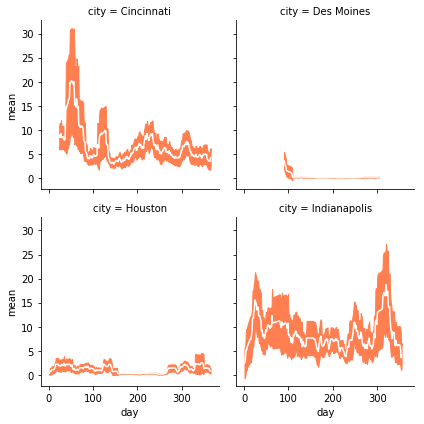

In [98]:
# Setup a grid of plots with columns divided by location
g = sns.FacetGrid(eastern_SO2, col = 'city', col_wrap = 2)

# Map interval plots to each cities data with corol colored ribbons
g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'mean', color = 'white')

plt.show()

In [99]:
df_str = ',city,day,mean,std_err,lower,upper\n0,Denver,20,2.579999999999999,0.4107219253947858,1.774985026226219,3.3850149737737794\n1,Denver,21,2.6124999999999994,0.405661111643697,1.8174042211783532,3.4075957788216455\n2,Denver,22,2.6774999999999993,0.4175445335530092,1.8591127142361015,3.495887285763897\n3,Denver,23,2.652499999999999,0.4193816132116428,1.8305120381051792,3.474487961894819\n4,Denver,24,2.752499999999999,0.41696035483004856,1.9352577045331039,3.5697422954668943\n5,Denver,25,2.842499999999999,0.3959525697605712,2.0664329632692793,3.6185670367307186\n6,Denver,26,2.717499999999999,0.3778603412638061,1.976893731122939,3.4581062688770587\n7,Denver,27,2.434999999999999,0.3278738324416879,1.792367288414291,3.077632711585707\n8,Denver,29,2.334999999999999,0.31040497740854606,1.7266062442792487,2.9433937557207495\n9,Denver,30,2.127499999999999,0.24102580256063877,1.6550894269811471,2.599910573018851\n10,Denver,31,2.0949999999999993,0.23958036230041896,1.6254224898911782,2.5645775101088204\n11,Denver,32,2.0949999999999993,0.23958036230041896,1.6254224898911782,2.5645775101088204\n12,Denver,33,2.3874999999999993,0.354486865059906,1.6927057444825835,3.0822942555174153\n13,Denver,34,2.6374999999999993,0.40354483951600717,1.8465521145486252,3.4284478854513734\n14,Denver,35,2.727499999999999,0.3831526295094423,1.9765208461614923,3.478479153838506\n15,Denver,36,2.684999999999999,0.3912815482488281,1.918088165432296,3.451911834567702\n16,Denver,37,2.752499999999999,0.3804023363492921,2.0069114207553866,3.4980885792446115\n17,Denver,38,3.0849999999999995,0.5240121658893045,2.0579361548569626,4.1120638451430365\n18,Denver,39,3.0774999999999997,0.5236587032600528,2.0511289416102962,4.103871058389704\n19,Denver,40,3.0349999999999993,0.5310378988358552,1.9941657182817232,4.075834281718276\n20,Denver,41,3.1024999999999996,0.5294864847189208,2.0647064899509147,4.1402935100490845\n21,Denver,42,3.0949999999999998,0.5305645578061166,2.0550934667000114,4.134906533299988\n22,Denver,43,3.0449999999999995,0.5247368388058913,2.0165157959404523,4.073484204059547\n23,Denver,44,3.3199999999999994,0.5594238107195653,2.2235293309896518,4.416470669010347\n24,Denver,45,3.3599999999999994,0.5614223009464444,2.2596122901449682,4.460387709855031\n25,Denver,46,3.3599999999999994,0.5614223009464444,2.2596122901449682,4.460387709855031\n26,Denver,47,3.4274999999999993,0.5610088568819569,2.327922640511364,4.527077359488635\n27,Denver,48,3.4599999999999995,0.5548378141403125,2.3725178842849868,4.547482115715012\n28,Denver,49,3.3849999999999993,0.5660289303560375,2.275583296502166,4.494416703497833\n29,Denver,50,3.4249999999999994,0.5624666656789539,2.3225653352692497,4.527434664730749\n30,Denver,51,3.3649999999999993,0.5730085077902421,2.2419033247311244,4.488096675268874\n31,Denver,52,3.3324999999999987,0.5787192216437951,2.1982103255781604,4.466789674421837\n32,Denver,53,3.0474999999999985,0.5415772682637261,1.9860085542030954,4.108991445796901\n33,Denver,54,2.7724999999999986,0.5198133679504597,1.7536657988170976,3.7913342011828997\n34,Denver,55,2.8074999999999988,0.5176542644468409,1.7928976416841906,3.822102358315807\n35,Denver,56,2.874999999999999,0.5086686052824569,1.8780095336463836,3.8719904663536147\n36,Denver,57,2.942499999999999,0.5081126228504859,1.9465992592130468,3.9384007407869515\n37,Denver,58,2.699999999999999,0.3731789115156428,1.9685693334293388,3.431430666570659\n38,Denver,59,2.657499999999999,0.3709156743789617,1.9305052782172338,3.384494721782764\n39,Denver,60,2.774999999999999,0.3589829383132296,2.071393440906069,3.478606559093929\n40,Denver,61,2.6824999999999988,0.3609583597868319,1.9750216148178081,3.3899783851821894\n41,Denver,62,2.7899999999999987,0.35854915980936275,2.087243646773648,3.4927563532263495\n42,Denver,63,2.732499999999999,0.35481112933503084,2.0370701865033385,3.4279298134966596\n43,Denver,64,2.449999999999999,0.26958301133417145,1.9216172977850228,2.978382702214975\n44,Denver,65,2.567499999999999,0.32791529012841103,1.9247860313483134,3.2102139686516846\n45,Denver,66,2.527499999999999,0.334840913718739,1.8712118091112706,3.1837881908887273\n46,Denver,67,2.559999999999999,0.3433766153948169,1.886981833826158,3.2330181661738404\n47,Denver,68,2.517499999999999,0.3514127736722158,1.8287309636024562,3.206269036397542\n48,Denver,69,2.642499999999999,0.3454937589884946,1.9653322323825497,3.3196677676174486\n49,Denver,70,2.627499999999999,0.34546119536063674,1.9503960570931511,3.304603942906847\n50,Denver,71,2.744999999999999,0.333145989019829,2.0920338615211342,3.397966138478864\n51,Denver,72,2.777499999999999,0.3260650816938238,2.1384124398801045,3.4165875601198934\n52,Denver,73,2.7374999999999994,0.3342879559601273,2.0822956063181497,3.392704393681849\n53,Denver,74,2.727499999999999,0.3370177109589347,2.066945286520487,3.3880547134795114\n54,Denver,75,2.634999999999999,0.35187178062470426,1.9453313099755785,3.3246686900244193\n55,Denver,76,2.609999999999999,0.354429118442602,1.9153189278524991,3.304681072147499\n56,Denver,77,2.4749999999999988,0.36182696140558673,1.7658191556450489,3.1841808443549486\n57,Denver,78,2.249999999999999,0.3397793401606401,1.5840324932851444,2.915967506714854\n58,Denver,79,2.274999999999999,0.34211657369966747,1.604451515548651,2.945548484451347\n59,Denver,80,2.157499999999999,0.34623465669975906,1.478880072868471,2.8361199271315267\n60,Denver,81,2.074999999999999,0.3612910876287983,1.3668694682475542,2.7831305317524437\n61,Denver,82,1.892499999999999,0.3652785751998055,1.1765539926083801,2.608446007391618\n62,Denver,83,1.7599999999999991,0.3742592684223064,1.0264518338922786,2.4935481661077197\n63,Denver,84,1.7599999999999991,0.3742592684223064,1.0264518338922786,2.4935481661077197\n64,Denver,85,1.517499999999999,0.2781248595505263,0.9723752752809675,2.0626247247190306\n65,Denver,86,1.549999999999999,0.2769025099200078,1.0072710805567837,2.092728919443214\n66,Denver,87,1.349999999999999,0.22951034835057002,0.9001597172328817,1.7998402827671163\n67,Denver,88,1.374999999999999,0.22780199735735415,0.9285080851795848,1.821491914820413\n68,Denver,89,1.2824999999999989,0.20091276091876295,0.8887109885992235,1.6762890114007742\n69,Denver,90,1.1899999999999988,0.19295724915120446,0.811803791663638,1.5681962083363596\n70,Denver,91,1.5574999999999988,0.4874073629932154,0.6021815685332966,2.512818431466701\n71,Denver,92,1.749999999999999,0.5239751902523629,0.7230086271053675,2.7769913728946305\n72,Denver,93,1.749999999999999,0.5239751902523629,0.7230086271053675,2.7769913728946305\n73,Denver,94,1.742499999999999,0.5247055722021637,0.7140770784837582,2.77092292151624\n74,Denver,95,1.8099999999999992,0.521794978894968,0.787281841365862,2.8327181586341363\n75,Denver,96,1.817499999999999,0.5217311927611766,0.7949068621880928,2.8400931378119054\n76,Denver,97,1.8849999999999991,0.5192915847575426,0.8671884938752157,2.902811506124783\n77,Denver,98,1.8949999999999991,0.5183374865857185,0.8790585262919908,2.9109414737080073\n78,Denver,99,1.7874999999999992,0.5159078769509146,0.7763205611762067,2.7986794388237914\n79,Denver,100,1.8374999999999992,0.5134183844585233,0.8311999664612937,2.843800033538705\n80,Denver,101,1.9199999999999993,0.5048811741390244,0.9304328986875113,2.9095671013124873\n81,Denver,102,2.0349999999999993,0.49536728797933355,1.0640801155605055,3.0059198844394928\n82,Denver,103,2.0349999999999993,0.49536728797933355,1.0640801155605055,3.0059198844394928\n83,Denver,104,1.984999999999999,0.4996886530630848,1.005610239996353,2.964389760003645\n84,Denver,105,1.9449999999999992,0.5019449671029683,0.9611878644781813,2.928812135521817\n85,Denver,106,1.9949999999999992,0.5028406805341031,1.0094322661531572,2.9805677338468413\n86,Denver,107,2.119999999999999,0.5008792269599528,1.1382767151584918,3.1017232848415066\n87,Denver,108,2.1374999999999993,0.49973586773414624,1.1580176992410727,3.116982300758926\n88,Denver,109,2.1049999999999995,0.5023183751367254,1.120455984732018,3.089544015267981\n89,Denver,110,2.287499999999999,0.5073568147763465,1.2930806430383601,3.2819193569616383\n90,Denver,111,1.9374999999999993,0.29385104645040827,1.361551948957199,2.5134480510427997\n91,Denver,112,1.752499999999999,0.23012157113143478,1.3014617205823868,2.2035382794176113\n92,Denver,113,1.802499999999999,0.22708685012567326,1.3574097737536794,2.2475902262463188\n93,Denver,114,1.8199999999999992,0.22325433926354038,1.38242149504346,2.2575785049565384\n94,Denver,115,1.7699999999999991,0.22653366195777616,1.3259940225627578,2.2140059774372403\n95,Denver,116,2.1449999999999996,0.43131919734693003,1.2996143732000167,2.9903856267999824\n96,Denver,117,2.1199999999999997,0.43199247678634406,1.2732947454987653,2.966705254501234\n97,Denver,118,2.1199999999999997,0.43199247678634406,1.2732947454987653,2.966705254501234\n98,Denver,119,2.1099999999999994,0.43339646975950324,1.260542919271373,2.959457080728626\n99,Denver,120,2.0524999999999993,0.4390397903379601,1.1919820109375976,2.913017989062401\n100,Denver,121,2.0199999999999996,0.44166446540331955,1.154337647809493,2.885662352190506\n101,Denver,122,1.9874999999999996,0.44177023156840256,1.1216303461259307,2.8533696538740685\n102,Denver,123,2.0774999999999997,0.43007957112608824,1.2345440405928667,2.920455959407133\n103,Denver,124,2.1349999999999993,0.4241476747549136,1.3036705574803686,2.96632944251963\n104,Denver,125,2.2174999999999994,0.4207177646593973,1.3928931812675807,3.0421068187324183\n105,Denver,126,2.374999999999999,0.45539131524437304,1.482433022121028,3.26756697787897\n106,Denver,127,2.2999999999999994,0.4548763568267755,1.4084423406195192,3.1915576593804795\n107,Denver,128,2.332499999999999,0.45365563757105454,1.4433349503607322,3.221665049639266\n108,Denver,129,2.372499999999999,0.4494368003401591,1.4916038713332873,3.253396128666711\n109,Denver,130,2.247499999999999,0.43902555449540753,1.3870099131890004,3.107990086810998\n110,Denver,131,2.122499999999999,0.43809923248049637,1.2638255043382263,2.9811744956617723\n111,Denver,132,2.0324999999999993,0.45003159611298404,1.1504380716185505,2.914561928381448\n112,Denver,133,1.9324999999999992,0.4608182260935432,1.0292962768566545,2.835703723143344\n113,Denver,134,1.9649999999999992,0.45861339928091943,1.066117737409397,2.863882262590601\n114,Denver,135,2.079999999999999,0.46020919156401047,1.1779899845345387,2.98201001546546\n115,Denver,136,1.704999999999999,0.27319635795522607,1.169535138407756,2.2404648615922422\n116,Denver,137,2.047499999999999,0.4291776293098232,1.2063118465527456,2.8886881534472524\n117,Denver,138,2.122499999999999,0.4262404691016562,1.2870686805607532,2.957931319439245\n118,Denver,139,2.2574999999999994,0.4256065524636574,1.423311157171231,3.091688842828768\n119,Denver,140,2.2749999999999995,0.42263311512469054,1.446639094355606,3.1033609056443927\n120,Denver,141,2.2749999999999995,0.42263311512469054,1.446639094355606,3.1033609056443927\n121,Denver,142,2.2824999999999993,0.4221414899059319,1.455102679784373,3.1098973202156257\n122,Denver,143,2.2749999999999995,0.42263311512469054,1.446639094355606,3.1033609056443927\n123,Denver,144,2.2349999999999994,0.4266599934373974,1.3987464128627005,3.0712535871372983\n124,Denver,145,2.2599999999999993,0.42856738093326696,1.4200079333707962,3.0999920666292025\n125,Denver,146,2.0524999999999993,0.3887395496987668,1.2905704825904163,2.8144295174095824\n126,Denver,147,2.1024999999999996,0.38920552090123284,1.3396571790335834,2.865342820966416\n127,Denver,148,2.0374999999999996,0.3926970046995521,1.2678138707888775,2.8071861292111215\n128,Denver,149,2.0374999999999996,0.3926970046995521,1.2678138707888775,2.8071861292111215\n129,Denver,150,2.1374999999999997,0.40166645055319217,1.3502337569157432,2.9247662430842563\n130,Denver,151,2.2124999999999995,0.39767881198273564,1.4330495285138376,2.9919504714861613\n131,Denver,152,2.3449999999999998,0.3814593687406301,1.5973396372683648,3.0926603627316345\n132,Denver,153,2.3774999999999995,0.3726840988021893,1.6470391663477084,3.1079608336522906\n133,Denver,154,2.4699999999999998,0.37455640429713655,1.735869447577612,3.2041305524223875\n134,Denver,155,2.3949999999999996,0.3733781595112387,1.6631788073579719,3.1268211926420273\n135,Denver,156,2.4299999999999997,0.3721458047593712,1.7005942226716322,3.1594057773283675\n136,Denver,157,2.0449999999999995,0.21356790489209748,1.6264069064114883,2.4635930935885106\n137,Denver,158,1.9849999999999994,0.21517725251522288,1.5632525850701626,2.4067474149298365\n138,Denver,159,1.8424999999999994,0.20976996329312733,1.4313508719454697,2.253649128054529\n139,Denver,160,1.8324999999999991,0.21199277699959496,1.4169941570807931,2.248005842919205\n140,Denver,161,1.8224999999999991,0.2141691796220922,1.4027284079406983,2.2422715920593\n141,Denver,162,1.772499999999999,0.21989983515228015,1.34149632310153,2.2035036768984684\n142,Denver,163,1.797499999999999,0.22055257309766305,1.3652169567285795,2.2297830432714187\n143,Denver,164,1.8724999999999992,0.21910257301090735,1.4430589568986207,2.301941043101378\n144,Denver,165,1.8399999999999992,0.2117958923114421,1.4248800510695727,2.255119948930426\n145,Denver,166,1.8324999999999991,0.2122579503811341,1.4164744172529762,2.248525582747022\n146,Denver,167,1.7899999999999991,0.20807450588671356,1.3821739684620407,2.1978260315379576\n147,Denver,168,1.829999999999999,0.2040955658509023,1.4299726909322303,2.2300273090677676\n148,Denver,169,1.8224999999999991,0.20428151531648672,1.4221082299796852,2.222891770020313\n149,Denver,170,1.6649999999999991,0.1848005681809447,1.3027908863653475,2.0272091136346506\n150,Denver,171,1.814999999999999,0.2608663450888213,1.3037019636259095,2.3262980363740886\n151,Denver,172,2.0974999999999993,0.40921380414155145,1.2954409438825585,2.89955905611744\n152,Denver,173,2.1399999999999992,0.40375735287422326,1.3486355883665215,2.931364411633477\n153,Denver,174,2.154999999999999,0.40653874354112923,1.3581840626593857,2.951815937340612\n154,Denver,175,2.179999999999999,0.4061773011875479,1.383892489672405,2.9761075103275925\n155,Denver,176,2.094999999999999,0.41124658053289637,1.288956702155522,2.901043297844476\n156,Denver,177,2.169999999999999,0.4059002340477275,1.374435541266453,2.965564458733545\n157,Denver,178,2.254999999999999,0.40524529608621,1.4607192196710272,3.0492807803289708\n158,Denver,179,2.262499999999999,0.40382352271753563,1.471005895473629,3.0539941045263688\n159,Denver,180,2.304999999999999,0.3982131966673129,1.5245021345320655,3.085497865467932\n160,Denver,181,2.3474999999999993,0.3922925407141971,1.578606620200173,3.116393379799826\n161,Denver,182,2.3474999999999993,0.3922925407141971,1.578606620200173,3.116393379799826\n162,Denver,183,2.2399999999999993,0.4086502171784569,1.439045574330224,3.0409544256697747\n163,Denver,184,2.304999999999999,0.4155703911493214,1.490482033347329,3.1195179666526687\n164,Denver,185,2.294999999999999,0.41545005716692346,1.480717887952829,3.109282112047169\n165,Denver,186,2.259999999999999,0.4201725835891723,1.4364617361652212,3.0835382638347766\n166,Denver,187,2.202499999999999,0.42700226872933594,1.3655755532905003,3.0394244467094973\n167,Denver,188,2.194999999999999,0.4274181208137998,1.3572604832049513,3.0327395167950466\n168,Denver,189,2.187499999999999,0.427958453006831,1.3487014321066104,3.026298567893388\n169,Denver,190,2.229999999999999,0.42229136860703176,1.4023089175302168,3.0576910824697814\n170,Denver,191,2.087499999999999,0.388617340709341,1.3258100122096907,2.8491899877903073\n171,Denver,192,2.072499999999999,0.3767206358828781,1.3341275536695578,2.81087244633044\n172,Denver,193,2.1549999999999985,0.37902671409809624,1.4121076403677297,2.897892359632267\n173,Denver,194,1.9649999999999987,0.3830159918332392,1.21428865600685,2.7157113439931475\n174,Denver,195,1.924999999999999,0.3832508969330665,1.1738282420111885,2.6761717579888096\n175,Denver,196,2.217499999999999,0.4418749115982939,1.351425173267343,3.083574826732655\n176,Denver,197,2.242499999999999,0.44277921981502244,1.374652729162555,3.1103472708374427\n177,Denver,198,2.174999999999999,0.44189223799474003,1.3088912135303086,3.0411087864696893\n178,Denver,199,2.249999999999999,0.4362338822237447,1.3949815908414593,3.105018409158539\n179,Denver,200,2.574999999999999,0.5207146531450791,1.5543992798356439,3.595600720164354\n180,Denver,201,2.617499999999999,0.5185831056831681,1.6010771128609893,3.6339228871390086\n181,Denver,202,2.7024999999999992,0.5102386083980709,1.7024323275397804,3.7025676724602183\n182,Denver,203,3.0349999999999993,0.5248940369255494,2.0062076876259223,4.063792312374076\n183,Denver,204,3.1849999999999996,0.5553050963209323,2.0966020112109724,4.273397988789027\n184,Denver,205,3.2275,0.5534604208974657,2.142717575040967,4.312282424959033\n185,Denver,206,3.2375,0.5513491974239193,2.1568555730491177,4.318144426950882\n186,Denver,207,3.3125,0.538445389524323,2.257147036532327,4.367852963467673\n187,Denver,208,3.2699999999999996,0.5465391111347843,2.1987833421758225,4.341216657824177\n188,Denver,209,3.3099999999999996,0.5414286656615072,2.2487998153034456,4.371200184696553\n189,Denver,210,3.3425,0.5369040300649642,2.2901681010726698,4.39483189892733\n190,Denver,211,3.2099999999999995,0.560464093408311,2.11149037691971,4.308509623080289\n191,Denver,212,2.849999999999999,0.5145872132107442,1.8414090621069406,3.858590937893058\n192,Denver,213,2.7424999999999993,0.5220665067785905,1.719249646713962,3.7657503532860366\n193,Denver,214,2.7824999999999993,0.512936094947509,1.7771452539028816,3.787854746097117\n194,Denver,215,3.2074999999999987,0.6165962516104034,1.9989713468436079,4.416028653156389\n195,Denver,216,3.5249999999999986,0.7650204245639458,2.0255599678546647,5.024440032145332\n196,Denver,217,3.5599999999999987,0.764122045225761,2.0623207913575072,5.05767920864249\n197,Denver,218,3.6099999999999985,0.7594126019496911,2.121551300178604,5.098448699821393\n198,Denver,219,3.5774999999999992,0.7628685584686264,2.0822776254014914,5.0727223745985075\n199,Denver,220,3.294999999999999,0.7270565658874143,1.869969130860667,4.720030869139331\n200,Denver,221,3.259999999999999,0.7297653732536231,1.8296598684228975,4.6903401315771\n201,Denver,222,3.317499999999999,0.7289227925507612,1.888811326600507,4.746188673399491\n202,Denver,223,3.059999999999999,0.713097118210416,1.6623296483075838,4.457670351692414\n203,Denver,224,2.8449999999999993,0.6870307489479638,1.4984197320619903,4.191580267938008\n204,Denver,225,2.7374999999999994,0.6926116787204789,1.3799811097078607,4.095018890292138\n205,Denver,226,3.352499999999999,0.8556684156260532,1.6753899053729349,5.029610094627063\n206,Denver,227,3.377499999999999,0.8542575358169221,1.7031552297988317,5.051844770201166\n207,Denver,228,3.4199999999999995,0.8488330224490563,1.7562872759998491,5.08371272400015\n208,Denver,229,3.3949999999999996,0.8508297420753461,1.7273737055323213,5.062626294467678\n209,Denver,230,3.4524999999999992,0.8484653425449975,1.789507928611804,5.115492071388195\n210,Denver,231,3.617499999999999,0.8299342970982703,1.9908287776873892,5.244171222312609\n211,Denver,232,3.742499999999999,0.8175670844034757,2.1400685145691867,5.344931485430811\n212,Denver,233,3.9249999999999994,0.8062296509059934,2.3447898842242525,5.505210115775746\n213,Denver,234,3.9675,0.7990249917868651,2.401411016097744,5.533588983902256\n214,Denver,235,3.6324999999999994,0.7368622242319116,2.1882500405054524,5.076749959494546\n215,Denver,236,3.0974999999999993,0.5601057377852863,1.9996927539408382,4.19530724605916\n216,Denver,237,3.0474999999999994,0.5604292439728676,1.949058681813179,4.14594131818682\n217,Denver,238,2.9649999999999994,0.5690573345454744,1.8496476242908697,4.080352375709129\n218,Denver,239,3.0899999999999994,0.5676552651037423,1.9773956803966646,4.202604319603334\n219,Denver,240,3.0649999999999995,0.5694745385001861,1.9488299045396347,4.181170095460365\n220,Denver,241,3.0999999999999996,0.5666017119635274,1.989460644551486,4.210539355448513\n221,Denver,242,3.0324999999999998,0.5671449880762415,1.9208958233705664,4.144104176629433\n222,Denver,243,3.2475,0.5767308189268197,2.1171075949034335,4.377892405096567\n223,Denver,244,3.2125,0.5799986530156773,2.0757026400892724,4.349297359910727\n224,Denver,245,3.2875,0.570217885987453,2.1698729434645925,4.405127056535408\n225,Denver,246,2.8050000000000006,0.2514184758525117,2.3122197873290777,3.2977802126709235\n226,Denver,247,2.8050000000000006,0.2514184758525117,2.3122197873290777,3.2977802126709235\n227,Denver,248,2.7725000000000004,0.2607075708528619,2.261513161128391,3.28348683887161\n228,Denver,249,2.732500000000001,0.2708845464399917,2.201566288977617,3.2634337110223846\n229,Denver,250,2.750000000000001,0.27324439609990175,2.2144409836441934,3.2855590163558084\n230,Denver,251,2.7425000000000006,0.27258656881805454,2.2082303251166135,3.2767696748833877\n231,Denver,252,2.7775000000000007,0.2782416890043618,2.2321462895514514,3.32285371044855\n232,Denver,253,2.6350000000000007,0.26462473429367855,2.1163355207843906,3.1536644792156108\n233,Denver,254,2.602500000000001,0.27245355108715325,2.0684910398691807,3.136508960130821\n234,Denver,255,2.470000000000001,0.28577526135059345,1.909880487752838,3.0301195122471642\n235,Denver,256,2.530000000000001,0.28994396010263773,1.9617098381988312,3.098290161801171\n236,Denver,257,2.495000000000001,0.2921236895563247,1.9224375684696047,3.0675624315303973\n237,Denver,258,2.570000000000001,0.28189980489528543,2.017476382405242,3.1225236175947604\n238,Denver,259,2.445000000000001,0.2730590595457327,1.909804243290365,2.9801957567096373\n239,Denver,260,2.5100000000000007,0.27510452558982007,1.9707951298439532,3.049204870156048\n240,Denver,261,2.5100000000000007,0.27510452558982007,1.9707951298439532,3.049204870156048\n241,Denver,262,2.520000000000001,0.2748954346656197,1.9812049480553862,3.0587950519446157\n242,Denver,263,2.412500000000001,0.22646398720326372,1.9686305850816042,2.856369414918398\n243,Denver,264,2.447500000000001,0.22428985153145023,2.0078918909983585,2.8871081090016437\n244,Denver,265,2.4800000000000013,0.2268920448142684,2.035291592164035,2.9247084078359675\n245,Denver,266,2.430000000000001,0.21910043359153808,2.0005631501605863,2.859436849839416\n246,Denver,267,2.437500000000001,0.21959835495740856,2.00708722428348,2.8679127757165217\n247,Denver,268,2.477500000000001,0.209746126305112,2.0663975924419815,2.8886024075580203\n248,Denver,269,2.577500000000001,0.19677001168877334,2.191830777090005,2.963169222909997\n249,Denver,270,2.8100000000000014,0.33912755712268505,2.1453099880395388,3.474690011960464\n250,Denver,271,2.802500000000001,0.3388302487972406,2.1383927123574096,3.4666072876425926\n251,Denver,272,2.6925000000000012,0.3363457112852786,2.0332624058808553,3.351737594119147\n252,Denver,273,2.7025000000000015,0.33515807837496625,2.0455901663850677,3.359409833614935\n253,Denver,274,2.7925000000000013,0.3235791054749982,2.158284953269005,3.4267150467309975\n254,Denver,275,2.800000000000001,0.3211697370550345,2.1705073153721335,3.429492684627869\n255,Denver,276,2.675000000000001,0.33052042296959505,2.027179970979595,3.3228200290204075\n256,Denver,277,2.675000000000001,0.33052042296959505,2.027179970979595,3.3228200290204075\n257,Denver,278,2.600000000000001,0.34044089061098404,1.9327358544024724,3.2672641455975295\n258,Denver,279,2.600000000000001,0.34044089061098404,1.9327358544024724,3.2672641455975295\n259,Denver,280,2.475000000000001,0.34927603696789733,1.790418967542922,3.15958103245708\n260,Denver,281,2.4000000000000012,0.3565809865935087,1.7011012662767242,3.0988987337232783\n261,Denver,282,2.325000000000001,0.36296521871936993,1.613588171310036,3.036411828689966\n262,Denver,283,2.142500000000001,0.37309976882866064,1.411224453095826,2.873775546904176\n263,Denver,284,2.057500000000001,0.37819100663553595,1.3162456269943505,2.7987543730056514\n264,Denver,285,1.975000000000001,0.37480828432680097,1.2403757627194711,2.709624237280531\n265,Denver,286,1.8925000000000012,0.37600324134241186,1.155533646968874,2.6294663530311286\n266,Denver,287,1.7850000000000013,0.3776258068511738,1.0448534185717007,2.525146581428302\n267,Denver,288,1.9100000000000013,0.3970295958741615,1.1318219920866448,2.6881780079133577\n268,Denver,289,1.8000000000000012,0.39640572649748645,1.0230447760649277,2.576955223935075\n269,Denver,290,1.567500000000001,0.23951187340088173,1.0980567281342728,2.036943271865729\n270,Denver,291,1.557500000000001,0.23670326888321586,1.093561592988898,2.021438407011104\n271,Denver,292,1.517500000000001,0.2378622237767065,1.0512900413976562,1.9837099586023457\n272,Denver,293,1.467500000000001,0.23778338356579917,1.0014445682110344,1.9335554317889674\n273,Denver,294,1.4175000000000009,0.2285901080536951,0.9694633882147585,1.8655366117852432\n274,Denver,295,1.4275000000000009,0.22744436132821577,0.981709051796698,1.8732909482033038\n275,Denver,296,1.4600000000000009,0.22659435120938032,1.0158750716296154,1.9041249283703863\n276,Denver,297,1.4950000000000008,0.2317299074353589,1.0408093814266972,1.9491906185733043\n277,Denver,298,1.5275000000000007,0.23042013258393887,1.0758765401354806,1.9791234598645209\n278,Denver,299,1.527500000000001,0.23042013258393887,1.0758765401354808,1.979123459864521\n279,Denver,300,1.520000000000001,0.23171642151561028,1.0658358138294048,1.974164186170597\n280,Denver,301,1.560000000000001,0.2305048806424714,1.108210433940757,2.011789566059245\n281,Denver,302,1.560000000000001,0.23050488064247143,1.108210433940757,2.011789566059245\n282,Denver,303,1.6100000000000008,0.218420466074038,1.1818958864948863,2.0381041135051152\n283,Denver,304,1.977500000000001,0.3824178833422935,1.2279609486491057,2.7270390513508964\n284,Denver,305,2.227500000000001,0.44009196482099056,1.3649197489508595,3.0900802510491423\n285,Denver,306,2.2600000000000007,0.43668638632318274,1.4040946828065626,3.1159053171934388\n286,Denver,307,2.2775000000000007,0.433783860349829,1.4272836337143358,3.1277163662856657\n287,Denver,308,2.262500000000001,0.4305211231751585,1.4186785985766903,3.106321401423312\n288,Denver,309,2.297500000000001,0.4259030846331122,1.4627299541191012,3.132270045880901\n289,Denver,310,2.240000000000001,0.420425379823816,1.4159662555453219,3.0640337444546804\n290,Denver,311,2.2325000000000013,0.4199892111709538,1.409321146104932,3.0556788538950705\n291,Denver,312,2.2725000000000013,0.4159097708638257,1.457316849106903,3.0876831508930995\n292,Denver,313,2.3550000000000013,0.4110337577377313,1.5493738348340478,3.160626165165955\n293,Denver,314,2.5050000000000012,0.42661311512891853,1.6688382943473208,3.3411617056526817\n294,Denver,315,2.487500000000001,0.4300272520434025,1.6446465859949324,3.33035341400507\n295,Denver,316,2.470000000000001,0.4320648099533217,1.6231529724914906,3.3168470275085116\n296,Denver,317,2.477500000000001,0.43215267845982397,1.630480750218746,3.3245192497812557\n297,Denver,318,2.860000000000001,0.5423052645881284,1.7970816814072694,3.9229183185927328\n298,Denver,319,2.967500000000001,0.5404312514094647,1.9082547472374505,4.026745252762552\n299,Denver,320,3.375000000000001,0.5961386164307761,2.20656831179568,4.543431688204322\n300,Denver,321,3.335000000000001,0.6026618039995566,2.1537828641608696,4.516217135839132\n301,Denver,322,3.367500000000001,0.5971732893390327,2.197040352895497,4.537959647104505\n302,Denver,323,3.582500000000001,0.5912938672944276,2.4235640201029227,4.741435979897079\n303,Denver,324,3.5400000000000005,0.5761358346778996,2.410773764031317,4.669226235968684\n304,Denver,325,3.4650000000000007,0.5613165328047981,2.3648195957025964,4.565180404297405\n305,Denver,326,3.4825000000000004,0.5587404920891272,2.387368635505311,4.57763136449469\n306,Denver,327,3.5825000000000005,0.5448540515587638,2.5145860589448237,4.650413941055177\n307,Denver,328,3.4975,0.5478877051914927,2.4236400978246744,4.571359902175326\n308,Denver,329,3.5475000000000003,0.540895958110245,2.48734392210392,4.607656077896081\n309,Denver,330,3.5475000000000003,0.540895958110245,2.48734392210392,4.607656077896081\n310,Denver,331,3.505,0.5459842030681841,2.434870961986359,4.575129038013641\n311,Denver,332,3.5975,0.5389396417967415,2.5411783020783867,4.653821697921614\n312,Denver,333,3.5975,0.5389396417967415,2.5411783020783867,4.653821697921614\n313,Denver,334,3.4075,0.5494574028075334,2.3305634904972345,4.484436509502766\n314,Denver,335,3.5575,0.5309575665719437,2.5168231695189904,4.59817683048101\n315,Denver,336,3.900000000000001,0.562172126665846,2.7981426317349425,5.001857368265059\n316,Denver,337,3.9575000000000005,0.5585614894530413,2.8627194806720393,5.052280519327962\n317,Denver,338,3.9675000000000002,0.5634078784504172,2.863220558237183,5.071779441762818\n318,Denver,339,3.910000000000001,0.567038358490852,2.7986048173579308,5.021395182642071\n319,Denver,340,3.695000000000001,0.5102070658075994,2.6949941510171063,4.6950058489828965\n320,Denver,341,3.7600000000000007,0.496797242343393,2.7862774050069503,4.733722594993051\n321,Denver,342,4.0600000000000005,0.5186593294253946,3.043427714326227,5.076572285673774\n322,Denver,343,4.1850000000000005,0.5471300119715606,3.112625176535742,5.257374823464259\n323,Denver,344,4.052500000000001,0.5241716679676612,3.025123530783385,5.079876469216617\n324,Denver,345,4.235000000000001,0.5689365078811519,3.1198844445529437,5.350115555447059\n325,Denver,347,4.485000000000001,0.5720041520828324,3.3638718619176498,5.606128138082353\n326,Denver,348,4.467500000000002,0.574524531678152,3.341431917910824,5.59356808208918\n327,Denver,349,4.435000000000002,0.5814862423136079,3.2952869650653307,5.574713034934674\n328,Denver,350,4.500000000000002,0.5740753434872464,3.3748123267649985,5.625187673235005\n329,Denver,351,4.665000000000002,0.567825897612992,3.5520612406785377,5.777938759321466\n330,Denver,353,4.715000000000002,0.5572039572723798,3.6228802437461374,5.807119756253866\n331,Denver,354,5.040000000000002,0.6133575629272048,3.8378191766626806,6.242180823337323\n332,Denver,355,4.997500000000001,0.6229614253707849,3.776495606273263,6.2185043937267395\n333,Denver,356,5.047500000000001,0.6086611844860818,3.854524078407281,6.240475921592721\n334,Denver,357,4.940000000000001,0.6296586376760029,3.7058690701550354,6.174130929844967\n335,Denver,358,4.707500000000001,0.6108935566037671,3.510148629056618,5.904851370943385\n336,Denver,359,4.650000000000001,0.617697336889192,3.439313219697185,5.860686780302817\n337,Denver,360,4.175000000000002,0.6045814668016213,2.9900203250688238,5.359979674931179\n338,Denver,361,4.125000000000002,0.6127958469180417,2.9239201400406403,5.326079859959363\n339,Denver,362,4.065000000000001,0.6137497454174625,2.862050498981775,5.267949501018228\n340,Denver,363,4.040000000000001,0.6178146971382276,2.8290831936090752,5.250916806390927\n341,Denver,364,3.747500000000001,0.5978134637995368,2.5757856109529085,4.919214389047093\n342,Denver,365,3.532500000000001,0.5605050735720418,2.4339100557987994,4.631089944201203\n343,Long Beach,1,3.5725000000000007,0.5658232387415703,2.463486452066523,4.681513547933479\n344,Long Beach,2,3.375000000000001,0.5068838624379356,2.3815076296216473,4.3684923703783545\n345,Long Beach,3,3.2425000000000006,0.4749509843131183,2.3115960707462886,4.173403929253713\n346,Long Beach,4,3.1950000000000007,0.4801419061069342,2.25392186403041,4.1360781359695915\n347,Long Beach,5,3.3075,0.4745297013886485,2.377421785278249,4.237578214721751\n348,Long Beach,6,3.2625000000000006,0.4742214013517314,2.333026053350607,4.191973946649394\n349,Long Beach,7,3.1300000000000012,0.456007127137285,2.236226030810923,4.0237739691890795\n350,Long Beach,8,3.1275000000000013,0.45610408625663496,2.2335359909369967,4.021464009063006\n351,Long Beach,9,2.7025000000000015,0.28490075026226236,2.144094529485967,3.260905470514036\n352,Long Beach,10,2.7650000000000015,0.2814937832350831,2.2132721848592385,3.3167278151407644\n353,Long Beach,11,2.9725000000000015,0.3229062363906897,2.3396037766742497,3.6053962233257533\n354,Long Beach,12,3.0125000000000015,0.31606714081030307,2.3930084040118076,3.6319915959881954\n355,Long Beach,13,2.9800000000000013,0.31514679119419886,2.3623122892593713,3.5976877107406313\n356,Long Beach,14,3.0900000000000016,0.32738738521818456,2.4483207249723598,3.7316792750276435\n357,Long Beach,15,3.3100000000000014,0.29186041184100314,2.7379535927916354,3.8820464072083674\n358,Long Beach,16,3.5025000000000013,0.2973733974315792,2.919648141034106,4.085351858965897\n359,Long Beach,17,3.5475000000000017,0.29907095729943417,2.9613209236931106,4.133679076306892\n360,Long Beach,18,3.7575000000000016,0.30763767243301005,3.154530162031302,4.360469837968701\n361,Long Beach,19,3.992500000000002,0.3179676673814493,3.369283371932361,4.615716628067642\n362,Long Beach,20,4.092500000000002,0.32508220114303393,3.4553388857596556,4.729661114240349\n363,Long Beach,21,4.110000000000001,0.32915801676398526,3.46485028714259,4.7551497128574125\n364,Long Beach,22,3.9625000000000012,0.34685867078682064,3.2826570052578328,4.64234299474217\n365,Long Beach,23,3.8100000000000014,0.369452297326732,3.0858734972396067,4.534126502760396\n366,Long Beach,24,4.0150000000000015,0.3649160862444954,3.2997644709607905,4.730235529039213\n367,Long Beach,25,4.005000000000001,0.3652037102768809,3.289200727857314,4.7207992721426875\n368,Long Beach,26,4.132500000000001,0.3670537256315483,3.4130746977621667,4.851925302237836\n369,Long Beach,27,4.120000000000001,0.36892411143756915,3.3969087415823656,4.843091258417637\n370,Long Beach,28,4.167500000000001,0.3629613443605255,3.4560957650533712,4.878904234946631\n371,Long Beach,29,4.312500000000001,0.339427367046324,3.647222360589206,4.977777639410796\n372,Long Beach,30,4.210000000000001,0.3716618086379067,3.4815428550697036,4.938457144930298\n373,Long Beach,31,3.9525000000000006,0.38880385479056145,3.1904444446105003,4.714555555389501\n374,Long Beach,32,3.920000000000001,0.396916238015025,3.142044173490552,4.69795582650945\n375,Long Beach,33,3.8475000000000015,0.4126662543751306,3.0386741414247456,4.656325858575258\n376,Long Beach,34,3.6625000000000023,0.4292562608745503,2.8211577286858835,4.503842271314121\n377,Long Beach,35,3.530000000000002,0.4372270577171545,2.673034966874379,4.386965033125625\n378,Long Beach,36,3.3450000000000015,0.43270804244894734,2.496892236800065,4.193107763199938\n379,Long Beach,37,3.1850000000000014,0.44483283377017024,2.313127645810468,4.056872354189535\n380,Long Beach,38,2.9500000000000015,0.4291707119550447,2.108825404568114,3.791174595431889\n381,Long Beach,39,2.6875000000000013,0.39555143470855975,1.9122191879712243,3.4627808120287784\n382,Long Beach,40,2.4700000000000015,0.374472962975967,1.736032992567106,3.203967007432897\n383,Long Beach,41,2.2600000000000016,0.3349552208878076,1.6034877670598986,2.9165122329401045\n384,Long Beach,42,2.3675000000000015,0.3430611279349498,1.6951001892475,3.039899810752503\n385,Long Beach,43,2.5950000000000015,0.3775893933891682,1.854924788957232,3.335075211042771\n386,Long Beach,44,2.5225000000000017,0.3526059238016287,1.8313923893488095,3.213607610651194\n387,Long Beach,45,2.535000000000002,0.3548961115594252,1.8394036213435285,3.2305963786564753\n388,Long Beach,46,2.655000000000002,0.41786510981416,1.8359843847642485,3.4740156152357553\n389,Long Beach,47,2.5775000000000023,0.4223960670981679,1.7496037084875933,3.405396291512411\n390,Long Beach,48,2.4975000000000023,0.4189492063484545,1.6763595555570314,3.3186404444429733\n391,Long Beach,49,2.4125000000000023,0.4061230570898431,1.61649880810391,3.2085011918960946\n392,Long Beach,50,2.4550000000000023,0.4008101171377788,1.6694121704099558,3.2405878295900488\n393,Long Beach,51,2.5400000000000023,0.39388450083749166,1.7679863783585186,3.312013621641486\n394,Long Beach,52,2.6400000000000023,0.39464541046362106,1.866494995491305,3.4135050045087\n395,Long Beach,53,2.6450000000000022,0.39388926108742794,1.8729770482686434,3.417022951731361\n396,Long Beach,54,2.7300000000000026,0.38640005175983083,1.9726558985507343,3.487344101449271\n397,Long Beach,55,2.8800000000000026,0.39494303386691093,2.1059116536208573,3.654088346379148\n398,Long Beach,56,2.962500000000003,0.39183662092765137,2.1945002229818065,3.7304997770181996\n399,Long Beach,57,2.967500000000003,0.3906128998125894,2.2018987163673276,3.7331012836326782\n400,Long Beach,58,2.967500000000003,0.3906128998125894,2.2018987163673276,3.7331012836326782\n401,Long Beach,59,3.030000000000003,0.38151670998791126,2.282227248423697,3.777772751576309\n402,Long Beach,60,3.042500000000003,0.3786204398867023,2.3004039378220664,3.7845960621779398\n403,Long Beach,61,3.035000000000003,0.3801167583782646,2.2899711535786045,3.780028846421401\n404,Long Beach,62,2.917500000000003,0.38398038686891284,2.164898441736934,3.670101558263072\n405,Long Beach,63,2.827500000000003,0.3588083576228402,2.124235619059236,3.5307643809407696\n406,Long Beach,64,2.7975000000000025,0.3535971401185253,2.104449605367693,3.490550394632312\n407,Long Beach,65,2.7100000000000026,0.3495997711669731,2.0247844485127353,3.39521555148727\n408,Long Beach,66,2.4600000000000026,0.23042352310473857,2.008369894714715,2.9116301052852904\n409,Long Beach,67,2.5050000000000026,0.22365989805953146,2.066626599803321,2.943373400196684\n410,Long Beach,68,2.5775000000000023,0.22821248322561144,2.130203532877804,3.0247964671222007\n411,Long Beach,69,2.8375000000000026,0.3512633449422242,2.149023843913243,3.525976156086762\n412,Long Beach,70,2.8750000000000027,0.34787749280457914,2.1931601141030277,3.5568398858969776\n413,Long Beach,71,2.792500000000002,0.3590660628630893,2.088730516788347,3.496269483211657\n414,Long Beach,72,2.7025000000000023,0.35903473021422316,1.998791928780125,3.4062080712198797\n415,Long Beach,73,2.752500000000002,0.3539328149522166,2.0587916826936574,3.446208317306347\n416,Long Beach,74,2.775000000000002,0.35492076580555265,2.079355299021119,3.470644700978885\n417,Long Beach,75,2.8850000000000025,0.3989846488274956,2.102990088298111,3.6670099117018937\n418,Long Beach,76,2.815000000000002,0.39986091331861884,2.031272609895509,3.598727390104495\n419,Long Beach,77,2.905000000000002,0.3900624949927896,2.1404775098141346,3.6695224901858694\n420,Long Beach,78,3.100000000000002,0.39620070671315066,2.3234466148422266,3.876553385157777\n421,Long Beach,79,3.0275000000000016,0.407821575569513,2.2281697118837562,3.826830288116247\n422,Long Beach,80,3.075000000000002,0.4009130204919766,2.289210479835728,3.860789520164276\n423,Long Beach,81,3.082500000000002,0.39945705338621823,2.299564175363014,3.8654358246369895\n424,Long Beach,82,3.097500000000002,0.3968386794403993,2.3196961882968195,3.8753038117031844\n425,Long Beach,83,2.982500000000002,0.3988620532214114,2.2007303756860357,3.7642696243139686\n426,Long Beach,84,2.862500000000002,0.40442667753252876,2.0698237120362455,3.6551762879637586\n427,Long Beach,85,2.810000000000002,0.4118950108947667,2.002685778646259,3.6173142213537446\n428,Long Beach,86,2.7500000000000018,0.41573729685944705,1.9351548981554856,3.5648451018445177\n429,Long Beach,87,2.770000000000002,0.41499096375704375,1.9566177110361962,3.5833822889638074\n430,Long Beach,88,2.930000000000002,0.45718431731633136,2.0339187380599926,3.8260812619400113\n431,Long Beach,89,2.620000000000002,0.3762877888000087,1.882475933951985,3.357524066048019\n432,Long Beach,90,2.5725000000000016,0.3792504943965136,1.8291690309828348,3.3158309690171683\n433,Long Beach,91,2.580000000000002,0.37781278432578214,1.8394869427214688,3.320513057278535\n434,Long Beach,92,2.540000000000002,0.38364371492310406,1.7880583187507177,3.291941681249286\n435,Long Beach,93,2.5875000000000017,0.38618122365024427,1.8305848016455228,3.3444151983544805\n436,Long Beach,94,2.515000000000002,0.3859582231278406,1.7585218826694344,3.2714781173305694\n437,Long Beach,95,2.252500000000002,0.3130590000303457,1.6389043599405246,2.8660956400594797\n438,Long Beach,96,2.315000000000002,0.31694045182021174,1.693796714432387,2.9362032855676174\n439,Long Beach,97,2.512500000000002,0.3860841067694965,1.7557751507317887,3.269224849268215\n440,Long Beach,98,2.7650000000000023,0.5267720095069593,1.732526861366362,3.7974731386336424\n441,Long Beach,99,3.3200000000000025,0.6891516523959005,1.9692627613040377,4.670737238695967\n442,Long Beach,100,3.6025000000000027,0.7234247974046784,2.1845873970868332,5.020412602913172\n443,Long Beach,101,3.772500000000003,0.7188573832826648,2.36353952876598,5.1814604712340255\n444,Long Beach,102,3.847500000000003,0.7125173243507837,2.450966044272467,5.244033955727539\n445,Long Beach,103,3.8500000000000028,0.7121534244809891,2.454179288017264,5.245820711982741\n446,Long Beach,104,3.8750000000000027,0.7081710598435946,2.4869847227065573,5.263015277293448\n447,Long Beach,105,4.022500000000003,0.6942484695697931,2.6617729996432082,5.383227000356797\n448,Long Beach,106,4.0500000000000025,0.6900543456859032,2.6974934824556325,5.4025065175443725\n449,Long Beach,107,3.967500000000002,0.702987153154309,2.5896451798175564,5.345354820182448\n450,Long Beach,108,3.717500000000002,0.6957035557620789,2.3539210307063274,5.081078969293676\n451,Long Beach,120,3.7250000000000023,0.6947346615795126,2.363320063304158,5.086679936695846\n452,Long Beach,121,3.7600000000000016,0.6903314421348632,2.4069503734156696,5.113049626584333\n453,Long Beach,122,4.090000000000002,0.7039406935246747,2.7102762406916394,5.469723759308364\n454,Long Beach,123,4.222500000000002,0.6869722974763975,2.876034296946263,5.568965703053741\n455,Long Beach,124,4.325000000000001,0.6884720401003951,2.9755948014032265,5.674405198596776\n456,Long Beach,125,4.302500000000002,0.6928516706337656,2.944510725557821,5.660489274442183\n457,Long Beach,126,4.340000000000002,0.6867459501154702,2.99397793777368,5.686022062226323\n458,Long Beach,127,4.265000000000002,0.6962497755834468,2.900350439856447,5.629649560143558\n459,Long Beach,128,4.032500000000002,0.6899390824558354,2.680219398386565,5.384780601613439\n460,Long Beach,129,3.640000000000003,0.6150873921647233,2.4344287113571452,4.84557128864286\n461,Long Beach,130,3.160000000000003,0.4344335392209032,2.3085102631270327,4.011489736872973\n462,Long Beach,131,3.0325000000000024,0.37744660218367315,2.292704659720003,3.7722953402800017\n463,Long Beach,132,2.9800000000000026,0.36708990724344354,2.2605037818028535,3.699496218197152\n464,Long Beach,133,2.9250000000000025,0.36823056635754725,2.20326808993921,3.646731910060795\n465,Long Beach,134,2.9650000000000025,0.3641617085856227,2.251243051172182,3.678756948827823\n466,Long Beach,135,2.9775000000000027,0.3624478410750987,2.2671022314928093,3.687897768507196\n467,Long Beach,136,2.9425000000000026,0.35861321434102233,2.2396180998915987,3.6453819001084065\n468,Long Beach,137,2.9275000000000024,0.36045934236748534,2.220999688959731,3.634000311040274\n469,Long Beach,138,3.1025000000000023,0.3539681306276033,2.4087224639699,3.7962775360301046\n470,Long Beach,139,3.110000000000002,0.35260813944093805,2.4188880466957636,3.8011119533042406\n471,Long Beach,140,3.0825000000000022,0.3579154055080614,2.380985805204202,3.7840141947958026\n472,Long Beach,141,3.0600000000000023,0.3608774030055082,2.3526802901092063,3.7673197098907982\n473,Long Beach,142,2.755000000000002,0.27209603084205397,2.2216917795495763,3.288308220450428\n474,Long Beach,143,2.632500000000002,0.2769764204765452,2.0896262158659735,3.1753737841340306\n475,Long Beach,144,2.435000000000002,0.2390371310068793,1.9664872232265185,2.903512776773485\n476,Long Beach,145,2.447500000000002,0.23662932510574422,1.9837065227927433,2.9112934772072605\n477,Long Beach,146,2.430000000000002,0.23723406163533928,1.965021239194737,2.894978760805267\n478,Long Beach,147,2.4800000000000018,0.23559499145779814,2.0182338167427174,2.941766183257286\n479,Long Beach,148,2.5350000000000015,0.23840878758971945,2.0677187763241514,3.0022812236758516\n480,Long Beach,149,2.4900000000000015,0.2436595986206987,2.012427186703432,2.967572813296571\n481,Long Beach,150,2.4700000000000015,0.2441925469788134,1.9913826079215273,2.948617392078476\n482,Long Beach,151,2.3375000000000017,0.1918943394162527,1.9613870947441465,2.713612905255857\n483,Long Beach,152,2.245000000000002,0.17330969390083173,1.9053129999543716,2.584687000045632\n484,Long Beach,153,2.2725000000000017,0.17540934268162572,1.9286976883440152,2.6163023116559883\n485,Long Beach,154,2.3400000000000016,0.19315149494632444,1.9614230699052058,2.7185769300947977\n486,Long Beach,155,2.4100000000000015,0.20070500741137476,2.016618185473707,2.803381814526296\n487,Long Beach,156,2.2925000000000013,0.2043671634583208,1.8919403596216926,2.6930596403783102\n488,Long Beach,171,2.3400000000000016,0.20504877468543917,1.938104401616541,2.7418955983834623\n489,Long Beach,172,2.1750000000000016,0.17963504669189695,1.8229153084838836,2.5270846915161194\n490,Long Beach,173,2.127500000000002,0.18899322077788927,1.7570732872753392,2.497926712724665\n491,Long Beach,174,2.152500000000002,0.18606030608380714,1.78782180007574,2.517178199924264\n492,Long Beach,175,2.152500000000002,0.18606030608380714,1.78782180007574,2.517178199924264\n493,Long Beach,176,2.2375000000000016,0.19399983891745887,1.8572603157217822,2.617739684278221\n494,Long Beach,177,2.262500000000002,0.18910562524684452,1.8918529745161867,2.633147025483817\n495,Long Beach,178,2.245000000000002,0.19312884300383515,1.866467467712485,2.623532532287519\n496,Long Beach,179,2.1975000000000025,0.20559289263007124,1.7945379304450628,2.600462069554942\n497,Long Beach,180,2.1525000000000025,0.21126035477580737,1.7384297046394201,2.566570295360585\n498,Long Beach,181,2.0700000000000025,0.21390418415729973,1.650747799051695,2.48925220094831\n499,Long Beach,203,2.1500000000000026,0.24834451876375285,1.663244743223047,2.6367552567769583\n500,Long Beach,204,2.3675000000000024,0.3041026759171974,1.7714587552022953,2.9635412447977094\n501,Long Beach,205,2.5050000000000026,0.32779376138053634,1.8625242276941514,3.147475772305854\n502,Long Beach,206,2.407500000000003,0.33705109034091546,1.7468798629318085,3.068120137068197\n503,Long Beach,207,2.390000000000003,0.3382787312261886,1.726973686796673,3.0530263132033326\n504,Long Beach,208,2.362500000000003,0.3376735664810024,1.7006598096972383,3.024340190302768\n505,Long Beach,209,2.3850000000000025,0.34362224898862415,1.711500391982299,3.058499608017706\n506,Long Beach,210,2.3725000000000027,0.3418054088220372,1.7025613987088097,3.0424386012911957\n507,Long Beach,211,2.462500000000003,0.3355941559383893,1.80473545436076,3.120264545639246\n508,Long Beach,212,2.472500000000003,0.33631226189361574,1.813327966688516,3.1316720333114896\n509,Long Beach,213,2.5150000000000023,0.330777493188397,1.8666761133507443,3.1633238866492603\n510,Long Beach,214,2.6350000000000025,0.3229763923261265,2.0019662710407946,3.2680337289592103\n511,Long Beach,215,2.6425000000000023,0.32226299430744443,2.010864531157411,3.2741354688425934\n512,Long Beach,216,2.6800000000000024,0.32000781240463494,2.052784687686918,3.3072153123130867\n513,Long Beach,217,2.800000000000002,0.3531642677282061,2.107798035252718,3.492201964747286\n514,Long Beach,218,2.815000000000002,0.3512317610923021,2.12658574825909,3.503414251740914\n515,Long Beach,219,2.9200000000000017,0.34187717092546555,2.249920744986089,3.5900792550139142\n516,Long Beach,220,3.0025000000000017,0.3240847690034198,2.3672938527532987,3.6377061472467047\n517,Long Beach,221,3.0125000000000015,0.3214396327461815,2.3824783198174857,3.6425216801825173\n518,Long Beach,222,3.0900000000000016,0.30756300167607936,2.487176516714886,3.6928234832851174\n519,Long Beach,223,3.102500000000002,0.3114577619838683,2.49204278651162,3.7129572134883837\n520,Long Beach,224,2.997500000000002,0.2804120851532615,2.4478923130996093,3.5471076869003944\n521,Long Beach,225,2.870000000000002,0.2642300134352644,2.3521091736668835,3.38789082633312\n522,Long Beach,226,3.037500000000002,0.2502717273285179,2.5469674144361067,3.528032585563897\n523,Long Beach,227,3.2575000000000016,0.2833565554209043,2.702121151375029,3.8128788486249743\n524,Long Beach,228,3.5425000000000018,0.35880487385207016,2.8392424472499442,4.245757552750059\n525,Long Beach,229,3.4475000000000016,0.3594001078185704,2.7430757886756036,4.1519242113244\n526,Long Beach,230,3.4700000000000015,0.3594509702309899,2.7654760983472615,4.174523901652742\n527,Long Beach,231,3.455000000000002,0.3610384328572237,2.7473646715998434,4.16263532840016\n528,Long Beach,232,3.392500000000002,0.3695821119859564,2.6681190605075273,4.116880939492477\n529,Long Beach,233,3.467500000000002,0.36313349817938856,2.7557583435684005,4.1792416564316035\n530,Long Beach,234,3.450000000000002,0.3638165746636621,2.7369195136592244,4.16308048634078\n531,Long Beach,235,3.515000000000003,0.3572131716496467,2.8148621835666954,4.215137816433311\n532,Long Beach,236,3.5425000000000026,0.35488158236234235,2.8469320985698117,4.238067901430194\n533,Long Beach,237,3.3500000000000028,0.3430561178582886,2.6776100089977573,4.022389991002249\n534,Long Beach,238,3.5650000000000026,0.3655834378086622,2.8484564618950245,4.28154353810498\n535,Long Beach,239,3.702500000000003,0.3846666576400923,2.948553351025422,4.456446648974584\n536,Long Beach,240,3.9750000000000028,0.42621150852598993,3.1396254432890625,4.8103745567109435\n537,Long Beach,241,4.065000000000003,0.4076472126729189,3.2660114631610817,4.863988536838924\n538,Long Beach,242,4.100000000000003,0.40319040167146836,3.309746812723925,4.890253187276081\n539,Long Beach,243,3.9075000000000024,0.42137090253124976,3.081613031038753,4.733386968961252\n540,Long Beach,244,3.797500000000002,0.43678477251387776,2.941401845872802,4.653598154127202\n541,Long Beach,245,3.835000000000002,0.43207493563038335,2.988133126164451,4.6818668738355536\n542,Long Beach,246,3.805000000000002,0.43179711671107757,2.95867765124629,4.651322348753714\n543,Long Beach,247,3.6300000000000017,0.41773795613997056,2.8112336059656595,4.448766394034344\n544,Long Beach,248,3.395000000000002,0.35418745037056293,2.7007925972736984,4.089207402726305\n545,Long Beach,249,3.5050000000000017,0.3565091162929778,2.806242132065765,4.203757867934238\n546,Long Beach,250,3.530000000000002,0.3580223456713281,2.828276202484199,4.231723797515805\n547,Long Beach,251,3.610000000000002,0.35555590277760823,2.91311043055589,4.306889569444114\n548,Long Beach,252,3.735000000000002,0.3444397625129828,3.059898065474556,4.410101934525448\n549,Long Beach,253,3.802500000000003,0.34888169556455667,3.1186918766934717,4.486308123306534\n550,Long Beach,254,3.797500000000003,0.3494902537982998,3.1124991025553355,4.4825008974446705\n551,Long Beach,255,3.9450000000000025,0.37006587251461054,3.2196708898713657,4.670329110128639\n552,Long Beach,256,3.9575000000000022,0.36900669031875283,3.2342468869752468,4.680753113024758\n553,Long Beach,257,4.1125000000000025,0.35759395618494444,3.4116158458775114,4.8133841541224935\n554,Long Beach,258,3.990000000000003,0.3387034100802647,3.3261413162426843,4.6538586837573215\n555,Long Beach,259,3.897500000000003,0.3221698891889185,3.266047017189723,4.528952982810283\n556,Long Beach,260,3.670000000000003,0.2533377192602791,3.173458070249856,4.16654192975015\n557,Long Beach,261,3.6575000000000033,0.2547860622169117,3.1581193180548564,4.15688068194515\n558,Long Beach,262,3.6175000000000024,0.2597420595513942,3.1084055632792698,4.126594436720735\n559,Long Beach,263,3.650000000000003,0.2468552207266437,3.166163767375781,4.133836232624224\n560,Long Beach,264,3.642500000000003,0.2501318402363042,3.152241593136847,4.132758406863159\n561,Long Beach,265,3.642500000000003,0.25013184023630414,3.1522415931368473,4.132758406863159\n562,Long Beach,266,3.6375000000000037,0.2502217766302525,3.1470653178047088,4.127934682195299\n563,Long Beach,267,3.835000000000003,0.28313203633640616,3.280061208780647,4.389938791219359\n564,Long Beach,268,3.862500000000003,0.28155538975484024,3.310651436080516,4.41434856391949\n565,Long Beach,269,3.7825000000000024,0.2804522018098628,3.2328136844526716,4.332186315547333\n566,Long Beach,270,3.6550000000000025,0.29794924064343575,3.0710194883388686,4.238980511661136\n567,Long Beach,271,3.5075000000000025,0.3195949585021641,2.8810938813357607,4.133906118664244\n568,Long Beach,272,3.4150000000000027,0.3208406925562903,2.7861522425896736,4.043847757410331\n569,Long Beach,273,3.3325000000000022,0.31169446177306387,2.7215788549247972,3.9434211450752072\n570,Long Beach,274,3.277500000000002,0.32000927720927086,2.650281816669831,3.904718183330173\n571,Long Beach,275,3.095000000000002,0.279237801882195,2.5476939083109,3.642306091689104\n572,Long Beach,276,3.145000000000002,0.28657241667683225,2.5833180633134107,3.706681936686593\n573,Long Beach,277,3.1475000000000017,0.28741248668072855,2.5841715261057736,3.71082847389423\n574,Long Beach,278,3.010000000000002,0.3003664428660432,2.4212817719825575,3.5987182280174466\n575,Long Beach,279,2.975000000000002,0.2953282072542343,2.3961567137817026,3.553843286218301\n576,Long Beach,280,2.950000000000002,0.2951694428629088,2.3714678919887007,3.5285321080113032\n577,Long Beach,281,2.9225000000000017,0.2963839359681965,2.3415874855023366,3.5034125144976667\n578,Long Beach,282,2.8300000000000014,0.314571136628903,2.2134405722073516,3.4465594277926512\n579,Long Beach,283,2.8150000000000013,0.3169996056779882,2.1936807728711445,3.436319227128858\n580,Long Beach,284,2.840000000000001,0.31232194927670387,2.2278489794176615,3.452151020582341\n581,Long Beach,285,2.717500000000001,0.32956932123606403,2.0715441303773154,3.363455869622687\n582,Long Beach,286,2.6225000000000014,0.33129433665548824,1.9731631001552445,3.2718368998447582\n583,Long Beach,287,2.342500000000001,0.2699369139261987,1.8134236487046518,2.8715763512953503\n584,Long Beach,288,2.260000000000001,0.2594368902064623,1.751503695195335,2.768496304804667\n585,Long Beach,289,2.177500000000001,0.2585409783767362,1.6707596823815982,2.684240317618404\n586,Long Beach,290,2.1675000000000013,0.2597420595513942,1.6584055632792687,2.676594436720734\n587,Long Beach,291,2.1925000000000017,0.2562048740754165,1.6903384468121854,2.694661553187818\n588,Long Beach,292,2.160000000000001,0.2565297253731037,1.6572017382687179,2.662798261731284\n589,Long Beach,293,2.070000000000001,0.25237373080413894,1.5753474876238889,2.5646525123761137\n590,Long Beach,294,2.1875000000000013,0.2713594249330581,1.6556355271312073,2.7193644728687953\n591,Long Beach,301,2.2125000000000012,0.27479253537896553,1.6739066306572288,2.7510933693427737\n592,Long Beach,302,2.222500000000001,0.27900436824537356,1.6756514382390688,2.7693485617609332\n593,Long Beach,303,2.157500000000001,0.25130347689596333,1.664945185283913,2.650054814716089\n594,Long Beach,304,2.1850000000000014,0.24718667035258998,1.7005141261089252,2.6694858738910776\n595,Long Beach,305,2.070000000000001,0.24195557443464702,1.595767074108093,2.5442329258919094\n596,Long Beach,306,2.0125000000000015,0.24036105653786766,1.541392329185781,2.483607670814222\n597,Long Beach,307,2.0050000000000017,0.23986715073139964,1.5348603845664583,2.475139615433545\n598,Long Beach,308,2.165000000000002,0.2485482850473928,1.6778453613071118,2.652154638692892\n599,Long Beach,309,2.270000000000002,0.25853916531156357,1.7632632359893372,2.7767367640106664\n600,Long Beach,310,2.410000000000002,0.28334166654412124,1.8546503335735243,2.9653496664264796\n601,Long Beach,311,2.6450000000000022,0.3023015878224923,2.0524888878679173,3.237511112132087\n602,Long Beach,354,2.6050000000000018,0.3115866653115952,1.9942901359892753,3.2157098640107282\n603,Long Beach,355,2.615000000000002,0.30915408779442005,2.0090579879229384,3.2209420120770655\n604,Long Beach,356,2.755000000000002,0.3281558318847922,2.1118145695058095,3.3981854304941947\n605,Long Beach,357,2.790000000000002,0.32292801055343584,2.1570610993152677,3.422938900684736\n606,Long Beach,358,2.8625000000000016,0.3155327835582224,2.2440557442258857,3.4809442557741175\n607,Long Beach,359,2.8275000000000015,0.32371814515099395,2.1930124355040532,3.4619875644959497\n608,Long Beach,360,2.8575000000000017,0.3202591723901128,2.2297920221153804,3.485207977884623\n609,Long Beach,361,3.1350000000000016,0.36968060538794834,2.410426013439623,3.85957398656038\n610,Long Beach,362,3.1450000000000014,0.37117886523884946,2.4174894241318565,3.872510575868146\n611,Long Beach,363,3.045000000000001,0.3830453628488406,2.2942310888162734,3.7957689111837283\n612,Long Beach,364,2.8375000000000012,0.3928402187913045,2.0675331711690443,3.607466828830958\n613,Long Beach,365,2.762500000000001,0.39044645919767285,1.9972249399725623,3.52777506002744\n'
SO2_compare = pd.read_csv(StringIO(df_str), index_col=0)
SO2_compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 6 columns):
city       614 non-null object
day        614 non-null int64
mean       614 non-null float64
std_err    614 non-null float64
lower      614 non-null float64
upper      614 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 33.6+ KB


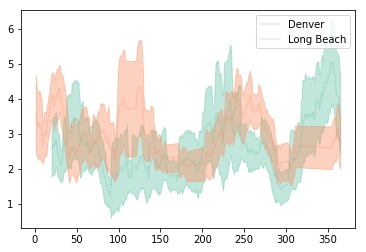

In [100]:
for city, color in [('Denver',"#66c2a5"), ('Long Beach', "#fc8d62")]:
    # Filter data to desired city
    city_data = SO2_compare[SO2_compare.city  ==  city]

    # Set city interval color to desired and lower opacity
    plt.fill_between(x = 'day', y1 = 'lower', y2 = 'upper', data = city_data,
                     color = color, alpha = 0.4)
    
    # Draw a faint mean line for reference and give a label for legend
    plt.plot('day','mean', data = city_data, label = city,
             color = color, alpha = 0.25)

plt.legend()
plt.show()

In [101]:
# Good data detective work comparing my summary to the DC summary
# Building this myself was satisfying
# although my condition number is very large...
# so they use different values ...grrrr...
import statsmodels.api as sm

pollution_fairbanks = pollution.query('city == "Fairbanks"')
target = 'SO2'
drop_cols = ['city', 'month', 'year', target]
X = sm.add_constant(pollution_fairbanks.drop(drop_cols, axis=1))
y = pollution_fairbanks[target]

model = sm.OLS(y, X)
pollution_model = model.fit()
pollution_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SO2   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     198.9
Date:                Mon, 30 Dec 2019   Prob (F-statistic):          4.22e-101
Time:                        12:29:42   Log-Likelihood:                -1430.2
No. Observations:                 494   AIC:                             2870.
Df Residuals:                     489   BIC:                             2891.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4119      1.004      4.396      0.000       2.440       6.384
day           -0.0036      0.002     -1.532      0.126      -0.008       0.001
CO             6.7889      0.499     13.613      0.000       5.809       7.769
NO2            0.1333      0.017      7.775      0.000       0.100       0.167
O3           -70.1354     23.440     -2.992      0.003    -116.191     -24.080
==============================================================================
Omnibus:                       47.039   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.786
Skew:                          -0.015   Prob(JB):                     5.24e-58
Kurtosis:                       6.580   Cond. No.                     2.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

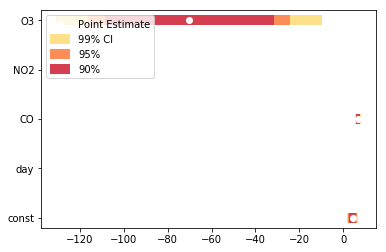

In [102]:
# Add interval percent widths
alphas = [     0.01,  0.05,   0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']

for alpha, color, width in zip(alphas, colors, widths):
    # Grab confidence interval
    conf_ints = pollution_model.conf_int(alpha)
    
    # Pass current interval color and legend label to plot
    plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
               colors = color, label = width, linewidth = 10) 

# Draw point estimates
plt.plot(pollution_model.params, pollution_model.params.index, 'wo', label = 'Point Estimate')

plt.legend()
plt.show() 

In [109]:
# try and create rolling data to match
cinci_13_no2 = (pollution.query('city == "Cincinnati" & year == 2013')[['day', 'NO2']]
                         .set_index('day')
                         .rolling(40)
                         .agg(['mean', std_err])
                         .dropna()
                         .reset_index())
cinci_13_no2.columns = ['day', 'mean', 'std_err']

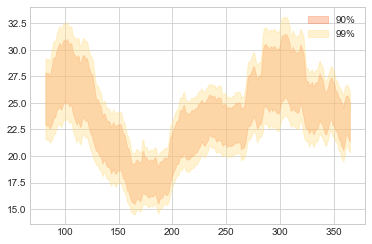

In [114]:
plt.style.use('seaborn-whitegrid')
int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    
    # Pass lower and upper confidence bounds and lower opacity
    plt.fill_between(
        x = cinci_13_no2.day, alpha = 0.4, color = color,
        y1 = cinci_13_no2['mean'] - Z*cinci_13_no2['std_err'],
        y2 = cinci_13_no2['mean'] + Z*cinci_13_no2['std_err'],
        label = percent)
    
plt.legend()
plt.show()

In [115]:
df_str = ',pollutant,est,std_err\n0,SO2,0.13818519,0.03465057\n1,NO2,0.32012064,0.04984866\n2,CO,0.0842821,0.0247576\n3,O3,0.56536813,0.02219086\n'
rocket_model = pd.read_csv(StringIO(df_str), index_col=0)
rocket_model

,pollutant,est,std_err
0,SO2,0.138185,0.034651
1,NO2,0.320121,0.049849
2,CO,0.084282,0.024758
3,O3,0.565368,0.022191


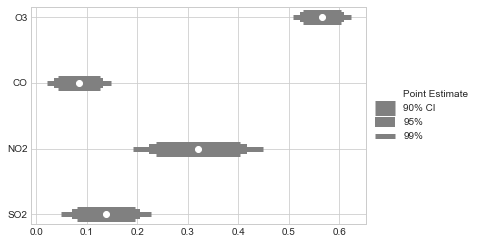

In [116]:
# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = size, 
               color = 'gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [118]:
def bootstrap(data, n_boots):
    return np.array([np.mean(np.random.choice(data,len(data))) for _ in range(n_boots)])

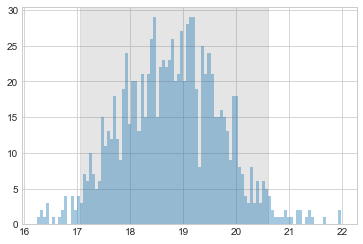

In [121]:
cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins = 100, kde = False)

plt.show()

In [139]:
# not identical - but try
long_beach = pollution.query('city == "Long Beach"')
long_beach_idx = np.random.choice(long_beach.index, 62)
no2_so2 = long_beach.loc[long_beach_idx, ['NO2', 'SO2']].sort_index()

df_list = []
for sample in range(70):
    idx = np.random.choice(no2_so2.index, len(no2_so2))
    df = no2_so2.loc[idx]
    df['sample'] = sample
    df_list.append(df)

no2_so2_boot = pd.concat(df_list)
no2_so2_boot.info()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4475 entries, 6973 to 7229
Data columns (total 3 columns):
NO2       4475 non-null float64
SO2       4475 non-null float64
sample    4475 non-null int64
dtypes: float64(2), int64(1)
memory usage: 139.8 KB


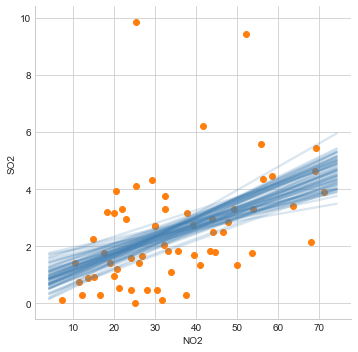

In [140]:
sns.lmplot('NO2', 'SO2', data = no2_so2_boot,
           # Tell seaborn to a regression line for each sample
           hue = 'sample',
           # Make lines blue and transparent
           line_kws = {'color': 'steelblue', 'alpha': 0.2},
           # Disable built-in confidence intervals
           ci = None, legend = False, scatter = False)

# Draw scatter of all points
plt.scatter('NO2', 'SO2', data = no2_so2)

plt.show()

In [141]:
pollution_may = pollution.query('month == 5')

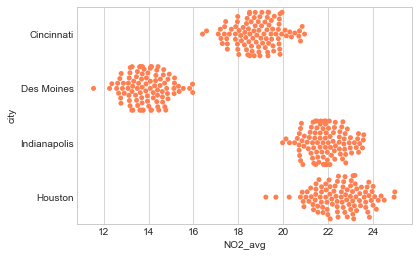

In [142]:
# Initialize a holder DataFrame for bootstrap results
city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color = 'coral')

plt.show()